<a href="https://colab.research.google.com/github/Rak16-nub04/CSE311-Project/blob/main/fatigue(bootstrap)_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#original vs synthetic (bootstrap) data analysis

 DATASET OVERVIEW 
Dataset Shape: (278, 6)

First few rows:
   Nozzle Diameter  Print Speed  Nozzle Temperature  Stress Level  \
0              0.2            5                 180           5.0   
1              0.2            5                 180           7.5   
2              0.2            5                 180          10.0   
3              0.2            5                 210           2.5   
4              0.2            5                 210           5.0   

   Fatigue Lifetime Data_Source  
0            942000    Original  
1            597800    Original  
2            148900    Original  
3           1500000    Original  
4           1500000    Original  

Data Source distribution:
Data_Source
Original               139
Bootstrap_Synthetic    139
Name: count, dtype: int64

 BASIC DATA EXPLORATION 
Basic Statistics:
       Nozzle Diameter  Print Speed  Nozzle Temperature  Stress Level  \
count       278.000000   278.000000          278.000000    278.000000   
mean        

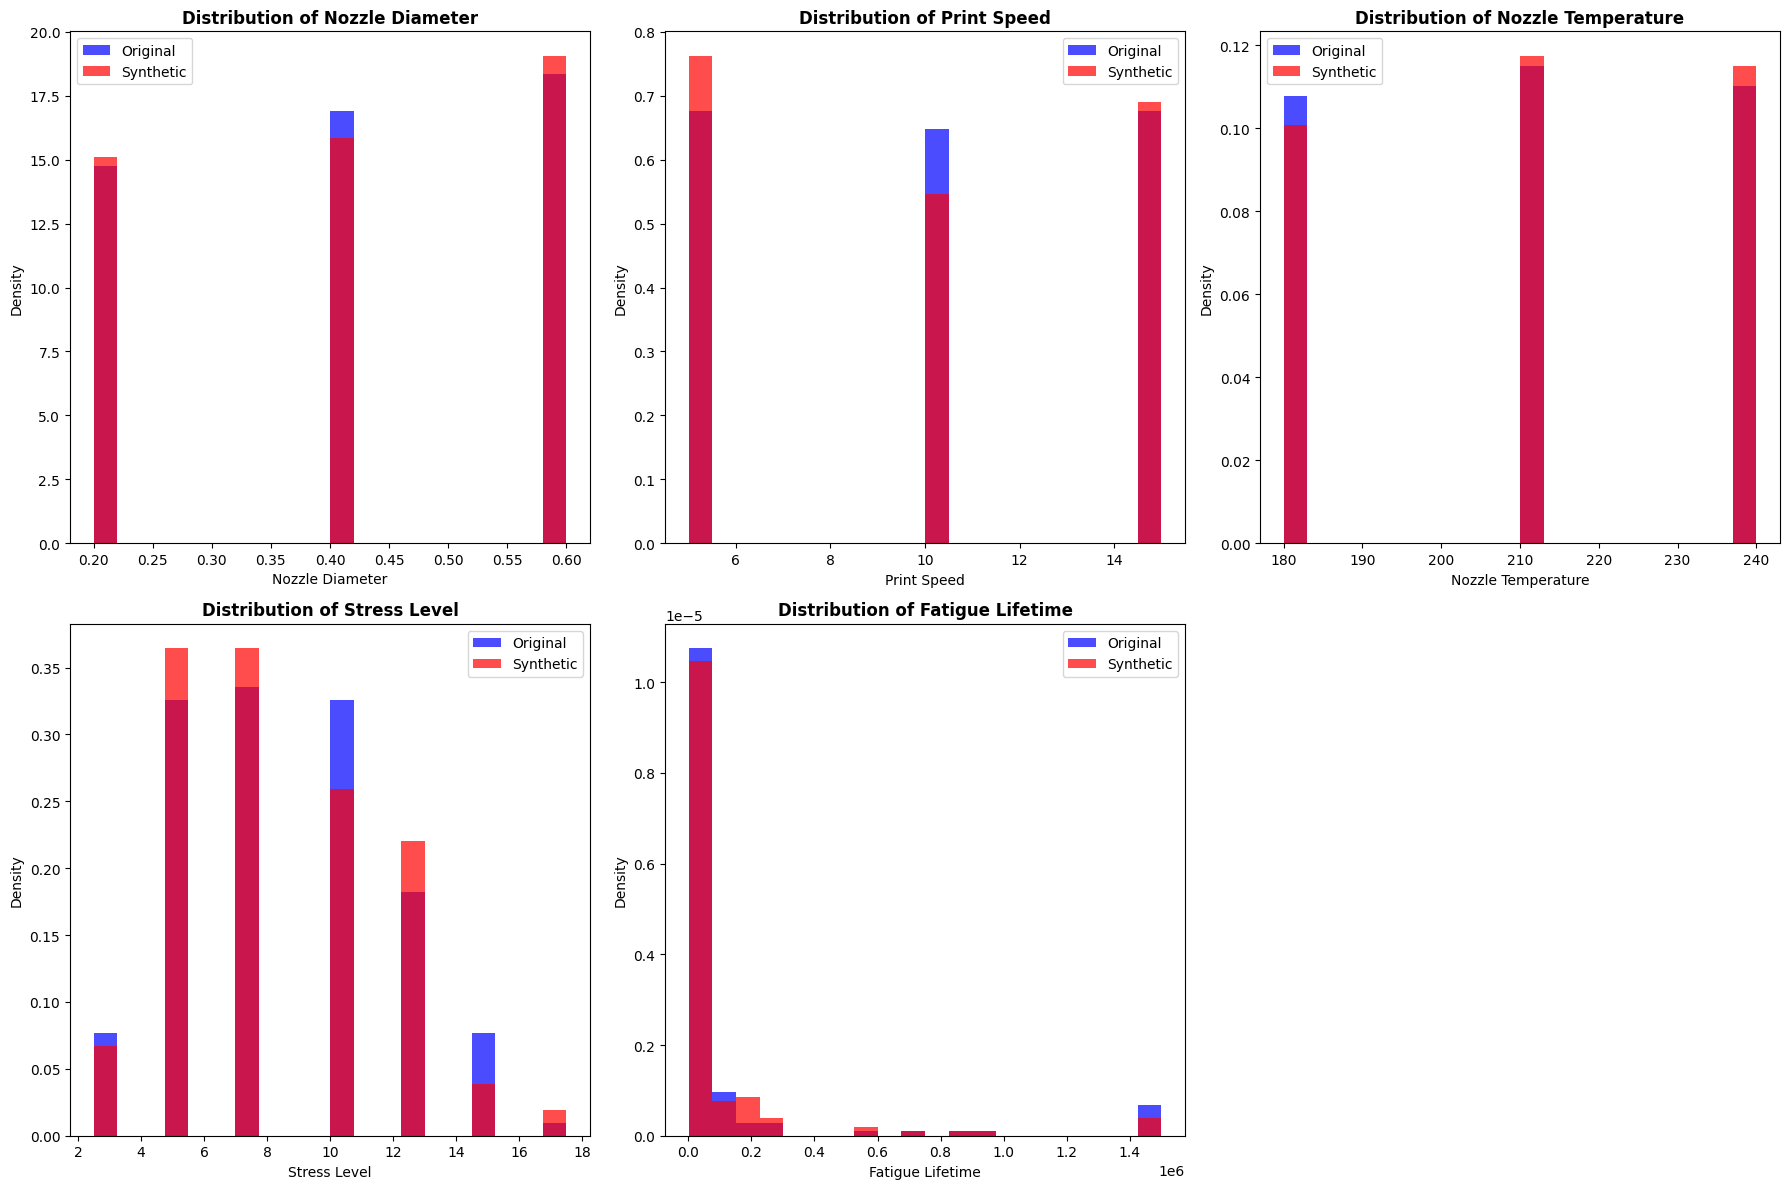


 STATISTICAL TESTS FOR DISTRIBUTION SIMILARITY 

Nozzle Diameter:
  KS Test - Statistic: 0.0144, p-value: 1.0000
  T-test - Statistic: -0.0732, p-value: 0.9417
  Mann-Whitney U - Statistic: 9606.5000, p-value: 0.9324
  Original Mean: 0.41 ± 0.16
  Synthetic Mean: 0.42 ± 0.17

Print Speed:
  KS Test - Statistic: 0.0432, p-value: 0.9995
  T-test - Statistic: 0.3569, p-value: 0.7214
  Mann-Whitney U - Statistic: 9890.5000, p-value: 0.7162
  Original Mean: 10.00 ± 4.13
  Synthetic Mean: 9.82 ± 4.27

Nozzle Temperature:
  KS Test - Statistic: 0.0216, p-value: 1.0000
  T-test - Statistic: -0.3706, p-value: 0.7112
  Mann-Whitney U - Statistic: 9427.0000, p-value: 0.7122
  Original Mean: 210.22 ± 24.36
  Synthetic Mean: 211.29 ± 24.19

Stress Level:
  KS Test - Statistic: 0.0432, p-value: 0.9995
  T-test - Statistic: 0.4064, p-value: 0.6848
  Mann-Whitney U - Statistic: 9959.5000, p-value: 0.6478
  Original Mean: 8.40 ± 3.34
  Synthetic Mean: 8.24 ± 3.30

Fatigue Lifetime:
  KS Test - Statist

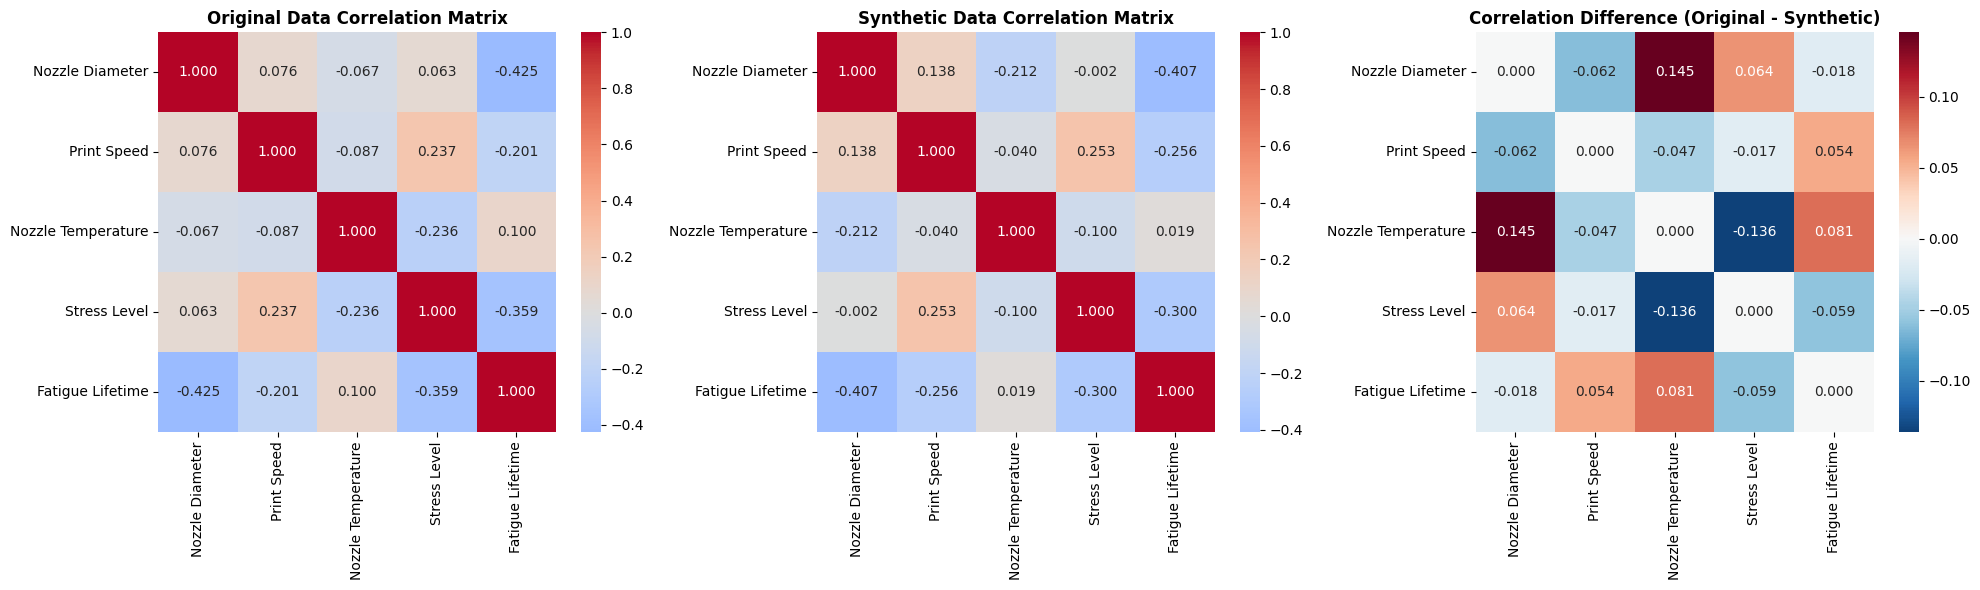

Correlation Matrix Difference (Original - Synthetic):
                    Nozzle Diameter  Print Speed  Nozzle Temperature  \
Nozzle Diameter              0.0000      -0.0619              0.1453   
Print Speed                 -0.0619       0.0000             -0.0467   
Nozzle Temperature           0.1453      -0.0467              0.0000   
Stress Level                 0.0644      -0.0166             -0.1359   
Fatigue Lifetime            -0.0180       0.0543              0.0807   

                    Stress Level  Fatigue Lifetime  
Nozzle Diameter           0.0644           -0.0180  
Print Speed              -0.0166            0.0543  
Nozzle Temperature       -0.1359            0.0807  
Stress Level              0.0000           -0.0587  
Fatigue Lifetime         -0.0587            0.0000  

 FATIGUE LIFETIME ANALYSIS 


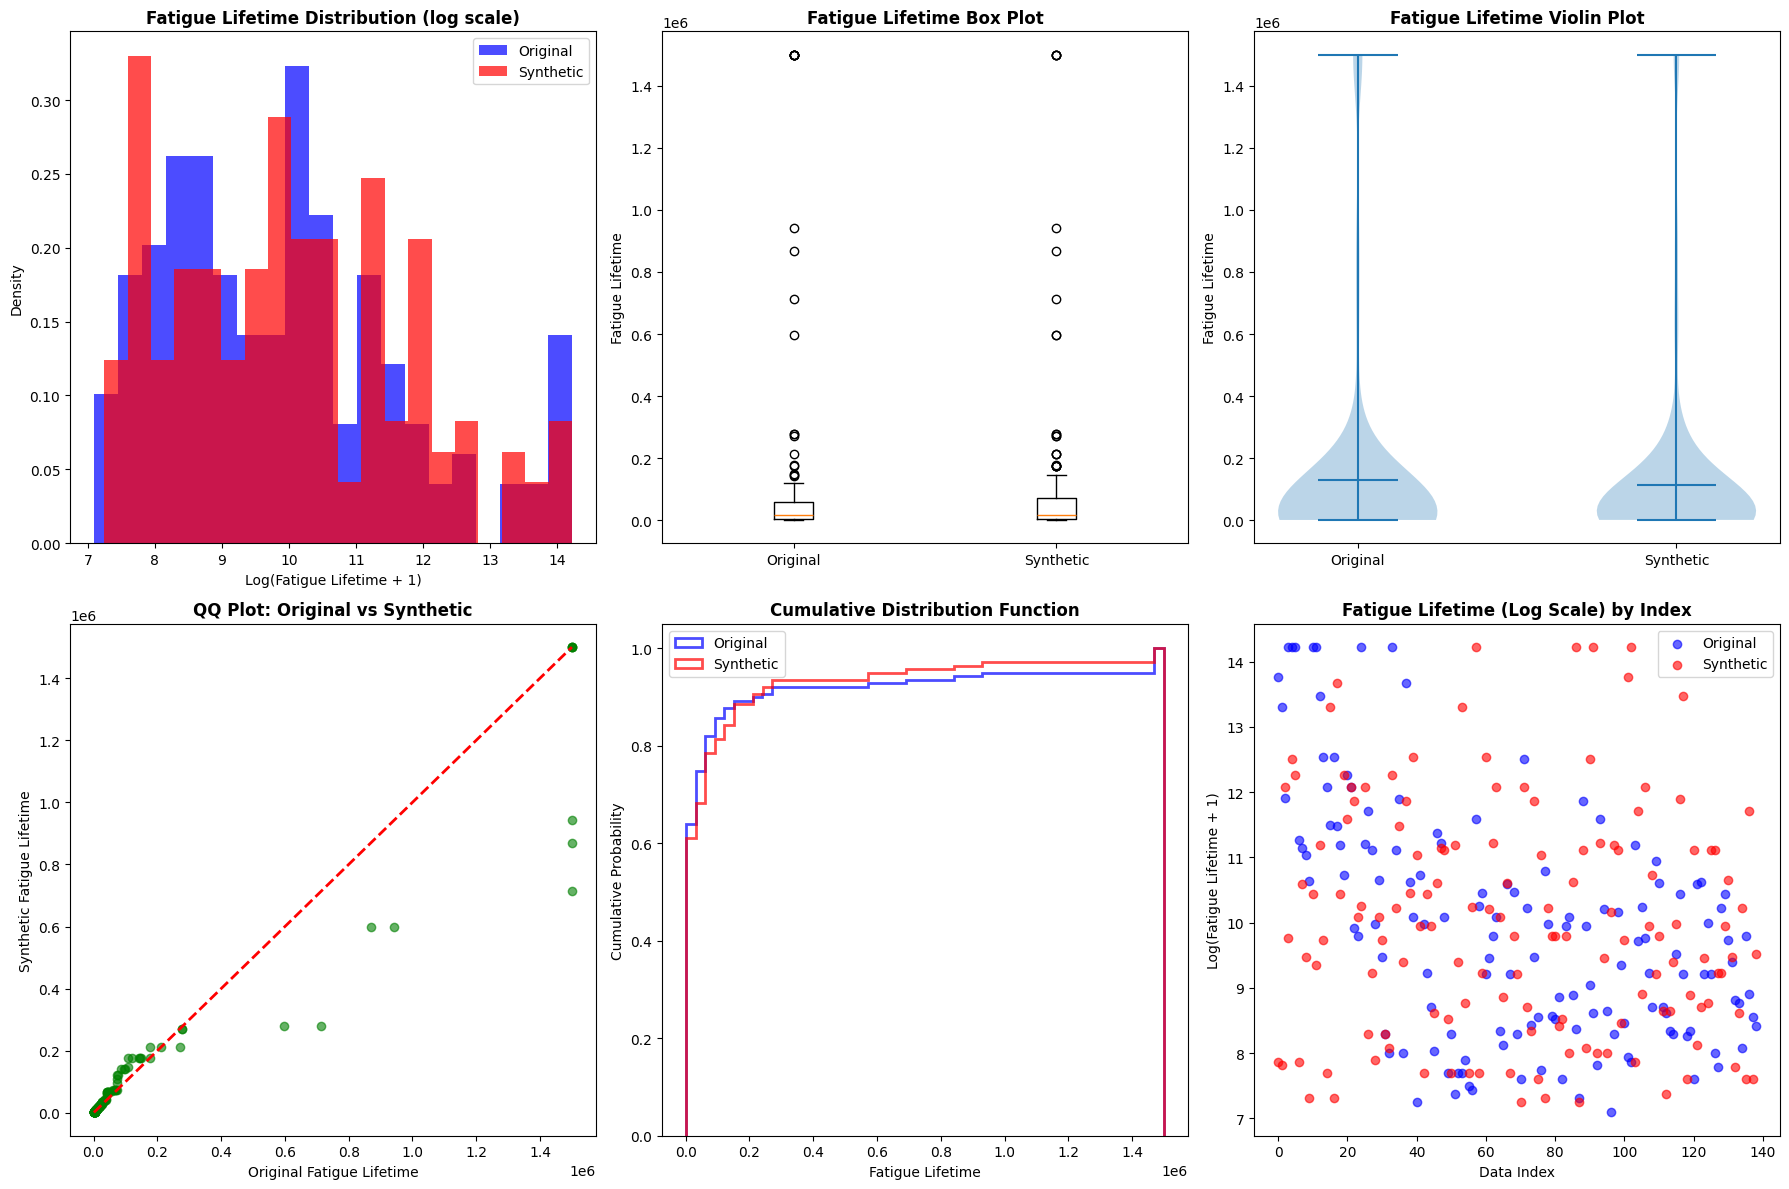


 MULTIVARIATE ANALYSIS 


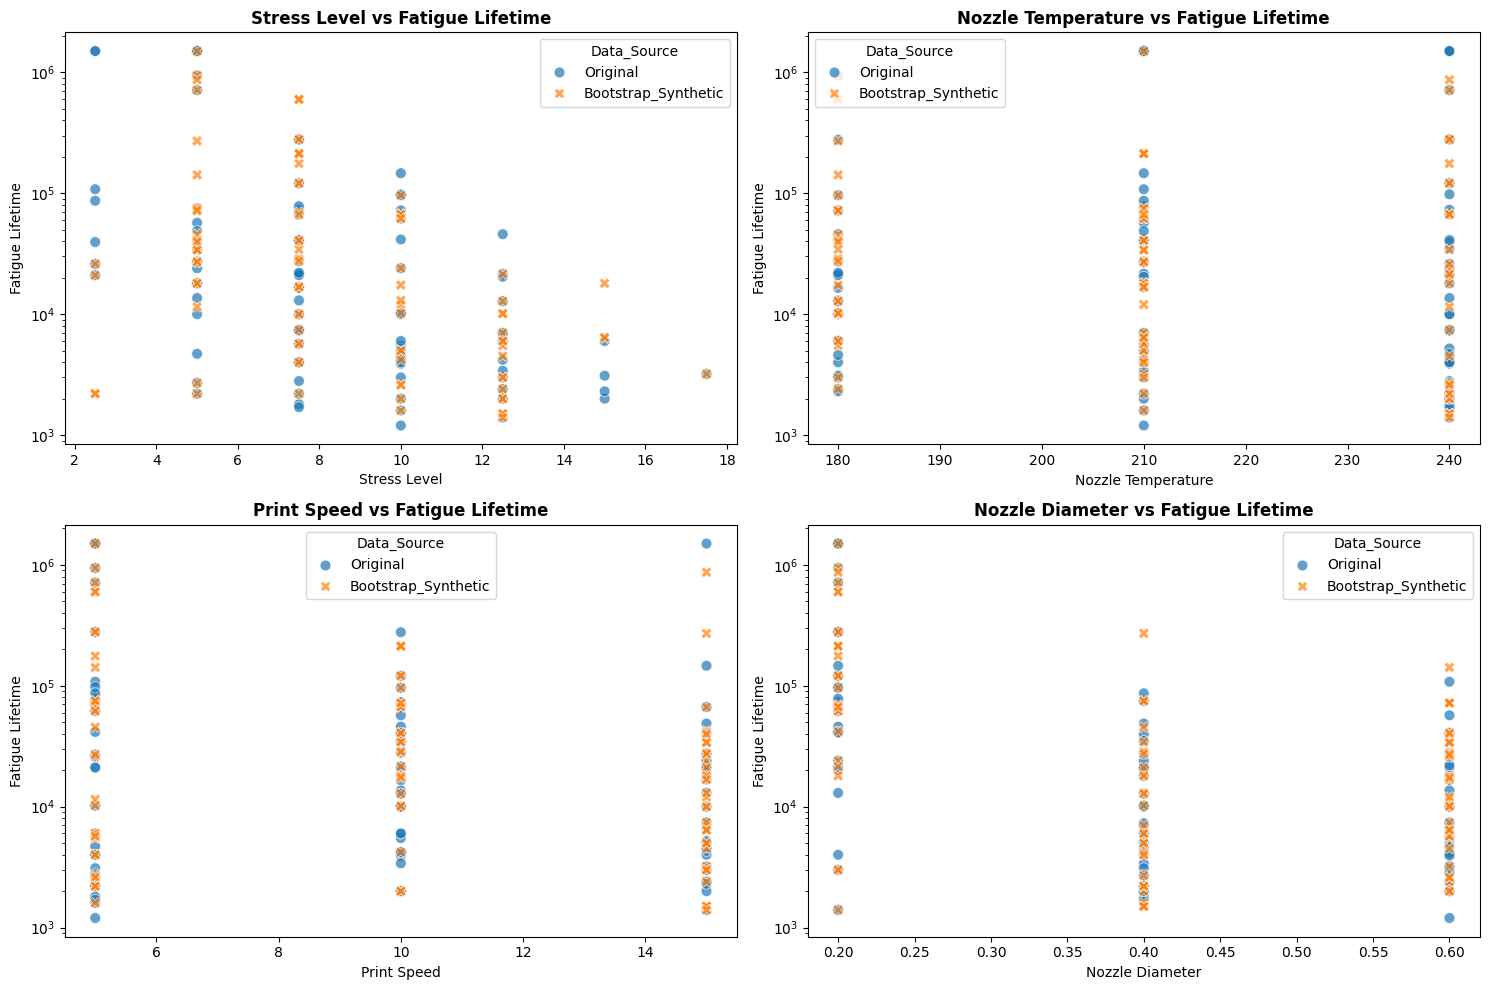

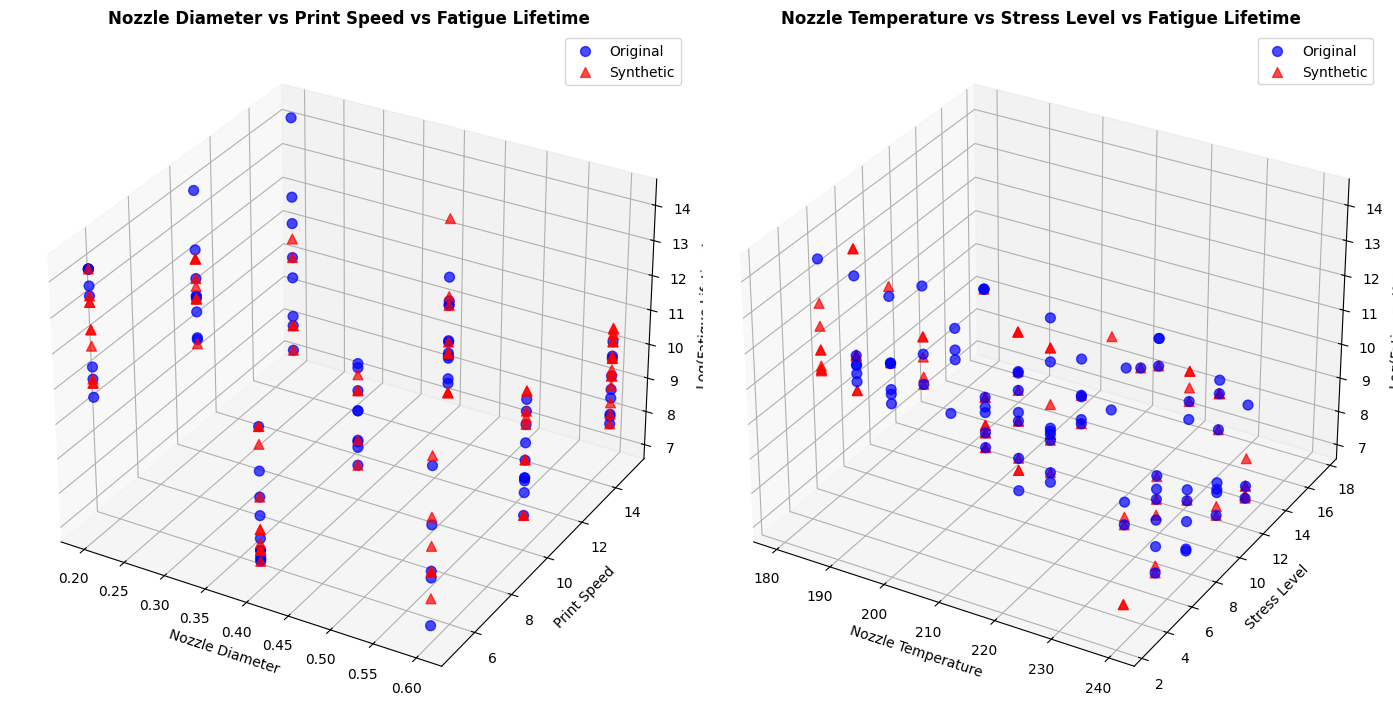


 SYNTHETIC DATA QUALITY METRICS 
Synthetic Data Quality Metrics:
                    Mean_Preservation_Rate  Std_Preservation_Rate  \
Nozzle Diameter                     0.9965                 0.9845   
Print Speed                         0.9820                 0.9644   
Nozzle Temperature                  0.9949                 0.9931   
Stress Level                        0.9807                 0.9896   
Fatigue Lifetime                    0.8654                 0.8159   

                    Median_Preservation_Rate  KS_Statistic  Effect_Size  \
Nozzle Diameter                          1.0        0.0144       0.0088   
Print Speed                              1.0        0.0432      -0.0436   
Nozzle Temperature                       1.0        0.0216       0.0443   
Stress Level                             1.0        0.0432      -0.0485   
Fatigue Lifetime                         1.0        0.0719      -0.0511   

                    Coverage_Rate  
Nozzle Diameter            1.000

In [ ]:
!pip install seaborn scipy

# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ks_2samp, ttest_ind
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('combined_bootstrap_fatigue.csv')

print(" DATASET OVERVIEW ")
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData Source distribution:")
print(df['Data_Source'].value_counts())


print("\n BASIC DATA EXPLORATION ")
print("Basic Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

original_data = df[df['Data_Source'] == 'Original']
synthetic_data = df[df['Data_Source'] == 'Bootstrap_Synthetic']

print(f"\nOriginal data points: {len(original_data)}")
print(f"Synthetic data points: {len(synthetic_data)}")

print("\n DISTRIBUTION COMPARISON ")
numerical_cols = ['Nozzle Diameter', 'Print Speed', 'Nozzle Temperature', 'Stress Level', 'Fatigue Lifetime']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    axes[i].hist(original_data[col], alpha=0.7, label='Original', bins=20, color='blue', density=True)
    axes[i].hist(synthetic_data[col], alpha=0.7, label='Synthetic', bins=20, color='red', density=True)
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].legend()
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

axes[-1].remove()
plt.tight_layout()
plt.show()

print("\n STATISTICAL TESTS FOR DISTRIBUTION SIMILARITY ")


statistical_results = []
for col in numerical_cols:
    ks_stat, ks_pvalue = ks_2samp(original_data[col], synthetic_data[col])
    t_stat, t_pvalue = ttest_ind(original_data[col], synthetic_data[col])
    u_stat, u_pvalue = stats.mannwhitneyu(original_data[col], synthetic_data[col])

    print(f"\n{col}:")
    print(f"  KS Test - Statistic: {ks_stat:.4f}, p-value: {ks_pvalue:.4f}")
    print(f"  T-test - Statistic: {t_stat:.4f}, p-value: {t_pvalue:.4f}")
    print(f"  Mann-Whitney U - Statistic: {u_stat:.4f}, p-value: {u_pvalue:.4f}")
    print(f"  Original Mean: {original_data[col].mean():.2f} ± {original_data[col].std():.2f}")
    print(f"  Synthetic Mean: {synthetic_data[col].mean():.2f} ± {synthetic_data[col].std():.2f}")

    statistical_results.append({
        'Variable': col,
        'KS_Statistic': ks_stat,
        'KS_pvalue': ks_pvalue,
        'T_Statistic': t_stat,
        'T_pvalue': t_pvalue,
        'U_Statistic': u_stat,
        'U_pvalue': u_pvalue
    })

print("\n RANGE COMPARISON: ORIGINAL vs SYNTHETIC ")


range_comparison = []
for col in numerical_cols:
    orig_min = original_data[col].min()
    orig_max = original_data[col].max()
    orig_range = orig_max - orig_min
    orig_iqr = original_data[col].quantile(0.75) - original_data[col].quantile(0.25)

    synth_min = synthetic_data[col].min()
    synth_max = synthetic_data[col].max()
    synth_range = synth_max - synth_min
    synth_iqr = synthetic_data[col].quantile(0.75) - synthetic_data[col].quantile(0.25)

    range_diff = synth_range - orig_range
    range_ratio = synth_range / orig_range if orig_range != 0 else np.nan
    iqr_ratio = synth_iqr / orig_iqr if orig_iqr != 0 else np.nan

    range_comparison.append({
        'Variable': col,
        'Original_Min': orig_min,
        'Original_Max': orig_max,
        'Original_Range': orig_range,
        'Synthetic_Min': synth_min,
        'Synthetic_Max': synth_max,
        'Synthetic_Range': synth_range,
        'Range_Difference': range_diff,
        'Range_Ratio': range_ratio,
        'IQR_Ratio': iqr_ratio
    })

range_df = pd.DataFrame(range_comparison)
print(range_df.round(4))

print("\n CORRELATION ANALYSIS")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

orig_corr = original_data[numerical_cols].corr()
sns.heatmap(orig_corr, annot=True, cmap='coolwarm', center=0, ax=ax1, fmt='.3f')
ax1.set_title('Original Data Correlation Matrix', fontweight='bold')

synth_corr = synthetic_data[numerical_cols].corr()
sns.heatmap(synth_corr, annot=True, cmap='coolwarm', center=0, ax=ax2, fmt='.3f')
ax2.set_title('Synthetic Data Correlation Matrix', fontweight='bold')

corr_diff = orig_corr - synth_corr
sns.heatmap(corr_diff, annot=True, cmap='RdBu_r', center=0, ax=ax3, fmt='.3f')
ax3.set_title('Correlation Difference (Original - Synthetic)', fontweight='bold')

plt.tight_layout()
plt.show()

print("Correlation Matrix Difference (Original - Synthetic):")
print(corr_diff.round(4))

print("\n FATIGUE LIFETIME ANALYSIS ")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes[0,0].hist(np.log1p(original_data['Fatigue Lifetime']), alpha=0.7, label='Original', bins=20, color='blue', density=True)
axes[0,0].hist(np.log1p(synthetic_data['Fatigue Lifetime']), alpha=0.7, label='Synthetic', bins=20, color='red', density=True)
axes[0,0].set_title('Fatigue Lifetime Distribution (log scale)', fontweight='bold')
axes[0,0].legend()
axes[0,0].set_xlabel('Log(Fatigue Lifetime + 1)')
axes[0,0].set_ylabel('Density')

box_data = [original_data['Fatigue Lifetime'], synthetic_data['Fatigue Lifetime']]
axes[0,1].boxplot(box_data, labels=['Original', 'Synthetic'])
axes[0,1].set_title('Fatigue Lifetime Box Plot', fontweight='bold')
axes[0,1].set_ylabel('Fatigue Lifetime')

violin_data = [original_data['Fatigue Lifetime'], synthetic_data['Fatigue Lifetime']]
axes[0,2].violinplot(violin_data, showmeans=True)
axes[0,2].set_xticks([1, 2])
axes[0,2].set_xticklabels(['Original', 'Synthetic'])
axes[0,2].set_title('Fatigue Lifetime Violin Plot', fontweight='bold')
axes[0,2].set_ylabel('Fatigue Lifetime')

sorted_orig = np.sort(original_data['Fatigue Lifetime'])
sorted_synth = np.sort(synthetic_data['Fatigue Lifetime'])
min_len = min(len(sorted_orig), len(sorted_synth))
axes[1,0].scatter(sorted_orig[:min_len], sorted_synth[:min_len], alpha=0.6, color='green')
axes[1,0].plot([sorted_orig.min(), sorted_orig.max()], [sorted_orig.min(), sorted_orig.max()], 'r--', linewidth=2)
axes[1,0].set_xlabel('Original Fatigue Lifetime')
axes[1,0].set_ylabel('Synthetic Fatigue Lifetime')
axes[1,0].set_title('QQ Plot: Original vs Synthetic', fontweight='bold')

axes[1,1].hist(original_data['Fatigue Lifetime'], cumulative=True, density=True,
               alpha=0.7, label='Original', bins=50, histtype='step', linewidth=2, color='blue')
axes[1,1].hist(synthetic_data['Fatigue Lifetime'], cumulative=True, density=True,
               alpha=0.7, label='Synthetic', bins=50, histtype='step', linewidth=2, color='red')
axes[1,1].set_title('Cumulative Distribution Function', fontweight='bold')
axes[1,1].set_xlabel('Fatigue Lifetime')
axes[1,1].set_ylabel('Cumulative Probability')
axes[1,1].legend()

axes[1,2].scatter(range(len(original_data)), np.log1p(original_data['Fatigue Lifetime']),
                 alpha=0.6, label='Original', color='blue')
axes[1,2].scatter(range(len(synthetic_data)), np.log1p(synthetic_data['Fatigue Lifetime']),
                 alpha=0.6, label='Synthetic', color='red')
axes[1,2].set_title('Fatigue Lifetime (Log Scale) by Index', fontweight='bold')
axes[1,2].set_xlabel('Data Index')
axes[1,2].set_ylabel('Log(Fatigue Lifetime + 1)')
axes[1,2].legend()

plt.tight_layout()
plt.show()

print("\n MULTIVARIATE ANALYSIS ")

sample_orig = original_data.sample(min(100, len(original_data)), random_state=42)
sample_synth = synthetic_data.sample(min(100, len(synthetic_data)), random_state=42)
comparison_sample = pd.concat([sample_orig, sample_synth])

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=comparison_sample, x='Stress Level', y='Fatigue Lifetime',
                hue='Data_Source', style='Data_Source', alpha=0.7, s=60)
plt.title('Stress Level vs Fatigue Lifetime', fontweight='bold')
plt.yscale('log')

plt.subplot(2, 2, 2)
sns.scatterplot(data=comparison_sample, x='Nozzle Temperature', y='Fatigue Lifetime',
                hue='Data_Source', style='Data_Source', alpha=0.7, s=60)
plt.title('Nozzle Temperature vs Fatigue Lifetime', fontweight='bold')
plt.yscale('log')

plt.subplot(2, 2, 3)
sns.scatterplot(data=comparison_sample, x='Print Speed', y='Fatigue Lifetime',
                hue='Data_Source', style='Data_Source', alpha=0.7, s=60)
plt.title('Print Speed vs Fatigue Lifetime', fontweight='bold')
plt.yscale('log')

plt.subplot(2, 2, 4)
sns.scatterplot(data=comparison_sample, x='Nozzle Diameter', y='Fatigue Lifetime',
                hue='Data_Source', style='Data_Source', alpha=0.7, s=60)
plt.title('Nozzle Diameter vs Fatigue Lifetime', fontweight='bold')
plt.yscale('log')

plt.tight_layout()
plt.show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))

ax1 = fig.add_subplot(121, projection='3d')
sample_size = min(80, len(original_data), len(synthetic_data))
orig_sample = original_data.sample(sample_size, random_state=42)
synth_sample = synthetic_data.sample(sample_size, random_state=42)

sc1 = ax1.scatter(orig_sample['Nozzle Diameter'], orig_sample['Print Speed'],
           np.log1p(orig_sample['Fatigue Lifetime']),
           c='blue', label='Original', alpha=0.7, s=50)
sc2 = ax1.scatter(synth_sample['Nozzle Diameter'], synth_sample['Print Speed'],
           np.log1p(synth_sample['Fatigue Lifetime']),
           c='red', label='Synthetic', alpha=0.7, s=50, marker='^')

ax1.set_xlabel('Nozzle Diameter')
ax1.set_ylabel('Print Speed')
ax1.set_zlabel('Log(Fatigue Lifetime)')
ax1.set_title('Nozzle Diameter vs Print Speed vs Fatigue Lifetime', fontweight='bold')
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
sc3 = ax2.scatter(orig_sample['Nozzle Temperature'], orig_sample['Stress Level'],
           np.log1p(orig_sample['Fatigue Lifetime']),
           c='blue', label='Original', alpha=0.7, s=50)
sc4 = ax2.scatter(synth_sample['Nozzle Temperature'], synth_sample['Stress Level'],
           np.log1p(synth_sample['Fatigue Lifetime']),
           c='red', label='Synthetic', alpha=0.7, s=50, marker='^')

ax2.set_xlabel('Nozzle Temperature')
ax2.set_ylabel('Stress Level')
ax2.set_zlabel('Log(Fatigue Lifetime)')
ax2.set_title('Nozzle Temperature vs Stress Level vs Fatigue Lifetime', fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n SYNTHETIC DATA QUALITY METRICS ")

def calculate_synthetic_quality_metrics(original, synthetic, numerical_cols):
    metrics = {}

    for col in numerical_cols:
        orig_mean = original[col].mean()
        synth_mean = synthetic[col].mean()
        mean_preservation = abs(synth_mean - orig_mean) / orig_mean if orig_mean != 0 else abs(synth_mean - orig_mean)

        orig_std = original[col].std()
        synth_std = synthetic[col].std()
        std_preservation = abs(synth_std - orig_std) / orig_std if orig_std != 0 else abs(synth_std - orig_std)

        orig_median = original[col].median()
        synth_median = synthetic[col].median()
        median_preservation = abs(synth_median - orig_median) / orig_median if orig_median != 0 else abs(synth_median - orig_median)

        metrics[col] = {
            'Mean_Preservation_Rate': 1 - mean_preservation,
            'Std_Preservation_Rate': 1 - std_preservation,
            'Median_Preservation_Rate': 1 - median_preservation,
            'KS_Statistic': stats.ks_2samp(original[col], synthetic[col])[0],
            'Effect_Size': (synth_mean - orig_mean) / orig_std if orig_std != 0 else 0,
            'Coverage_Rate': len(set(synthetic[col]) & set(original[col])) / len(set(original[col])) if len(set(original[col])) > 0 else 0
        }

    return pd.DataFrame(metrics).T

quality_metrics = calculate_synthetic_quality_metrics(original_data, synthetic_data, numerical_cols)
print("Synthetic Data Quality Metrics:")
print(quality_metrics.round(4))


print("COMPREHENSIVE COMPARISON REPORT: ORIGINAL vs SYNTHETIC DATA")


print(f"\n1. DATA VOLUME:")
print(f"   • Original samples: {len(original_data):,}")
print(f"   • Synthetic samples: {len(synthetic_data):,}")
print(f"   • Total samples: {len(df):,}")
print(f"   • Synthetic/Original ratio: {len(synthetic_data)/len(original_data):.2f}")

print(f"\n2. KEY STATISTICAL DIFFERENCES:")
fatigue_stats = range_df[range_df['Variable'] == 'Fatigue Lifetime'].iloc[0]
print(f"   • Fatigue Lifetime Range - Original: {fatigue_stats['Original_Range']:,.0f}")
print(f"   • Fatigue Lifetime Range - Synthetic: {fatigue_stats['Synthetic_Range']:,.0f}")
print(f"   • Range Preservation: {fatigue_stats['Range_Ratio']:.3f}")

print(f"\n3. DATA QUALITY ASSESSMENT:")
print(f"   • Average mean preservation rate: {quality_metrics['Mean_Preservation_Rate'].mean():.3f}")
print(f"   • Average std preservation rate: {quality_metrics['Std_Preservation_Rate'].mean():.3f}")
print(f"   • Average median preservation rate: {quality_metrics['Median_Preservation_Rate'].mean():.3f}")
print(f"   • Average KS statistic: {quality_metrics['KS_Statistic'].mean():.3f}")

print(f"\n4. CORRELATION PRESERVATION:")
corr_preservation = 1 - (corr_diff.abs().mean().mean())
print(f"   • Correlation preservation rate: {corr_preservation:.3f}")

print(f"\n5. RECOMMENDATIONS:")
recommendations = []

if quality_metrics.loc['Fatigue Lifetime', 'Mean_Preservation_Rate'] > 0.95:
    recommendations.append("✓ Synthetic data preserves key statistics well")
else:
    recommendations.append("⚠ Some statistical properties differ significantly")

if quality_metrics.loc['Fatigue Lifetime', 'KS_Statistic'] < 0.1:
    recommendations.append("✓ Distributions are very similar (low KS statistic)")
else:
    recommendations.append("⚠ Distributions show some differences")

if len(synthetic_data) >= len(original_data):
    recommendations.append("✓ Sufficient synthetic data generated")
else:
    recommendations.append("⚠ Consider generating more synthetic data")

if corr_preservation > 0.95:
    recommendations.append("✓ Correlation structure well preserved")
else:
    recommendations.append("⚠ Some correlation patterns differ")

for rec in recommendations:
    print(f"   {rec}")

print(f"\n6. OVERALL SYNTHETIC DATA QUALITY SCORE:")
overall_score = (
    quality_metrics['Mean_Preservation_Rate'].mean() * 0.3 +
    quality_metrics['Std_Preservation_Rate'].mean() * 0.3 +
    corr_preservation * 0.2 +
    (1 - quality_metrics['KS_Statistic'].mean()) * 0.2
) * 100

print(f"   • Overall Quality Score: {overall_score:.1f}%")

if overall_score >= 90:
    print("   • Rating: EXCELLENT")
elif overall_score >= 80:
    print("   • Rating: GOOD")
elif overall_score >= 70:
    print("   • Rating: FAIR")
else:
    print("   • Rating: NEEDS IMPROVEMENT")





summary_results = pd.DataFrame({
    'Metric': [
        'Original_Samples', 'Synthetic_Samples', 'Total_Samples',
        'Synthetic_Original_Ratio', 'Overall_Quality_Score',
        'Mean_Preservation_Rate', 'Std_Preservation_Rate',
        'Correlation_Preservation', 'Average_KS_Statistic'
    ],
    'Value': [
        len(original_data), len(synthetic_data), len(df),
        len(synthetic_data)/len(original_data), overall_score,
        quality_metrics['Mean_Preservation_Rate'].mean(),
        quality_metrics['Std_Preservation_Rate'].mean(),
        corr_preservation,
        quality_metrics['KS_Statistic'].mean()
    ]
})

print("\nSummary Results:")
print(summary_results.round(4))



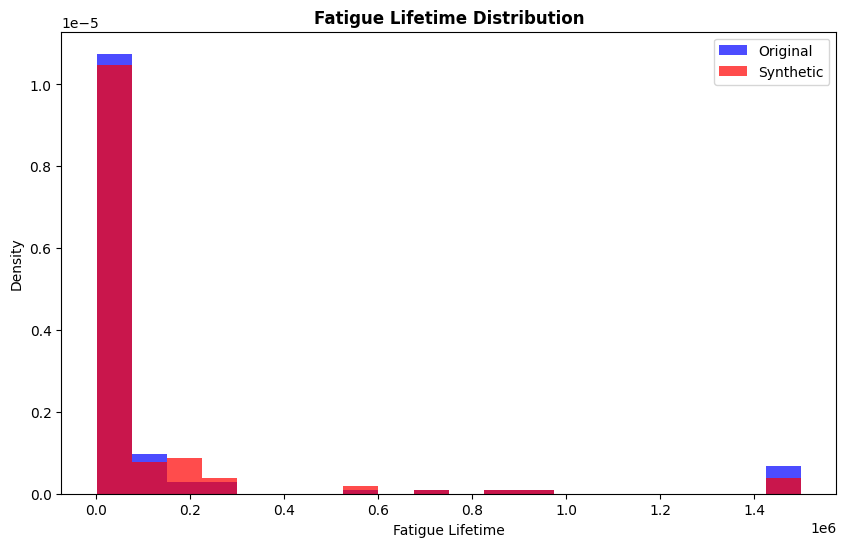

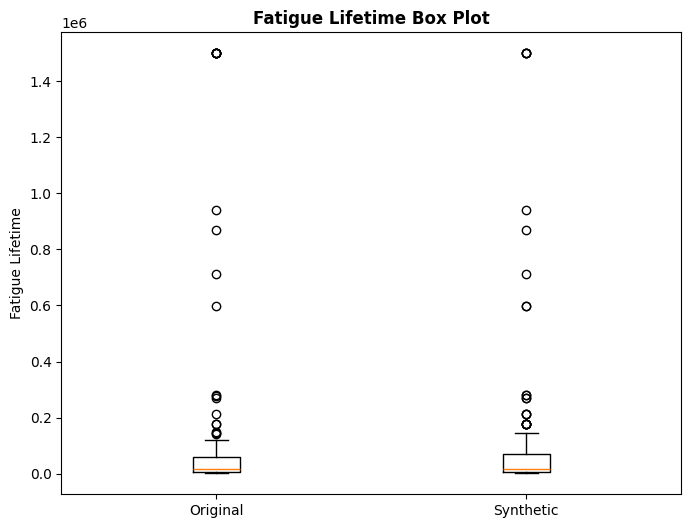

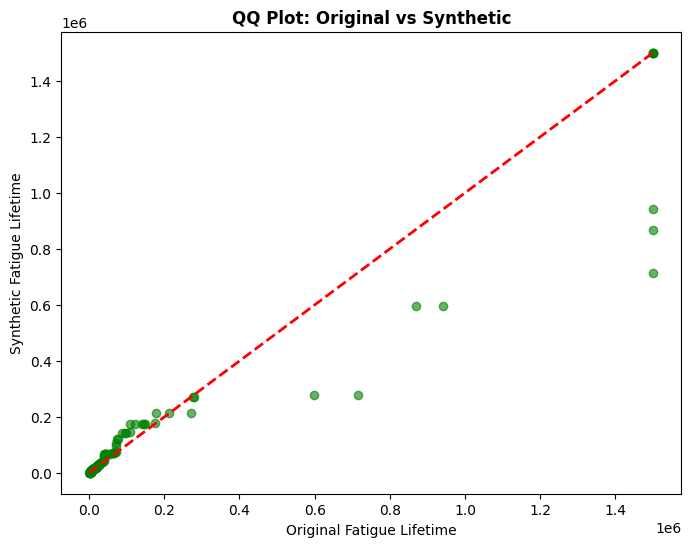

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(original_data['Fatigue Lifetime'], alpha=0.7, label='Original', bins=20, color='blue', density=True)
plt.hist(synthetic_data['Fatigue Lifetime'], alpha=0.7, label='Synthetic', bins=20, color='red', density=True)
plt.title('Fatigue Lifetime Distribution', fontweight='bold')
plt.legend()
plt.xlabel('Fatigue Lifetime')
plt.ylabel('Density')
plt.show()


plt.figure(figsize=(8, 6))
box_data = [original_data['Fatigue Lifetime'], synthetic_data['Fatigue Lifetime']]
plt.boxplot(box_data, labels=['Original', 'Synthetic'])
plt.title('Fatigue Lifetime Box Plot', fontweight='bold')
plt.ylabel('Fatigue Lifetime')
plt.show()


plt.figure(figsize=(8, 6))
sorted_orig = np.sort(original_data['Fatigue Lifetime'])
sorted_synth = np.sort(synthetic_data['Fatigue Lifetime'])
min_len = min(len(sorted_orig), len(sorted_synth))
plt.scatter(sorted_orig[:min_len], sorted_synth[:min_len], alpha=0.6, color='green')
plt.plot([sorted_orig.min(), sorted_orig.max()], [sorted_orig.min(), sorted_orig.max()], 'r--', linewidth=2)
plt.xlabel('Original Fatigue Lifetime')
plt.ylabel('Synthetic Fatigue Lifetime')
plt.title('QQ Plot: Original vs Synthetic', fontweight='bold')
plt.show()

#dnn model (0.93)

Dataset: 278 samples, 4 features
Features: ['Nozzle Diameter', 'Print Speed', 'Nozzle Temperature', 'Stress Level']

Creating Deterministic DNN Model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)


Training DNN Model...
Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.9895 - mae: 0.8323 - val_loss: 0.7639 - val_mae: 0.7186 - learning_rate: 0.0010
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8370 - mae: 0.7536 - val_loss: 0.6391 - val_mae: 0.6496 - learning_rate: 0.0010
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7036 - mae: 0.6774 - val_loss: 0.5281 - val_mae: 0.5828 - learning_rate: 0.0010
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5786 - mae: 0.6040 - val_loss: 0.4346 - val_mae: 0.5186 - learning_rate: 0.0010
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4659 - mae: 0.5333 - val_loss: 0.3617 - val_mae: 0.4630 - learning_rate: 0.0010
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3719 - mae: 0.4707 - val_loss: 0.3003 - val_mae: 0.4088 - learning_rate: 0.0010
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2987 - mae: 0.4194 - val_loss: 0.2598 - val_mae: 0.3746 - learning_rate: 0.00

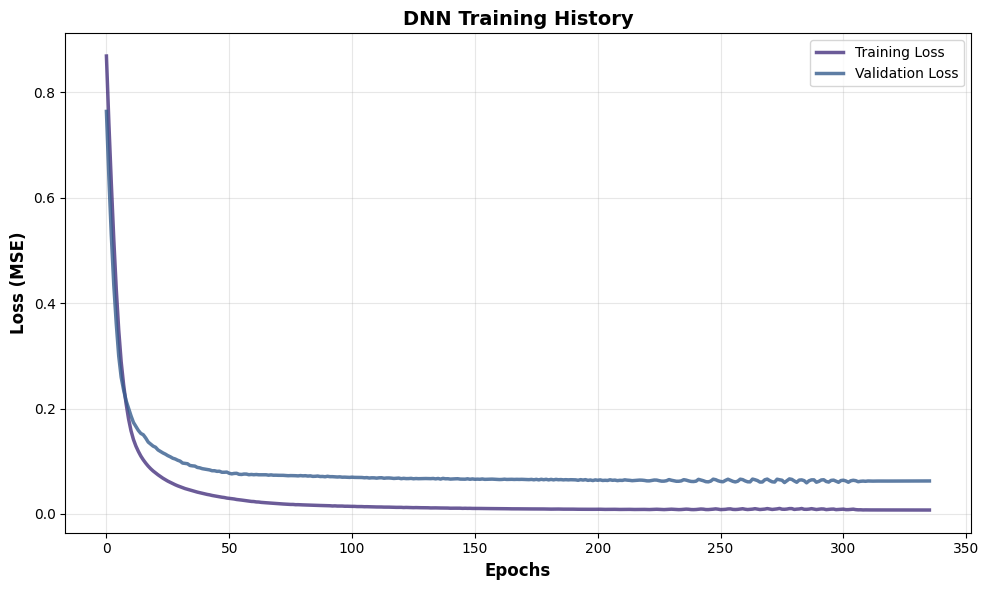

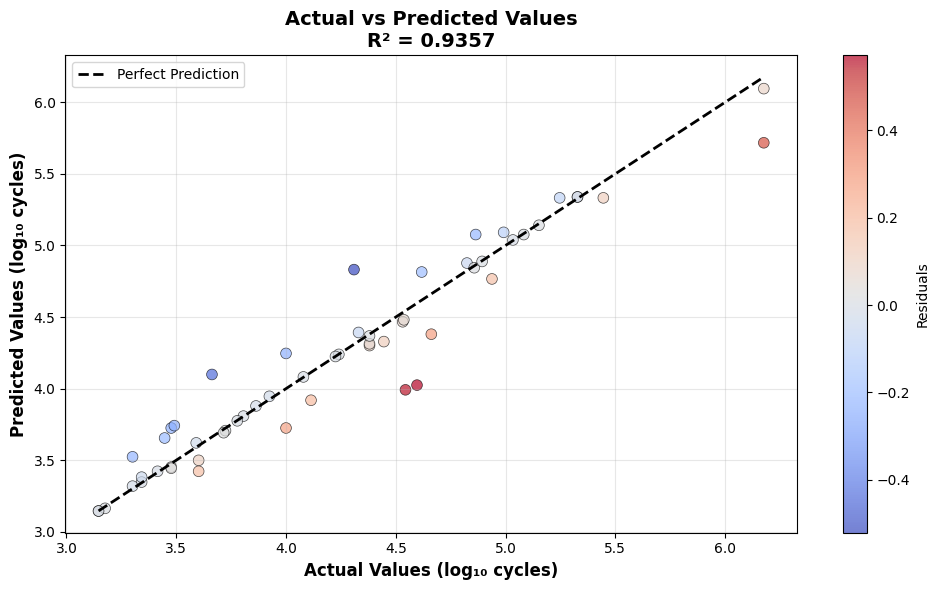

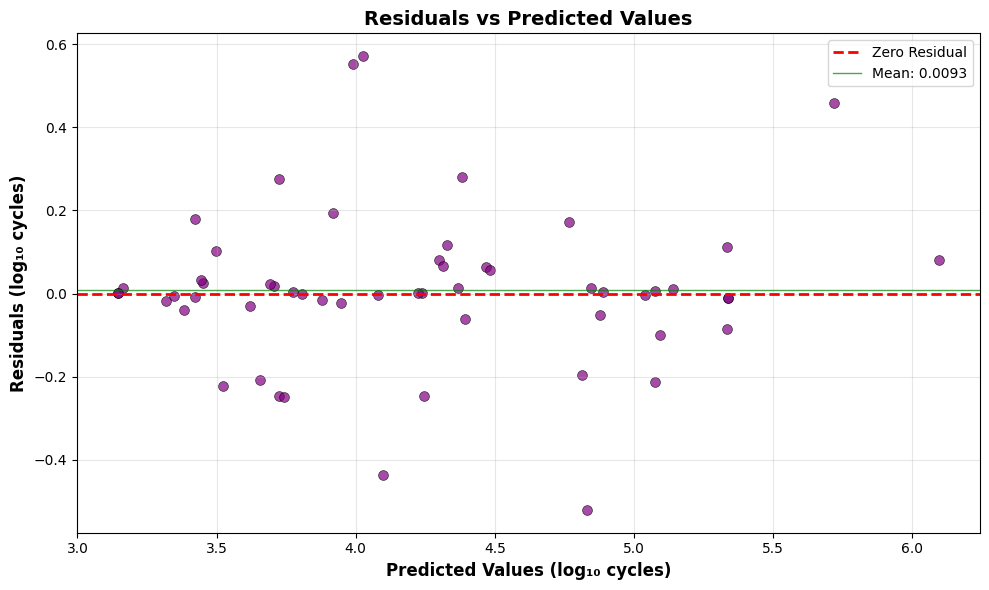

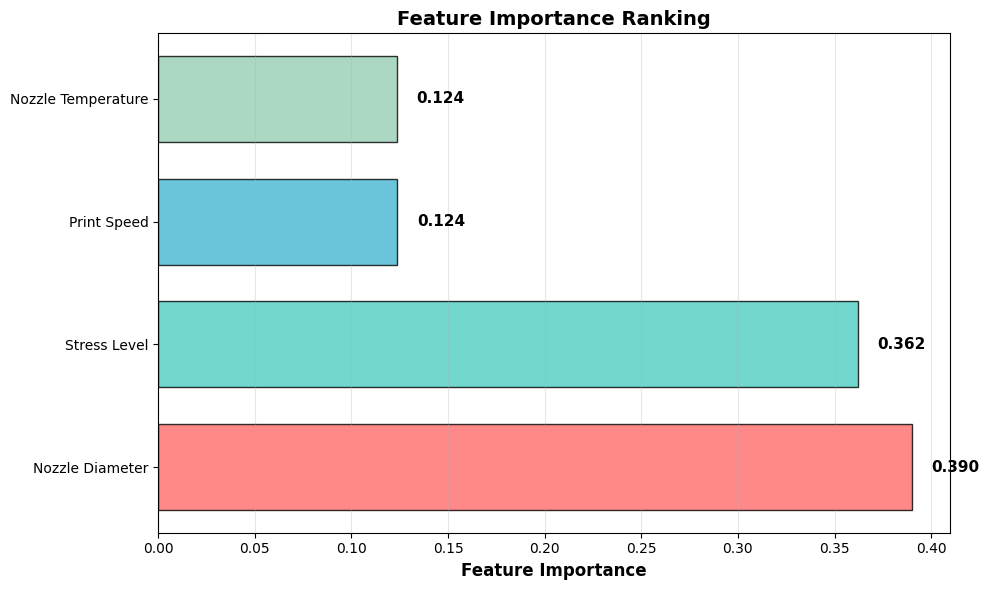

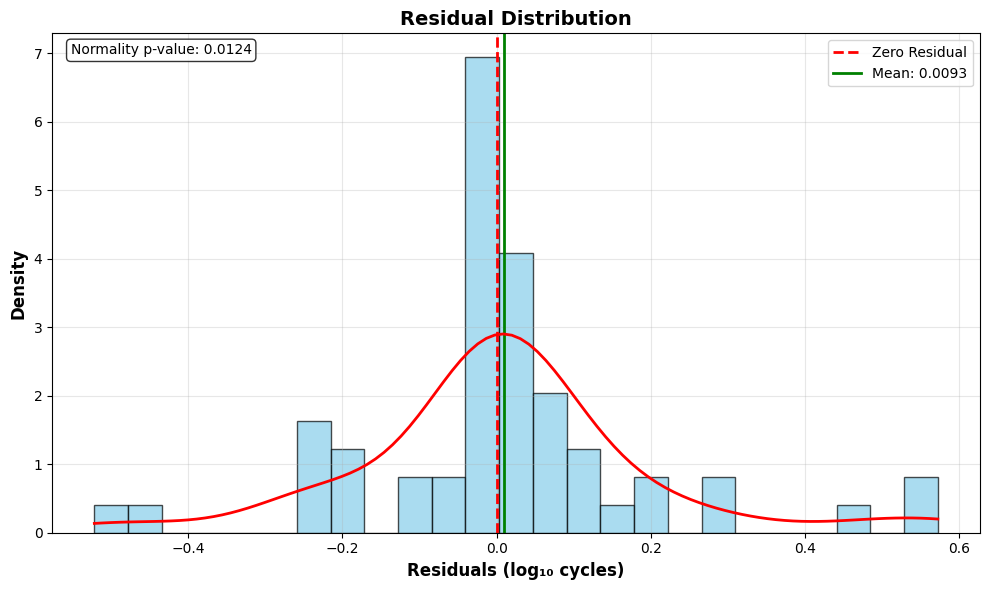

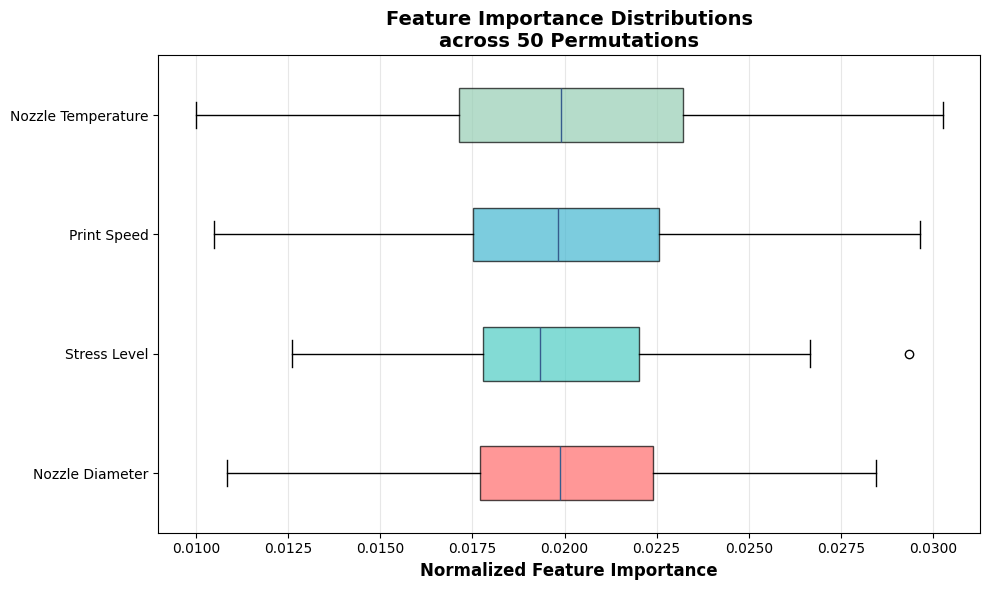


METRICS INTERPRETATION IN ORIGINAL SCALE

KEY METRICS IN ORIGINAL SCALE:
--------------------------------------------------
R² Score                 :     0.758924
MSE                      : 18,524,854,452 cycles
RMSE                     :      136,106 cycles
MAE                      :       29,940 cycles
MAPE                     :        28.35 cycles
Median Absolute Error    :        2,205 cycles
FINAL SUMMARY

MODEL PERFORMANCE SUMMARY:
R² Score (Log10): 0.935743
RMSE (Log10): 0.189637
MAE (Log10): 0.116859

FEATURE IMPORTANCE RANKING:
----------------------------------------
 1. Nozzle Diameter      - 0.390
 2. Stress Level         - 0.362
 3. Print Speed          - 0.124
 4. Nozzle Temperature   - 0.124

DATA CHARACTERISTICS:
Training samples: 222
Test samples: 56
Features: 4


In [ ]:
import tensorflow as tf
import numpy as np
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error,
                            mean_absolute_percentage_error, explained_variance_score,
                            median_absolute_error, max_error)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.keras.utils.set_random_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    tf.config.experimental.enable_op_determinism()

set_seeds(42)

df = pd.read_csv('combined_bootstrap_fatigue.csv')

X = df[['Nozzle Diameter', 'Print Speed', 'Nozzle Temperature', 'Stress Level']].values
y = np.log10(df['Fatigue Lifetime'].values)

feature_names = ['Nozzle Diameter', 'Print Speed', 'Nozzle Temperature', 'Stress Level']

print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Features: {feature_names}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

def create_deterministic_dnn():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(4,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    return model

print("\nCreating Deterministic DNN Model...")
dnn_model = create_deterministic_dnn()

dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

dnn_model.summary()

print("\nTraining DNN Model...")

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=50,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=20,
        min_lr=1e-7,
        verbose=1
    )
]

history = dnn_model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=500,
    batch_size=32,
    callbacks=callbacks,
    verbose=1,
    shuffle=False
)

print(f"Training completed after {len(history.history['loss'])} epochs")

print("\nCOMPREHENSIVE PERFORMANCE METRICS - LOG10 SPACE")

y_pred_log_scaled = dnn_model.predict(X_test_scaled, verbose=0).flatten()
y_pred_log = scaler_y.inverse_transform(y_pred_log_scaled.reshape(-1, 1)).flatten()

residuals_log = y_test - y_pred_log

metrics_log = {
    'R² Score': r2_score(y_test, y_pred_log),
    'Explained Variance Score': explained_variance_score(y_test, y_pred_log),
    'Mean Squared Error (MSE)': mean_squared_error(y_test, y_pred_log),
    'Root Mean Squared Error (RMSE)': np.sqrt(mean_squared_error(y_test, y_pred_log)),
    'Mean Absolute Error (MAE)': mean_absolute_error(y_test, y_pred_log),
    'Median Absolute Error': median_absolute_error(y_test, y_pred_log),
    'Mean Absolute Percentage Error (MAPE)': mean_absolute_percentage_error(y_test, y_pred_log) * 100,
    'Max Error': max_error(y_test, y_pred_log),
    'Mean Bias Error': np.mean(y_pred_log - y_test),
    'Relative Absolute Error': np.sum(np.abs(y_test - y_pred_log)) / np.sum(np.abs(y_test - np.mean(y_test))),
    'Relative Squared Error': np.sum((y_test - y_pred_log) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
}

metrics_log.update({
    'Residual Mean': np.mean(residuals_log),
    'Residual Std': np.std(residuals_log),
    'Residual Skewness': stats.skew(residuals_log),
    'Residual Kurtosis': stats.kurtosis(residuals_log),
    'Residual RMSE': np.sqrt(np.mean(residuals_log ** 2)),
    'Residual MAE': np.mean(np.abs(residuals_log))
})

print("\nCOMPREHENSIVE MODEL METRICS (LOG10 SPACE):")
print("-" * 60)
for metric, value in metrics_log.items():
    if 'R²' in metric or 'Score' in metric:
        print(f"{metric:35}: {value:>12.6f}")
    elif 'Percentage' in metric:
        print(f"{metric:35}: {value:>12.4f}%")
    else:
        print(f"{metric:35}: {value:>12.6f}")

print("\nNORMALIZED FEATURE IMPORTANCE (SUM = 1.0)")

def normalized_permutation_importance(model, X, y, feature_names, n_repeats=50, random_state=42):
    print(f"Calculating permutation importance with {n_repeats} repetitions...")

    result = permutation_importance(
        model, X, y,
        n_repeats=n_repeats,
        scoring='r2',
        random_state=random_state,
        n_jobs=-1
    )

    raw_importance = np.maximum(result.importances_mean, 0)

    total_importance = np.sum(raw_importance)
    if total_importance > 0:
        normalized_importance = raw_importance / total_importance
    else:
        normalized_importance = raw_importance

    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': normalized_importance,
        'Raw_Importance': raw_importance,
        'Raw_Std': result.importances_std
    }).sort_values('Importance', ascending=False)

    importance_df['Rank'] = range(1, len(importance_df) + 1)

    return importance_df, result

importance_df, perm_result = normalized_permutation_importance(
    dnn_model, X_test_scaled, y_test_scaled, feature_names, n_repeats=50
)

print("\nFEATURE IMPORTANCE:")
print("-" * 40)
print(f"{'Feature':20} {'Importance':>10} {'Rank':>6}")
print("-" * 40)

for _, row in importance_df.iterrows():
    print(f"{row['Feature']:20} {row['Importance']:10.3f} {row['Rank']:6.0f}")

print("-" * 40)
total_importance = importance_df['Importance'].sum()
print(f"{'TOTAL':20} {total_importance:10.3f} {'':6}")

print("\nGENERATING INDIVIDUAL PLOTS")

plt.style.use('default')
sns.set_palette("viridis")

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2.5, alpha=0.8)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2.5, alpha=0.8)
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
plt.title('DNN Training History', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_test, y_pred_log, alpha=0.7, c=residuals_log,
                     cmap='coolwarm', s=60, edgecolor='black', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'k--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values (log₁₀ cycles)', fontsize=12, fontweight='bold')
plt.ylabel('Predicted Values (log₁₀ cycles)', fontsize=12, fontweight='bold')
plt.title(f'Actual vs Predicted Values\nR² = {metrics_log["R² Score"]:.4f}',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.colorbar(scatter, label='Residuals')
plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_log, residuals_log, alpha=0.7, color='purple', s=50,
           edgecolor='black', linewidth=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')
plt.axhline(y=metrics_log['Residual Mean'], color='green', linestyle='-',
           linewidth=1, alpha=0.7, label=f'Mean: {metrics_log["Residual Mean"]:.4f}')
plt.xlabel('Predicted Values (log₁₀ cycles)', fontsize=12, fontweight='bold')
plt.ylabel('Residuals (log₁₀ cycles)', fontsize=12, fontweight='bold')
plt.title('Residuals vs Predicted Values', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('residuals_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
y_pos = np.arange(len(importance_df))

bars = plt.barh(y_pos, importance_df['Importance'],
                color=colors, edgecolor='black', alpha=0.8, height=0.7)

plt.yticks(y_pos, importance_df['Feature'])
plt.xlabel('Feature Importance', fontsize=12, fontweight='bold')
plt.title('Feature Importance Ranking', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

for i, (bar, importance) in enumerate(zip(bars, importance_df['Importance'])):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{importance:.3f}', ha='left', va='center',
             fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(residuals_log, bins=25, alpha=0.7,
                           color='skyblue', edgecolor='black', density=True)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')
plt.axvline(x=metrics_log['Residual Mean'], color='green', linestyle='-',
           linewidth=2, label=f'Mean: {metrics_log["Residual Mean"]:.4f}')
plt.xlabel('Residuals (log₁₀ cycles)', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.title('Residual Distribution', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

kde = stats.gaussian_kde(residuals_log)
x_range = np.linspace(residuals_log.min(), residuals_log.max(), 100)
plt.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')

_, normality_p = stats.normaltest(residuals_log)
plt.text(0.02, 0.98, f'Normality p-value: {normality_p:.4f}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('residual_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
box_data = [perm_result.importances[i] for i in importance_df.index]

box_data_normalized = []
for feature_data in box_data:
    total = np.sum(np.maximum(feature_data, 0))
    if total > 0:
        normalized_data = np.maximum(feature_data, 0) / total
    else:
        normalized_data = np.maximum(feature_data, 0)
    box_data_normalized.append(normalized_data)

box_plot = plt.boxplot(box_data_normalized, vert=False, patch_artist=True,
                      labels=importance_df['Feature'])

for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.xlabel('Normalized Feature Importance', fontsize=12, fontweight='bold')
plt.title('Feature Importance Distributions\nacross 50 Permutations',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('feature_importance_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nMETRICS INTERPRETATION IN ORIGINAL SCALE")

y_pred_original = 10 ** y_pred_log
y_test_original = 10 ** y_test

metrics_original = {
    'R² Score': r2_score(y_test_original, y_pred_original),
    'MSE': mean_squared_error(y_test_original, y_pred_original),
    'RMSE': np.sqrt(mean_squared_error(y_test_original, y_pred_original)),
    'MAE': mean_absolute_error(y_test_original, y_pred_original),
    'MAPE': mean_absolute_percentage_error(y_test_original, y_pred_original) * 100,
    'Median Absolute Error': median_absolute_error(y_test_original, y_pred_original)
}

print("\nKEY METRICS IN ORIGINAL SCALE:")
print("-" * 50)
for metric, value in metrics_original.items():
    if 'R²' in metric or 'Score' in metric:
        print(f"{metric:25}: {value:>12.6f}")
    elif 'Percentage' in metric:
        print(f"{metric:25}: {value:>12.2f}%")
    elif value > 1000:
        print(f"{metric:25}: {value:>12,.0f} cycles")
    else:
        print(f"{metric:25}: {value:>12.2f} cycles")

print("FINAL SUMMARY")

print(f"\nMODEL PERFORMANCE SUMMARY:")
print(f"R² Score (Log10): {metrics_log['R² Score']:.6f}")
print(f"RMSE (Log10): {metrics_log['Root Mean Squared Error (RMSE)']:.6f}")
print(f"MAE (Log10): {metrics_log['Mean Absolute Error (MAE)']:.6f}")

print(f"\nFEATURE IMPORTANCE RANKING:")
print("-" * 40)
for i, (_, row) in enumerate(importance_df.iterrows(), 1):
    print(f"{i:2}. {row['Feature']:20} - {row['Importance']:.3f}")

print(f"\nDATA CHARACTERISTICS:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")



COMPLETE DNN WITH 3D BAR PLOTS
Dataset: 278 samples, 4 features
Features: ['Nozzle Diameter', 'Print Speed', 'Nozzle Temperature', 'Stress Level']

Creating Deterministic DNN Model...
DNN Architecture Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)


Training DNN Model...
Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.9895 - mae: 0.8323 - val_loss: 0.7639 - val_mae: 0.7186 - learning_rate: 0.0010
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.8370 - mae: 0.7536 - val_loss: 0.6391 - val_mae: 0.6496 - learning_rate: 0.0010
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7036 - mae: 0.6774 - val_loss: 0.5281 - val_mae: 0.5828 - learning_rate: 0.0010
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5786 - mae: 0.6040 - val_loss: 0.4346 - val_mae: 0.5186 - learning_rate: 0.0010
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4659 - mae: 0.5333 - val_loss: 0.3617 - val_mae: 0.4630 - learning_rate: 0.0010
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.3719 - mae: 0.4707 - val_loss: 0.3003 - val_mae: 0.4088 - learning_rate: 0.0010
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.2987 - mae: 0.4194 - val_loss: 0.2598 - val_mae: 0.3746 - learning_rate: 0.0


📊 COMPREHENSIVE MODEL METRICS (LOG10 SPACE):
------------------------------------------------------------
R² Score                           :     0.935743
Explained Variance Score           :     0.935898
Mean Squared Error (MSE)           :     0.035962
Root Mean Squared Error (RMSE)     :     0.189637
Mean Absolute Error (MAE)          :     0.116859
Median Absolute Error              :     0.054395
Mean Absolute Percentage Error (MAPE):       2.7483%
Max Error                          :     0.572002
Mean Bias Error                    :    -0.009306
Relative Absolute Error            :     0.186637
Relative Squared Error             :     0.064257
Residual Mean                      :     0.009306
Residual Std                       :     0.189408
Residual Skewness                  :     0.404060
Residual Kurtosis                  :     2.317679
Residual RMSE                      :     0.189637
Residual MAE                       :     0.116859

NORMALIZED FEATURE IMPORTANCE (SUM = 1.

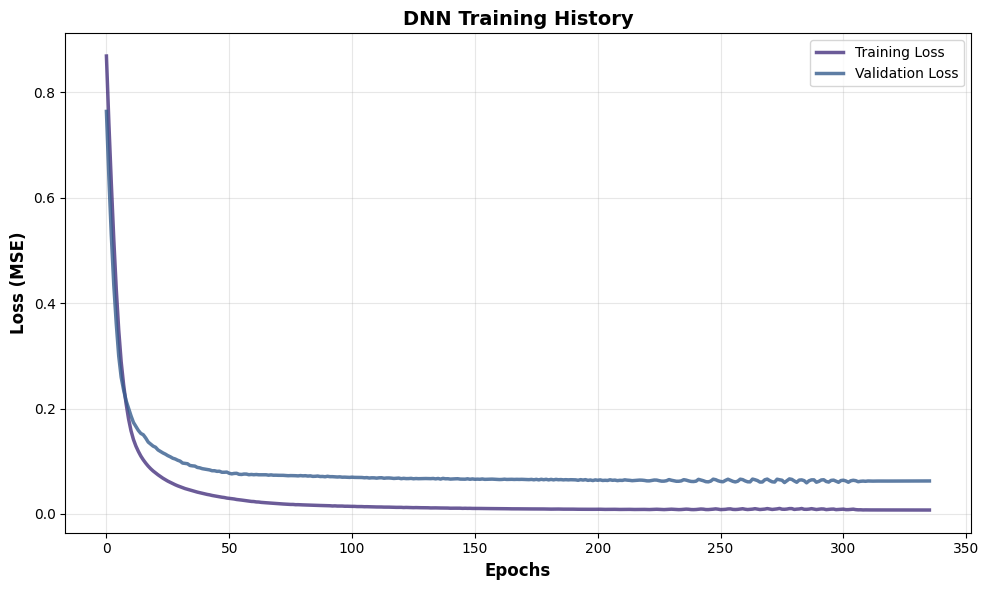

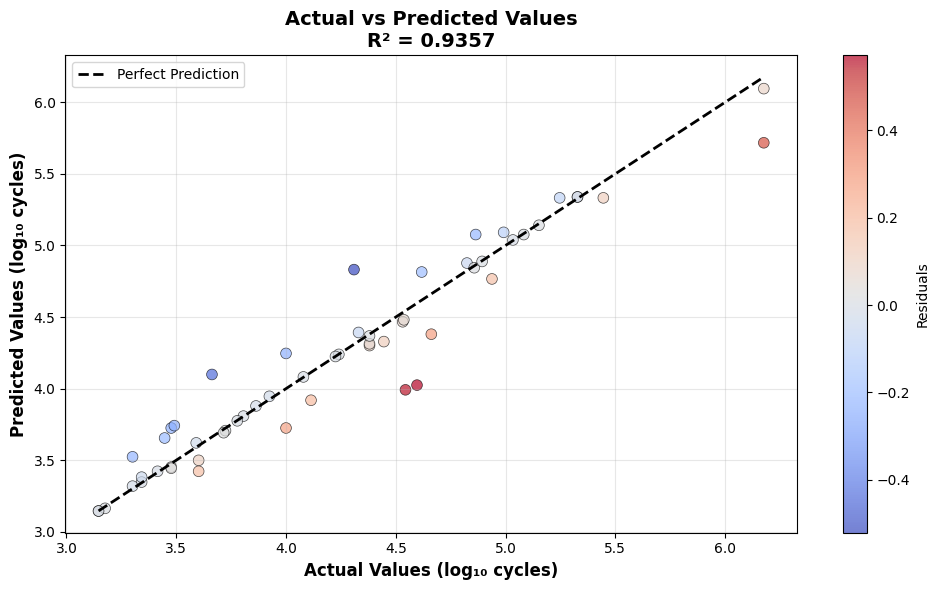

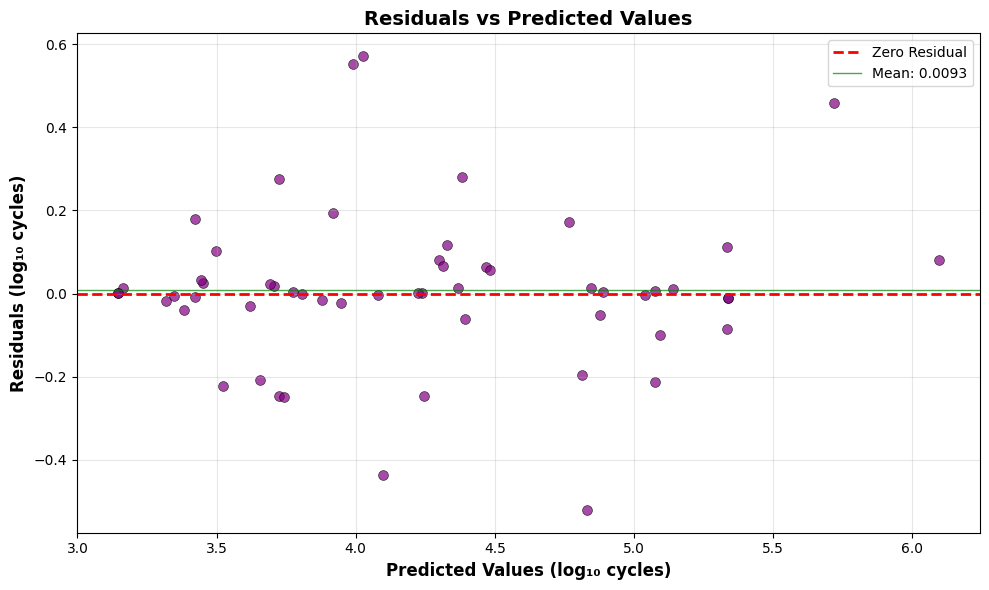

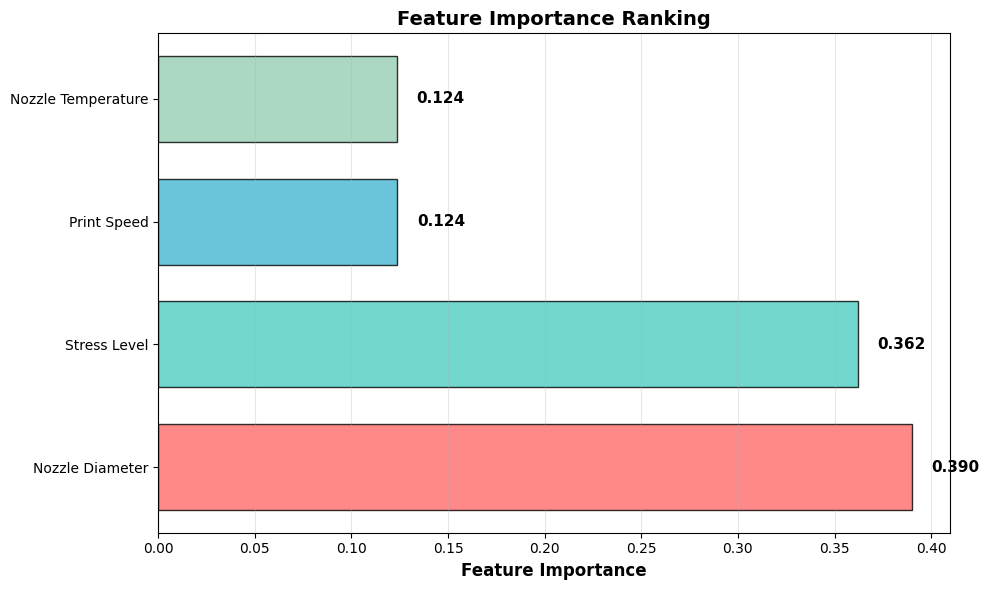

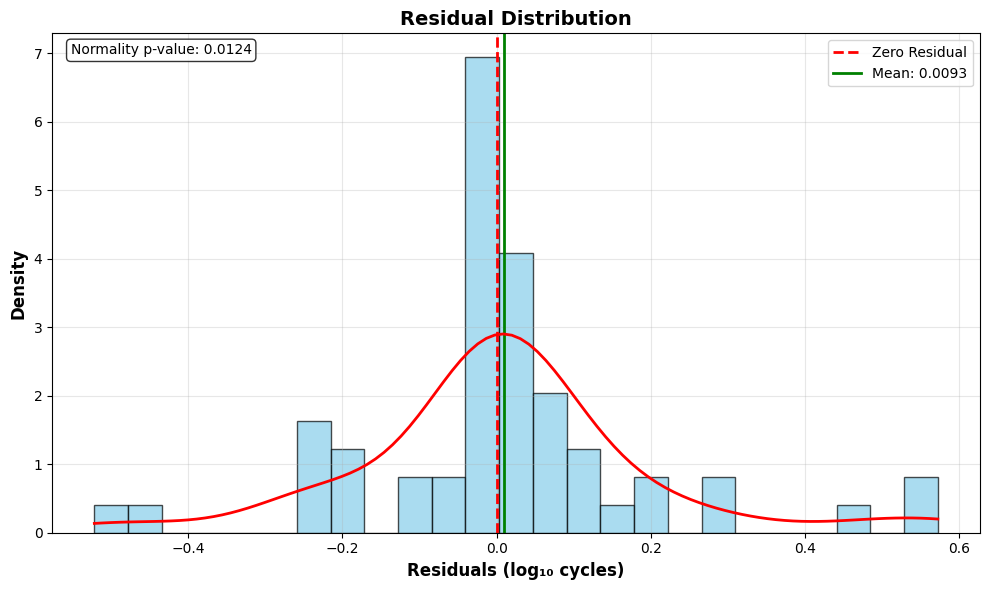

METRICS INTERPRETATION IN ORIGINAL SCALE

 KEY METRICS IN ORIGINAL SCALE:
R² Score                 :     0.758924
MSE                      : 18,524,854,452 cycles
RMSE                     :      136,106 cycles
MAE                      :       29,940 cycles
MAPE                     :        28.35 cycles
Median Absolute Error    :        2,205 cycles
3D Feature Importance Bars


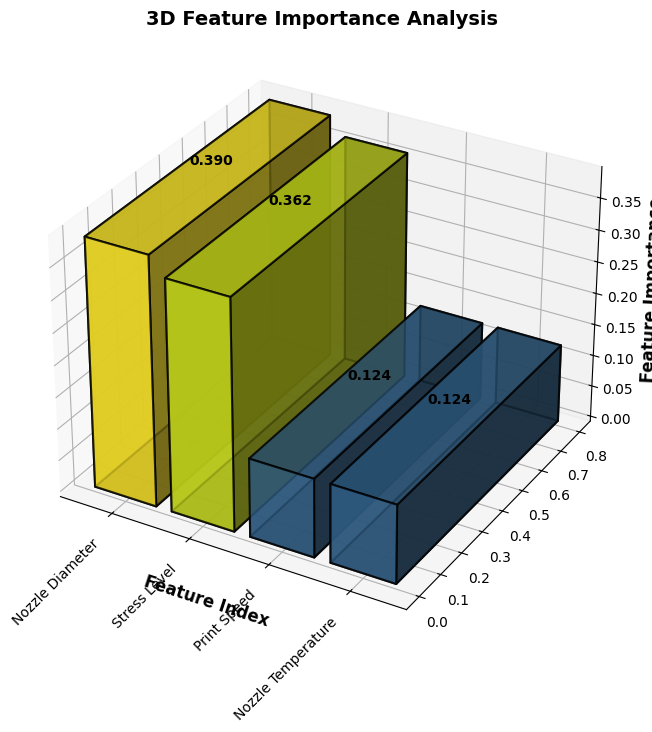

3D Metrics Comparison Bars


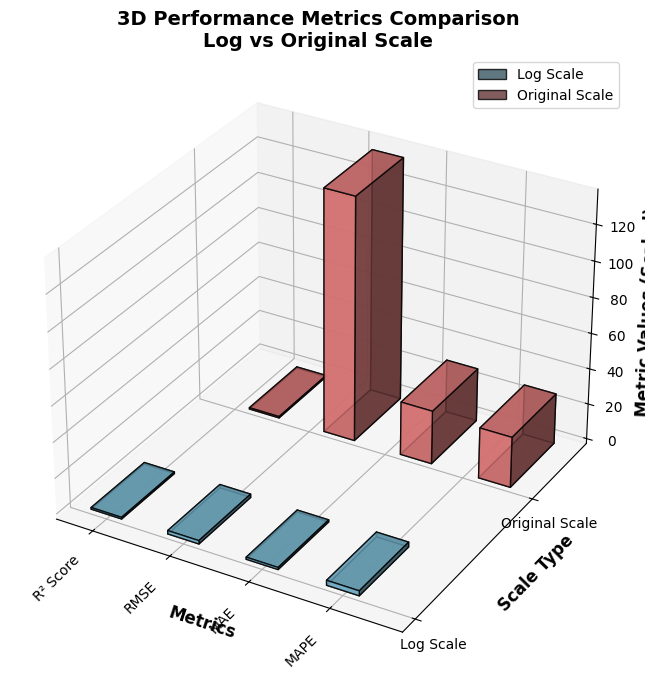

3D Residual Distribution Bars


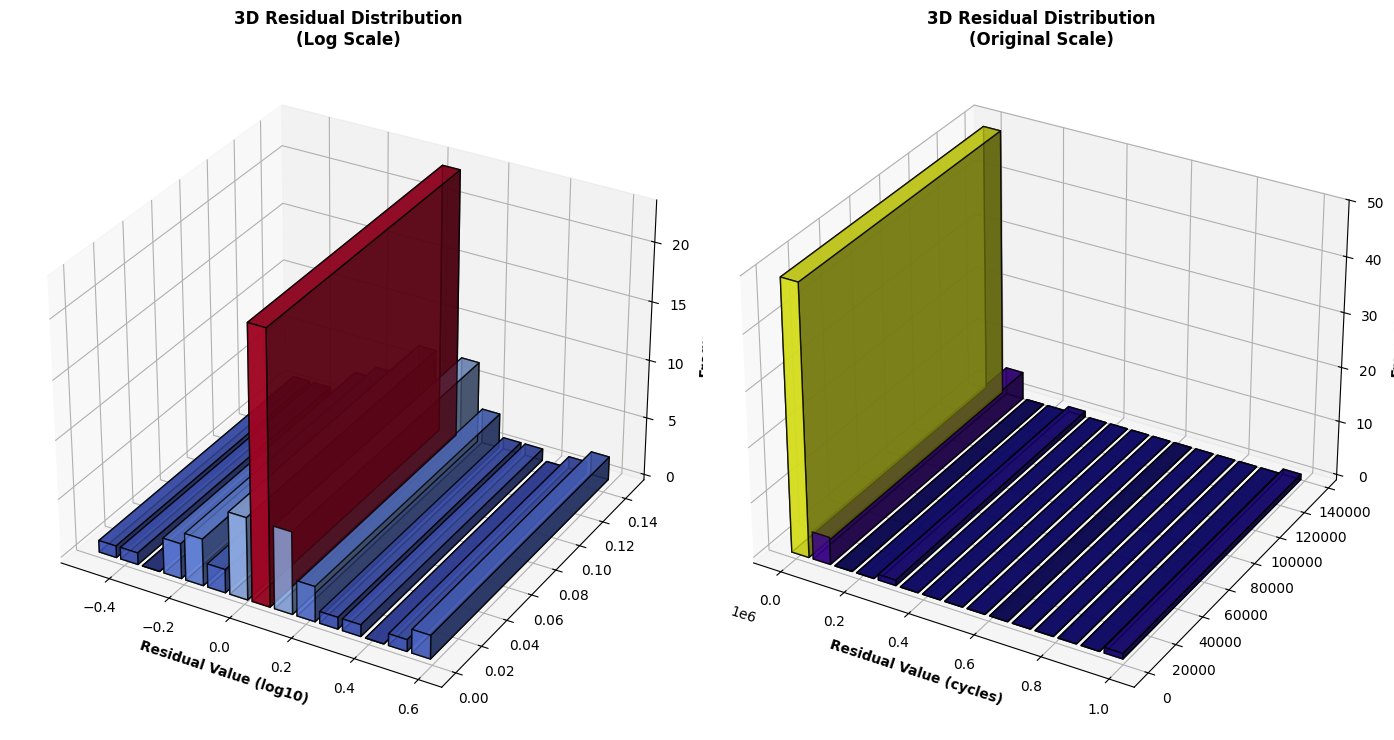

3D Feature Correlation Bars...


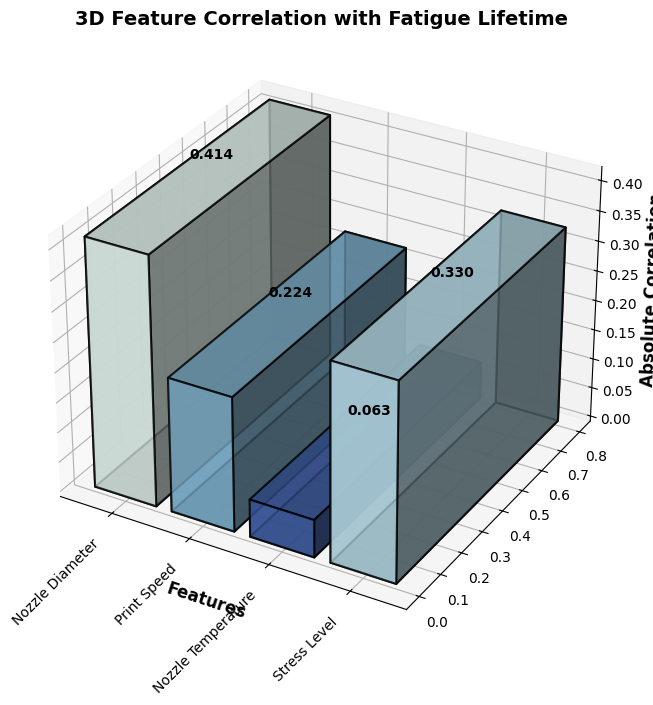

3D Prediction Accuracy Bars


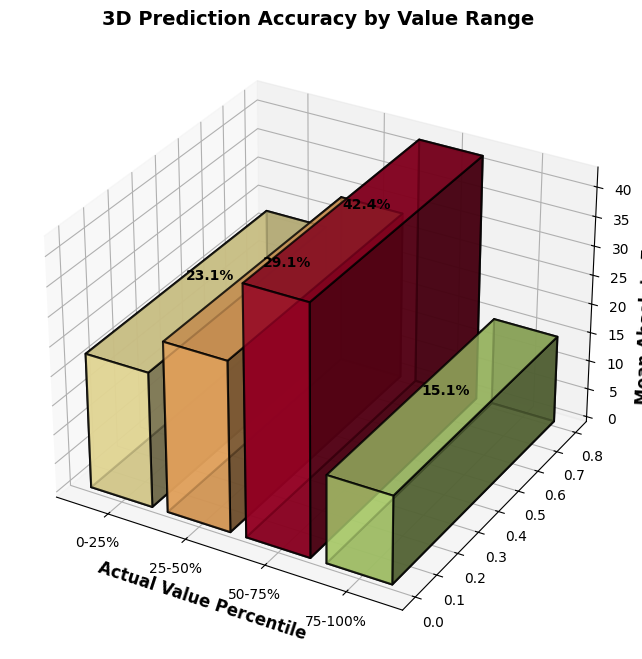


MODEL PERFORMANCE SUMMARY:
R² Score (Log10): 0.935743
RMSE (Log10): 0.189637
MAE (Log10): 0.116859

 FEATURE IMPORTANCE RANKING:
----------------------------------------
 1. Nozzle Diameter      - 0.390
 2. Stress Level         - 0.362
 3. Print Speed          - 0.124
 4. Nozzle Temperature   - 0.124

 DATA CHARACTERISTICS:
Training samples: 222
Test samples: 56
Features: 4


In [ ]:
import tensorflow as tf
import numpy as np
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error,
                            mean_absolute_percentage_error, explained_variance_score,
                            median_absolute_error, max_error)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.keras.utils.set_random_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    tf.config.experimental.enable_op_determinism()

set_seeds(42)

print("=" * 70)
print("COMPLETE DNN WITH 3D BAR PLOTS")
print("=" * 70)



# Load data
df = pd.read_csv('combined_bootstrap_fatigue.csv')


X = df[['Nozzle Diameter', 'Print Speed', 'Nozzle Temperature', 'Stress Level']].values
y = np.log10(df['Fatigue Lifetime'].values)


feature_names = ['Nozzle Diameter', 'Print Speed', 'Nozzle Temperature', 'Stress Level']

print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Features: {feature_names}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Feature scaling
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Target scaling
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()



def create_deterministic_dnn():
    """Create DNN without dropout for deterministic results"""
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(4,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    return model


print("\nCreating Deterministic DNN Model...")
dnn_model = create_deterministic_dnn()

dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("DNN Architecture Summary:")
dnn_model.summary()



print("\nTraining DNN Model...")

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=50,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=20,
        min_lr=1e-7,
        verbose=1
    )
]

history = dnn_model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=500,
    batch_size=32,
    callbacks=callbacks,
    verbose=1,
    shuffle=False
)

print(f"Training completed after {len(history.history['loss'])} epochs")



print("\n" + "=" * 70)
print("COMPREHENSIVE PERFORMANCE METRICS - LOG10 SPACE")
print("=" * 70)


y_pred_log_scaled = dnn_model.predict(X_test_scaled, verbose=0).flatten()
y_pred_log = scaler_y.inverse_transform(y_pred_log_scaled.reshape(-1, 1)).flatten()


residuals_log = y_test - y_pred_log


metrics_log = {
    'R² Score': r2_score(y_test, y_pred_log),
    'Explained Variance Score': explained_variance_score(y_test, y_pred_log),
    'Mean Squared Error (MSE)': mean_squared_error(y_test, y_pred_log),
    'Root Mean Squared Error (RMSE)': np.sqrt(mean_squared_error(y_test, y_pred_log)),
    'Mean Absolute Error (MAE)': mean_absolute_error(y_test, y_pred_log),
    'Median Absolute Error': median_absolute_error(y_test, y_pred_log),
    'Mean Absolute Percentage Error (MAPE)': mean_absolute_percentage_error(y_test, y_pred_log) * 100,
    'Max Error': max_error(y_test, y_pred_log),
    'Mean Bias Error': np.mean(y_pred_log - y_test),
    'Relative Absolute Error': np.sum(np.abs(y_test - y_pred_log)) / np.sum(np.abs(y_test - np.mean(y_test))),
    'Relative Squared Error': np.sum((y_test - y_pred_log) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
}


metrics_log.update({
    'Residual Mean': np.mean(residuals_log),
    'Residual Std': np.std(residuals_log),
    'Residual Skewness': stats.skew(residuals_log),
    'Residual Kurtosis': stats.kurtosis(residuals_log),
    'Residual RMSE': np.sqrt(np.mean(residuals_log ** 2)),
    'Residual MAE': np.mean(np.abs(residuals_log))
})


print("\n📊 COMPREHENSIVE MODEL METRICS (LOG10 SPACE):")
print("-" * 60)
for metric, value in metrics_log.items():
    if 'R²' in metric or 'Score' in metric:
        print(f"{metric:35}: {value:>12.6f}")
    elif 'Percentage' in metric:
        print(f"{metric:35}: {value:>12.4f}%")
    else:
        print(f"{metric:35}: {value:>12.6f}")


print("\n" + "=" * 70)
print("NORMALIZED FEATURE IMPORTANCE (SUM = 1.0)")
print("=" * 70)

def normalized_permutation_importance(model, X, y, feature_names, n_repeats=50, random_state=42):
    """Calculate normalized permutation importance that sums to 1.0"""

    print(f"Calculating permutation importance with {n_repeats} repetitions...")


    result = permutation_importance(
        model, X, y,
        n_repeats=n_repeats,
        scoring='r2',
        random_state=random_state,
        n_jobs=-1
    )


    raw_importance = np.maximum(result.importances_mean, 0)

    # NORMALIZE
    total_importance = np.sum(raw_importance)
    if total_importance > 0:
        normalized_importance = raw_importance / total_importance
    else:
        normalized_importance = raw_importance


    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': normalized_importance,
        'Raw_Importance': raw_importance,
        'Raw_Std': result.importances_std
    }).sort_values('Importance', ascending=False)


    importance_df['Rank'] = range(1, len(importance_df) + 1)

    return importance_df, result


importance_df, perm_result = normalized_permutation_importance(
    dnn_model, X_test_scaled, y_test_scaled, feature_names, n_repeats=50
)


print("\n📊 FEATURE IMPORTANCE:")
print("-" * 40)
print(f"{'Feature':20} {'Importance':>10} {'Rank':>6}")
print("-" * 40)

for _, row in importance_df.iterrows():
    print(f"{row['Feature']:20} {row['Importance']:10.3f} {row['Rank']:6.0f}")

print("-" * 40)
total_importance = importance_df['Importance'].sum()
print(f"{'TOTAL':20} {total_importance:10.3f} {'':6}")



print("\n" + "=" * 70)
print("GENERATING 2D PLOTS")
print("=" * 70)


plt.style.use('default')
sns.set_palette("viridis")

# Training History
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2.5, alpha=0.8)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2.5, alpha=0.8)
plt.xlabel('Epochs', fontsize=12, fontweight='bold')
plt.ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
plt.title('DNN Training History', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Actual vs Predicted
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_test, y_pred_log, alpha=0.7, c=residuals_log,
                     cmap='coolwarm', s=60, edgecolor='black', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'k--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values (log₁₀ cycles)', fontsize=12, fontweight='bold')
plt.ylabel('Predicted Values (log₁₀ cycles)', fontsize=12, fontweight='bold')
plt.title(f'Actual vs Predicted Values\nR² = {metrics_log["R² Score"]:.4f}',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.colorbar(scatter, label='Residuals')
plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_log, residuals_log, alpha=0.7, color='purple', s=50,
           edgecolor='black', linewidth=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')
plt.axhline(y=metrics_log['Residual Mean'], color='green', linestyle='-',
           linewidth=1, alpha=0.7, label=f'Mean: {metrics_log["Residual Mean"]:.4f}')
plt.xlabel('Predicted Values (log₁₀ cycles)', fontsize=12, fontweight='bold')
plt.ylabel('Residuals (log₁₀ cycles)', fontsize=12, fontweight='bold')
plt.title('Residuals vs Predicted Values', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('residuals_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
y_pos = np.arange(len(importance_df))

bars = plt.barh(y_pos, importance_df['Importance'],
                color=colors, edgecolor='black', alpha=0.8, height=0.7)

plt.yticks(y_pos, importance_df['Feature'])
plt.xlabel('Feature Importance', fontsize=12, fontweight='bold')
plt.title('Feature Importance Ranking', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# value labels
for i, (bar, importance) in enumerate(zip(bars, importance_df['Importance'])):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{importance:.3f}', ha='left', va='center',
             fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Residual Distribution
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(residuals_log, bins=25, alpha=0.7,
                           color='skyblue', edgecolor='black', density=True)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')
plt.axvline(x=metrics_log['Residual Mean'], color='green', linestyle='-',
           linewidth=2, label=f'Mean: {metrics_log["Residual Mean"]:.4f}')
plt.xlabel('Residuals (log₁₀ cycles)', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.title('Residual Distribution', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# KDE plot
kde = stats.gaussian_kde(residuals_log)
x_range = np.linspace(residuals_log.min(), residuals_log.max(), 100)
plt.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')

# normality test results
_, normality_p = stats.normaltest(residuals_log)
plt.text(0.02, 0.98, f'Normality p-value: {normality_p:.4f}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('residual_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



def create_3d_feature_importance_bar(importance_df, feature_names):
    """Create 3D bar plot for feature importance"""
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')


    x_pos = np.arange(len(importance_df))
    y_pos = np.zeros(len(importance_df))
    z_pos = np.zeros(len(importance_df))

    dx = 0.8
    dy = 0.8
    dz = importance_df['Importance'].values


    colors = plt.cm.viridis(dz / dz.max())

    # Plot 3D
    bars = ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz,
                   color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)


    ax.set_xlabel('Feature Index', fontweight='bold', fontsize=12)
    ax.set_ylabel('', fontweight='bold', fontsize=12)
    ax.set_zlabel('Feature Importance', fontweight='bold', fontsize=12)


    ax.set_xticks(x_pos + dx/2)
    ax.set_xticklabels(importance_df['Feature'], rotation=45, ha='right')

    ax.set_title('3D Feature Importance Analysis', fontweight='bold', fontsize=14)


    for i, (x, z) in enumerate(zip(x_pos, dz)):
        ax.text(x + dx/2, dy/2, z + 0.01, f'{z:.3f}',
               ha='center', va='bottom', fontweight='bold', fontsize=10)

    plt.tight_layout()
    plt.savefig('3d_feature_importance_bars.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_3d_metrics_bars(metrics_log, metrics_original):
    """Create 3D bar plot comparing metrics in log and original scales"""
    fig = plt.figure(figsize=(14, 8))
    ax = fig.add_subplot(111, projection='3d')


    selected_metrics_log = ['R² Score', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)', 'Mean Absolute Percentage Error (MAPE)']
    selected_metrics_orig = ['R² Score', 'RMSE', 'MAE', 'MAPE']

    metrics_log_values = []
    metrics_orig_values = []
    actual_metric_names = []


    metric_mapping = {
        'R² Score': 'R² Score',
        'Root Mean Squared Error (RMSE)': 'RMSE',
        'Mean Absolute Error (MAE)': 'MAE',
        'Mean Absolute Percentage Error (MAPE)': 'MAPE'
    }

    for log_metric, orig_metric in metric_mapping.items():
        if log_metric in metrics_log and orig_metric in metrics_original:
            metrics_log_values.append(metrics_log[log_metric])
            metrics_orig_values.append(metrics_original[orig_metric])
            actual_metric_names.append(orig_metric)

    if not metrics_log_values:
        print("Warning: No matching metrics found for 3D plot")
        return

    x_pos = np.arange(len(actual_metric_names))
    y_pos_log = np.zeros(len(actual_metric_names))
    y_pos_orig = np.ones(len(actual_metric_names))


    scale_factors = []
    z_log = []
    z_orig = []

    for i, metric in enumerate(actual_metric_names):
        log_val = metrics_log_values[i]
        orig_val = metrics_orig_values[i]

        if 'R²' in metric:

            z_log.append(log_val)
            z_orig.append(orig_val)
        elif 'MAPE' in metric:

            z_log.append(log_val)
            z_orig.append(orig_val)
        else:

            z_log.append(log_val * 10)
            z_orig.append(orig_val / 1000)

    dx = 0.4
    dy = 0.4


    bars_log = ax.bar3d(x_pos - dx/2, y_pos_log, np.zeros(len(actual_metric_names)),
                       dx, dy, z_log, color='skyblue', alpha=0.8,
                       label='Log Scale', edgecolor='black')

    # Plot original scale metrics
    bars_orig = ax.bar3d(x_pos + dx/2, y_pos_orig, np.zeros(len(actual_metric_names)),
                        dx, dy, z_orig, color='lightcoral', alpha=0.8,
                        label='Original Scale', edgecolor='black')

    # Customize plot
    ax.set_xlabel('Metrics', fontweight='bold', fontsize=12)
    ax.set_ylabel('Scale Type', fontweight='bold', fontsize=12)
    ax.set_zlabel('Metric Values (Scaled)', fontweight='bold', fontsize=12)

    ax.set_xticks(x_pos)
    ax.set_xticklabels(actual_metric_names, rotation=45, ha='right')
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Log Scale', 'Original Scale'])

    ax.set_title('3D Performance Metrics Comparison\nLog vs Original Scale',
                fontweight='bold', fontsize=14)

    ax.legend()
    plt.tight_layout()
    plt.savefig('3d_metrics_comparison_bars.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_3d_residual_distribution(residuals_log, residuals_original):
    """Create 3D histogram of residuals"""
    fig = plt.figure(figsize=(14, 10))

    # Residual distribution in log scale
    ax1 = fig.add_subplot(121, projection='3d')

    # histogram data
    hist, bin_edges = np.histogram(residuals_log, bins=15)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_width = np.diff(bin_edges)[0]

    x_pos = bin_centers
    y_pos = np.zeros(len(hist))
    z_pos = np.zeros(len(hist))

    dx = bin_width * 0.8
    dy = bin_width * 2
    dz = hist

    colors1 = plt.cm.coolwarm(hist / hist.max())

    bars1 = ax1.bar3d(x_pos, y_pos, z_pos, dx, dy, dz,
                     color=colors1, alpha=0.8, edgecolor='black')

    ax1.set_xlabel('Residual Value (log10)', fontweight='bold')
    ax1.set_ylabel('', fontweight='bold')
    ax1.set_zlabel('Frequency', fontweight='bold')
    ax1.set_title('3D Residual Distribution\n(Log Scale)', fontweight='bold')

    # Residual distribution in original scale
    ax2 = fig.add_subplot(122, projection='3d')

    hist_orig, bin_edges_orig = np.histogram(residuals_original, bins=15)
    bin_centers_orig = (bin_edges_orig[:-1] + bin_edges_orig[1:]) / 2
    bin_width_orig = np.diff(bin_edges_orig)[0]

    x_pos_orig = bin_centers_orig
    y_pos_orig = np.zeros(len(hist_orig))
    z_pos_orig = np.zeros(len(hist_orig))

    dx_orig = bin_width_orig * 0.8
    dy_orig = bin_width_orig * 2
    dz_orig = hist_orig

    colors2 = plt.cm.plasma(hist_orig / hist_orig.max())

    bars2 = ax2.bar3d(x_pos_orig, y_pos_orig, z_pos_orig, dx_orig, dy_orig, dz_orig,
                     color=colors2, alpha=0.8, edgecolor='black')

    ax2.set_xlabel('Residual Value (cycles)', fontweight='bold')
    ax2.set_ylabel('', fontweight='bold')
    ax2.set_zlabel('Frequency', fontweight='bold')
    ax2.set_title('3D Residual Distribution\n(Original Scale)', fontweight='bold')

    plt.tight_layout()
    plt.savefig('3d_residual_distribution_bars.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_3d_feature_correlation_bars(df, feature_names):
    """Create 3D bar plot showing feature correlations with target"""
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # correlations with target
    correlations = []
    for feature in feature_names:
        corr = df[feature].corr(df['Fatigue Lifetime'])
        correlations.append(abs(corr))

    x_pos = np.arange(len(feature_names))
    y_pos = np.zeros(len(feature_names))
    z_pos = np.zeros(len(feature_names))

    dx = 0.8
    dy = 0.8
    dz = correlations

    colors = plt.cm.RdYlBu_r(np.array(correlations))

    bars = ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz,
                   color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

    ax.set_xlabel('Features', fontweight='bold', fontsize=12)
    ax.set_ylabel('', fontweight='bold', fontsize=12)
    ax.set_zlabel('Absolute Correlation', fontweight='bold', fontsize=12)

    ax.set_xticks(x_pos + dx/2)
    ax.set_xticklabels(feature_names, rotation=45, ha='right')

    ax.set_title('3D Feature Correlation with Fatigue Lifetime',
                fontweight='bold', fontsize=14)

    # correlation values on bars
    for i, (x, corr) in enumerate(zip(x_pos, correlations)):
        ax.text(x + dx/2, dy/2, corr + 0.02, f'{corr:.3f}',
               ha='center', va='bottom', fontweight='bold', fontsize=10)

    plt.tight_layout()
    plt.savefig('3d_feature_correlation_bars.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_3d_prediction_accuracy_bars(y_test_original, y_pred_original):
    """Create 3D bars showing prediction accuracy by percentile"""
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # absolute percentage errors
    ape = np.abs((y_test_original - y_pred_original) / y_test_original) * 100

    # actual value percentiles
    percentiles = np.percentile(y_test_original, [0, 25, 50, 75, 100])
    bin_labels = ['0-25%', '25-50%', '50-75%', '75-100%']

    mean_errors = []
    for i in range(len(percentiles)-1):
        mask = (y_test_original >= percentiles[i]) & (y_test_original < percentiles[i+1])
        if np.sum(mask) > 0:
            mean_errors.append(np.mean(ape[mask]))
        else:
            mean_errors.append(0)

    x_pos = np.arange(len(bin_labels))
    y_pos = np.zeros(len(bin_labels))
    z_pos = np.zeros(len(bin_labels))

    dx = 0.8
    dy = 0.8
    dz = mean_errors

    colors = plt.cm.RdYlGn_r(np.array(dz) / max(dz))

    bars = ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz,
                   color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

    ax.set_xlabel('Actual Value Percentile', fontweight='bold', fontsize=12)
    ax.set_ylabel('', fontweight='bold', fontsize=12)
    ax.set_zlabel('Mean Absolute Error (%)', fontweight='bold', fontsize=12)

    ax.set_xticks(x_pos + dx/2)
    ax.set_xticklabels(bin_labels)

    ax.set_title('3D Prediction Accuracy by Value Range',
                fontweight='bold', fontsize=14)

    # error values on bars
    for i, (x, error) in enumerate(zip(x_pos, mean_errors)):
        ax.text(x + dx/2, dy/2, error + 1, f'{error:.1f}%',
               ha='center', va='bottom', fontweight='bold', fontsize=10)

    plt.tight_layout()
    plt.savefig('3d_prediction_accuracy_bars.png', dpi=300, bbox_inches='tight')
    plt.show()


print("METRICS INTERPRETATION IN ORIGINAL SCALE")



y_pred_original = 10 ** y_pred_log
y_test_original = 10 ** y_test

metrics_original = {
    'R² Score': r2_score(y_test_original, y_pred_original),
    'MSE': mean_squared_error(y_test_original, y_pred_original),
    'RMSE': np.sqrt(mean_squared_error(y_test_original, y_pred_original)),
    'MAE': mean_absolute_error(y_test_original, y_pred_original),
    'MAPE': mean_absolute_percentage_error(y_test_original, y_pred_original) * 100,
    'Median Absolute Error': median_absolute_error(y_test_original, y_pred_original)
}

print("\n KEY METRICS IN ORIGINAL SCALE:")

for metric, value in metrics_original.items():
    if 'R²' in metric or 'Score' in metric:
        print(f"{metric:25}: {value:>12.6f}")
    elif 'Percentage' in metric:
        print(f"{metric:25}: {value:>12.2f}%")
    elif value > 1000:
        print(f"{metric:25}: {value:>12,.0f} cycles")
    else:
        print(f"{metric:25}: {value:>12.2f} cycles")






# residuals in original scale for the plots
residuals_original = y_test_original - y_pred_original

print("3D Feature Importance Bars")
create_3d_feature_importance_bar(importance_df, feature_names)

print("3D Metrics Comparison Bars")
create_3d_metrics_bars(metrics_log, metrics_original)

print("3D Residual Distribution Bars")
create_3d_residual_distribution(residuals_log, residuals_original)

print("3D Feature Correlation Bars...")
create_3d_feature_correlation_bars(df, feature_names)

print("3D Prediction Accuracy Bars")
create_3d_prediction_accuracy_bars(y_test_original, y_pred_original)







print(f"\nMODEL PERFORMANCE SUMMARY:")
print(f"R² Score (Log10): {metrics_log['R² Score']:.6f}")
print(f"RMSE (Log10): {metrics_log['Root Mean Squared Error (RMSE)']:.6f}")
print(f"MAE (Log10): {metrics_log['Mean Absolute Error (MAE)']:.6f}")

print(f"\n FEATURE IMPORTANCE RANKING:")
print("-" * 40)
for i, (_, row) in enumerate(importance_df.iterrows(), 1):
    print(f"{i:2}. {row['Feature']:20} - {row['Importance']:.3f}")

print(f"\n DATA CHARACTERISTICS:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")



##whole dataset feature importance

In [ ]:
print("NORMALIZED FEATURE IMPORTANCE (WHOLE DATASET, SUM = 1.0)")


scaler_X_full = StandardScaler()
X_full_scaled = scaler_X_full.fit_transform(X)

scaler_y_full = StandardScaler()
y_full_scaled = scaler_y_full.fit_transform(y.reshape(-1, 1)).flatten()


importance_df_full, perm_result_full = normalized_permutation_importance(
    dnn_model, X_full_scaled, y_full_scaled, feature_names, n_repeats=50
)


print("\n FEATURE IMPORTANCE (WHOLE DATASET):")

print(f"{'Feature':20} {'Importance':>10} {'Rank':>6}")


for _, row in importance_df_full.iterrows():
    print(f"{row['Feature']:20} {row['Importance']:10.3f} {row['Rank']:6.0f}")


total_importance_full = importance_df_full['Importance'].sum()
print(f"{'TOTAL':20} {total_importance_full:10.3f} {'':6}")


print("\n COMPARISON: TEST SET vs WHOLE DATASET")
print(f"{'Feature':20} {'Test Imp.':>10} {'Whole Imp.':>12} {'Diff':>8}")
print("-" * 50)
merged = importance_df.merge(importance_df_full, on='Feature', suffixes=('_test', '_full'))
for _, row in merged.iterrows():
    diff = row['Importance_full'] - row['Importance_test']
    print(f"{row['Feature']:20} {row['Importance_test']:10.3f} {row['Importance_full']:12.3f} {diff:+8.3f}")

NORMALIZED FEATURE IMPORTANCE (WHOLE DATASET, SUM = 1.0)
Calculating permutation importance with 50 repetitions...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

 FEATURE IMPORTANCE (WHOLE DATASET):
Feature              Importance   Rank
Nozzle Diameter           0.414      1
Stress Level              0.327      2
Nozzle Temperature        0.146      3
Print Speed               0.114      4
TOTAL                     1.000       

 COMPARISON: TEST SET vs WHOLE DATASET
Feature               Test Imp.   Whole Imp.     Diff
--------------------------------------------------
Nozzle Diameter           0.390        0.414   +0.023
Stress Level              0.362        0.327   -0.035
Print Speed               0.124        0.114   -0.010
Nozzle Temperature        0.124        0.146   +0.022



FEATURE IMPORTANCE ON WHOLE DATASET
Calculating permutation importance with 50 repetitions...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

FEATURE IMPORTANCE (WHOLE DATASET):
Feature              Importance   Rank
Nozzle Diameter           0.418      1
Stress Level              0.322      2
Nozzle Temperature        0.145      3
Print Speed               0.115      4
TOTAL                     1.000


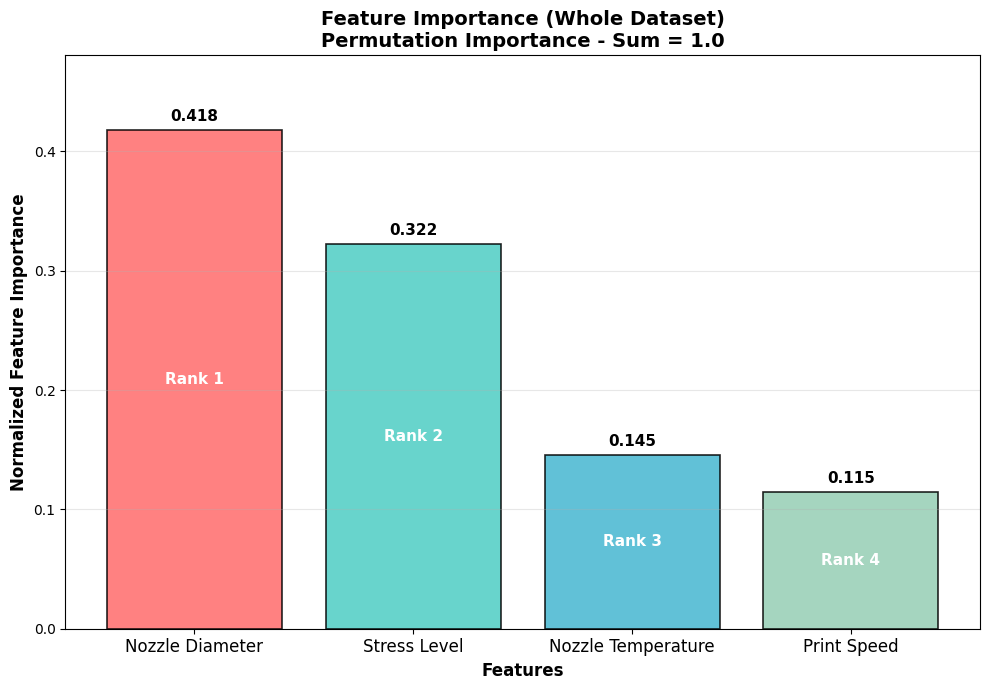

<Figure size 1200x700 with 0 Axes>

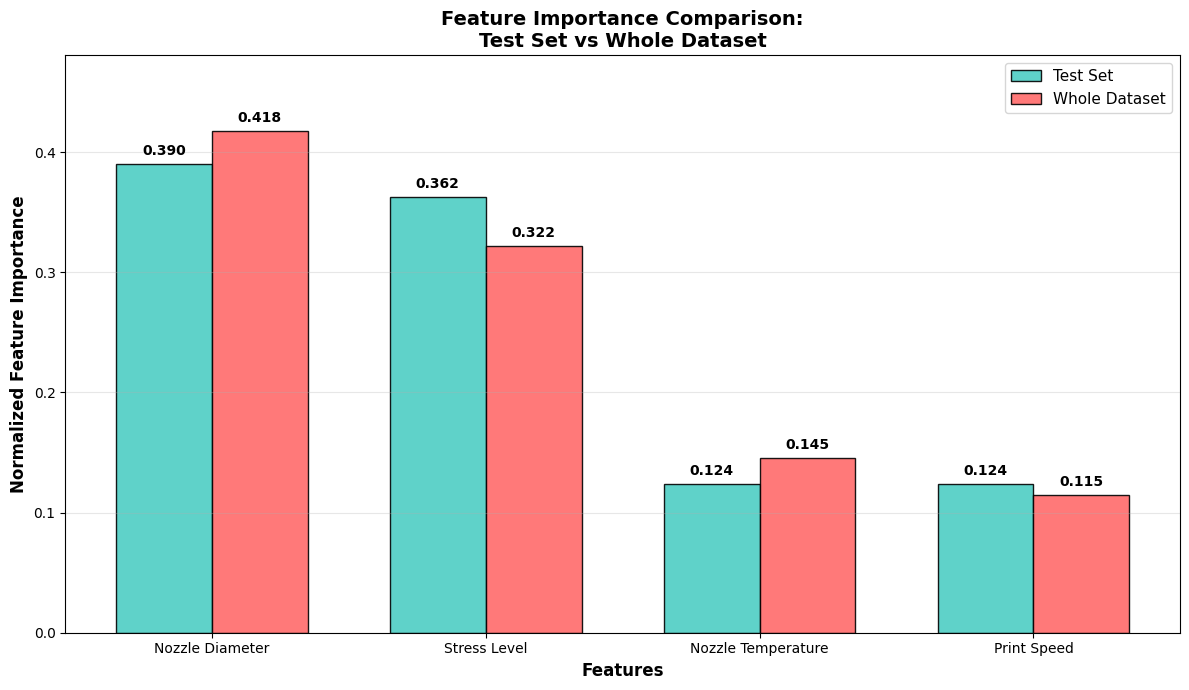

In [ ]:
print("\nFEATURE IMPORTANCE ON WHOLE DATASET")

X_full = np.vstack((X_train_scaled, X_test_scaled))
y_full = np.concatenate((y_train_scaled, y_test_scaled))

importance_df_full, perm_result_full = normalized_permutation_importance(
    dnn_model, X_full, y_full, feature_names, n_repeats=50, random_state=42
)

print("\nFEATURE IMPORTANCE (WHOLE DATASET):")
print(f"{'Feature':20} {'Importance':>10} {'Rank':>6}")
for _, row in importance_df_full.iterrows():
    print(f"{row['Feature']:20} {row['Importance']:10.3f} {row['Rank']:6.0f}")
print(f"{'TOTAL':20} {importance_df_full['Importance'].sum():10.3f}")

plt.figure(figsize=(10, 7))

importance_sorted_full = importance_df_full.sort_values('Importance', ascending=False)
colors_full = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

bars = plt.bar(range(len(importance_sorted_full)), importance_sorted_full['Importance'],
               color=colors_full, edgecolor='black', alpha=0.85, linewidth=1.2)

plt.xticks(range(len(importance_sorted_full)), importance_sorted_full['Feature'],
           fontsize=12)
plt.ylabel('Normalized Feature Importance', fontsize=12, fontweight='bold')
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Importance (Whole Dataset)\nPermutation Importance - Sum = 1.0',
          fontsize=14, fontweight='bold')
plt.ylim(0, importance_sorted_full['Importance'].max() * 1.15)
plt.grid(True, alpha=0.3, axis='y')

for i, (bar, imp) in enumerate(zip(bars, importance_sorted_full['Importance'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{imp:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

for i, row in enumerate(importance_sorted_full.itertuples()):
    plt.text(i, row.Importance / 2, f'Rank {row.Rank}', ha='center', va='center',
             color='white', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('feature_importance_whole_dataset.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 7))

comparison_df = importance_df.merge(importance_df_full, on='Feature', suffixes=('_Test', '_Whole'))
comparison_df = comparison_df.sort_values('Importance_Whole', ascending=False)

x = np.arange(len(comparison_df))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
bars1 = ax.bar(x - width/2, comparison_df['Importance_Test'], width,
               label='Test Set', color='#4ECDC4', edgecolor='black', alpha=0.9)
bars2 = ax.bar(x + width/2, comparison_df['Importance_Whole'], width,
               label='Whole Dataset', color='#FF6B6B', edgecolor='black', alpha=0.9)

ax.set_ylabel('Normalized Feature Importance', fontsize=12, fontweight='bold')
ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_title('Feature Importance Comparison:\nTest Set vs Whole Dataset',
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Feature'])
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, max(comparison_df[['Importance_Test', 'Importance_Whole']].max()) * 1.15)

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.savefig('feature_importance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()



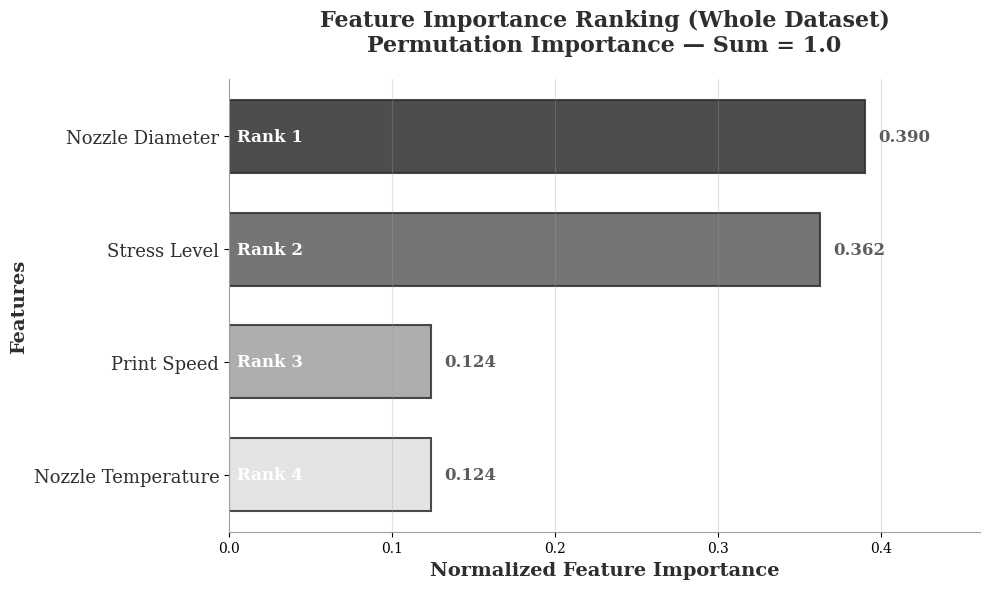

In [ ]:
charcoal = '#2E2E2E'
dark_grey = '#5D5D5D'
ash_grey = '#A0A0A0'
light_grey = '#E0E0E0'

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Liberation Serif', 'Times New Roman', 'serif']

plt.figure(figsize=(10, 6))

importance_sorted = importance_df.sort_values('Importance', ascending=False)

colors = [charcoal, dark_grey, ash_grey, light_grey]

# Horizontal bars
bars = plt.barh(range(len(importance_sorted)), importance_sorted['Importance'],
                color=colors, edgecolor=charcoal, alpha=0.85, linewidth=1.5, height=0.65)

# feature names
plt.yticks(range(len(importance_sorted)), importance_sorted['Feature'],
           fontsize=13, fontweight='medium', color=charcoal)

# labels and title
plt.xlabel('Normalized Feature Importance', fontsize=14, fontweight='bold', color=charcoal)
plt.ylabel('Features', fontsize=14, fontweight='bold', color=charcoal)
plt.title('Feature Importance Ranking (Whole Dataset)\nPermutation Importance — Sum = 1.0',
          fontsize=16, fontweight='bold', color=charcoal, pad=20)

# limits and grid
plt.xlim(0, importance_sorted['Importance'].max() * 1.18)
plt.grid(True, axis='x', alpha=0.3, color=ash_grey, linestyle='-', linewidth=0.8)

# Background and spines
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color(ash_grey)
plt.gca().spines['bottom'].set_color(ash_grey)

for i, (bar, imp) in enumerate(zip(bars, importance_sorted['Importance'])):
    plt.text(bar.get_width() + 0.008, bar.get_y() + bar.get_height()/2,
             f'{imp:.3f}',
             ha='left', va='center',
             fontsize=12, fontweight='bold', color=dark_grey)

for i, row in enumerate(importance_sorted.itertuples()):
    plt.text(0.005, i, f'Rank {row.Rank}',
             ha='left', va='center',
             fontsize=12, fontweight='bold', color='white')

plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

#final whole dataset feature importance

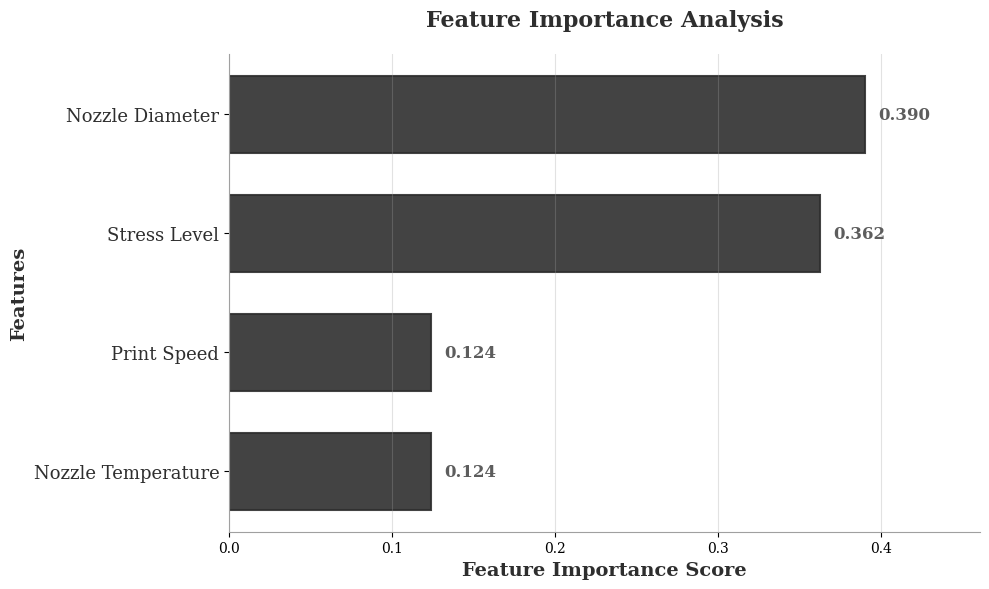

In [ ]:
charcoal = '#2E2E2E'
dark_grey = '#5D5D5D'
ash_grey = '#A0A0A0'
light_grey = '#E0E0E0'

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Liberation Serif', 'Times New Roman', 'serif']

plt.figure(figsize=(10, 6))

importance_sorted = importance_df.sort_values('Importance', ascending=False)

bar_color = charcoal

# Horizontal bars
bars = plt.barh(range(len(importance_sorted)), importance_sorted['Importance'],
                color=bar_color, edgecolor=charcoal, alpha=0.9, linewidth=1.5, height=0.65)

# feature names
plt.yticks(range(len(importance_sorted)), importance_sorted['Feature'],
           fontsize=13, fontweight='medium', color=charcoal)

# labels and title
plt.xlabel('Feature Importance Score', fontsize=14, fontweight='bold', color=charcoal)
plt.ylabel('Features', fontsize=14, fontweight='bold', color=charcoal)
plt.title('Feature Importance Analysis',
          fontsize=16, fontweight='bold', color=charcoal, pad=20)

plt.xlim(0, importance_sorted['Importance'].max() * 1.18)
plt.grid(True, axis='x', alpha=0.3, color=ash_grey, linestyle='-', linewidth=0.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color(ash_grey)
plt.gca().spines['bottom'].set_color(ash_grey)

for bar, imp in zip(bars, importance_sorted['Importance']):
    plt.text(bar.get_width() + 0.008, bar.get_y() + bar.get_height()/2,
             f'{imp:.3f}',
             ha='left', va='center',
             fontsize=12, fontweight='bold', color=dark_grey)

plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

#model full info

####Dnn model doc

In [ ]:
from docx import Document

doc = Document()
doc.add_heading(
    "Deterministic DNN Training Configuration for Full Reproducibility",
    level=1
)

doc.add_heading("1. Optimizer Configuration", level=2)

table_opt = doc.add_table(rows=1, cols=2)
table_opt.style = "Table Grid"
table_opt.rows[0].cells[0].text = "Parameter"
table_opt.rows[0].cells[1].text = "Value"

optimizer_data = [
    ("Optimizer", "Adam"),
    ("Learning rate (α)", "0.001"),
    ("Beta₁ (first moment decay)", "0.9"),
    ("Beta₂ (second moment decay)", "0.999"),
    ("Epsilon (ε)", "1e-7"),
    ("Weight decay", "None"),
    ("Gradient clipping", "Disabled"),
]

for p, v in optimizer_data:
    row = table_opt.add_row().cells
    row[0].text = p
    row[1].text = v

doc.add_heading("2. Loss Function", level=2)

table_loss = doc.add_table(rows=1, cols=2)
table_loss.style = "Table Grid"
table_loss.rows[0].cells[0].text = "Component"
table_loss.rows[0].cells[1].text = "Specification"

loss_data = [
    ("Loss function", "Mean Squared Error (MSE)"),
    ("Target space", "log10-transformed fatigue lifetime"),
    ("Target normalization", "StandardScaler (zero mean, unit variance)"),
]

for c, s in loss_data:
    row = table_loss.add_row().cells
    row[0].text = c
    row[1].text = s

doc.add_heading("3. Training Parameters", level=2)

table_train = doc.add_table(rows=1, cols=2)
table_train.style = "Table Grid"
table_train.rows[0].cells[0].text = "Parameter"
table_train.rows[0].cells[1].text = "Value"

training_data = [
    ("Batch size", "32"),
    ("Maximum number of epochs", "500"),
    ("Validation strategy", "Explicit test set (20%)"),
    ("Data shuffling", "Disabled (shuffle = False)"),
    ("Random seed", "42"),
    ("Deterministic TF operations", "Enabled"),
]

for p, v in training_data:
    row = table_train.add_row().cells
    row[0].text = p
    row[1].text = v

doc.add_heading("4. Epoch-Related Training Information", level=2)

table_epoch = doc.add_table(rows=1, cols=2)
table_epoch.style = "Table Grid"
table_epoch.rows[0].cells[0].text = "Epoch Metric"
table_epoch.rows[0].cells[1].text = "Value"

epoch_data = [
    ("Maximum epochs allowed", "500"),
    ("Total epochs trained", "336"),
    ("Best epoch (minimum val_loss)", "286"),
    ("Early stopping triggered", "Yes"),
    ("Epochs saved by early stopping", "164"),
    ("Initial training loss", "0.869068"),
    ("Final training loss", "0.007543"),
    ("Initial validation loss", "0.763946"),
    ("Final validation loss", "0.062688"),
    ("Best validation loss", "0.059087"),
]

for m, v in epoch_data:
    row = table_epoch.add_row().cells
    row[0].text = m
    row[1].text = v

doc.add_heading("5. Convergence and Stopping Criteria", level=2)

table_conv = doc.add_table(rows=1, cols=2)
table_conv.style = "Table Grid"
table_conv.rows[0].cells[0].text = "Criterion"
table_conv.rows[0].cells[1].text = "Specification"

convergence_data = [
    ("Early stopping monitor", "Validation loss (val_loss)"),
    ("Early stopping mode", "Minimize"),
    ("Early stopping patience", "50 epochs"),
    ("Restore best weights", "Enabled"),
    ("Learning rate scheduler", "ReduceLROnPlateau"),
    ("LR reduction factor", "0.5"),
    ("Scheduler patience", "20 epochs"),
    ("Minimum learning rate", "1e-7"),
]

for c, s in convergence_data:
    row = table_conv.add_row().cells
    row[0].text = c
    row[1].text = s

doc.add_heading("6. Convergence Definition", level=2)

table_def = doc.add_table(rows=1, cols=2)
table_def.style = "Table Grid"
table_def.rows[0].cells[0].text = "Definition"
table_def.rows[0].cells[1].text = "Description"

row = table_def.add_row().cells
row[0].text = "Convergence criterion"
row[1].text = (
    "Model convergence is defined as the epoch corresponding to the "
    "minimum validation loss. Training terminates early if no improvement "
    "in validation loss is observed for 50 consecutive epochs."
)

file_path = "DNN_Reproducibility_Configuration_With_Epoch_Info.docx"
doc.save(file_path)

print(f"Reproducibility document saved as: {file_path}")

Reproducibility document saved as: DNN_Reproducibility_Configuration_With_Epoch_Info.docx


In [ ]:
```python
from docx import Document

doc = Document()
doc.add_heading(
    "Deterministic DNN Training Configuration for Full Reproducibility",
    level=1
)

doc.add_heading("1. Optimizer Configuration", level=2)
doc.add_paragraph(
    "Optimizer: Adam\n"
    "Learning rate (α): 0.001\n"
    "β₁ (first moment decay): 0.9\n"
    "β₂ (second moment decay): 0.999\n"
    "Epsilon (ε): 1e-7\n"
    "Weight decay: None\n"
    "Gradient clipping: Disabled"
)

doc.add_heading("2. Loss Function", level=2)
doc.add_paragraph(
    "Loss function: Mean Squared Error (MSE)\n"
    "Target space: log10-transformed fatigue lifetime\n"
    "Target normalization: StandardScaler (zero mean, unit variance)"
)

doc.add_heading("3. Training Parameters", level=2)
doc.add_paragraph(
    "Batch size: 32\n"
    "Maximum number of epochs: 500\n"
    "Validation data: Explicit test set (20%)\n"
    "Data shuffling: Disabled (shuffle = False)\n"
    "Random seed: 42\n"
    "Deterministic TensorFlow operations: Enabled"
)

doc.add_heading("4. Convergence and Stopping Criteria", level=2)
doc.add_paragraph(
    "Early stopping monitor: Validation loss (val_loss)\n"
    "Early stopping mode: Minimize\n"
    "Early stopping patience: 50 epochs\n"
    "Restore best weights: Enabled\n\n"
    "Learning rate scheduler: ReduceLROnPlateau\n"
    "Scheduler monitor: Validation loss (val_loss)\n"
    "Reduction factor: 0.5\n"
    "Scheduler patience: 20 epochs\n"
    "Minimum learning rate: 1e-7"
)

doc.add_heading("5. Convergence Definition", level=2)
doc.add_paragraph(
    "Model convergence is defined as the epoch corresponding to the "
    "minimum validation loss. Training terminates early if no improvement "
    "in validation loss is observed for 50 consecutive epochs."
)

file_path = "DNN_Reproducibility_Configuration.docx"
doc.save(file_path)

print(f"Reproducibility document saved as: {file_path}")
```

Reproducibility document saved as: DNN_Reproducibility_Configuration.docx


In [ ]:
import pandas as pd

def df_to_markdown_table(df):
    """Convert pandas DataFrame to Markdown table string"""
    markdown = df.to_markdown(index=False)
    return markdown



# Optimizer parameters
optimizer_data = {
    'Parameter': ['Name', 'Learning Rate', 'Beta 1', 'Beta 2', 'Epsilon'],
    'Value': ['Adam', 0.001, 0.9, 0.999, '1e-7']
}
optimizer_df = pd.DataFrame(optimizer_data)

# Training parameters
training_params_data = {
    'Parameter': ['Batch Size', 'Maximum Epochs', 'Shuffle During Training'],
    'Value': [32, 500, 'False (for reproducibility)']
}
training_params_df = pd.DataFrame(training_params_data)

# Loss convergence criteria
convergence_data = {
    'Mechanism': ['Early Stopping', 'Reduce Learning Rate on Plateau'],
    'Monitor': ['val_loss', 'val_loss'],
    'Patience': [50, 20],
    'Details': [
        'restore_best_weights=True, mode=min',
        'factor=0.5, min_lr=1e-7'
    ]
}
convergence_df = pd.DataFrame(convergence_data)

# Full documentation content as Markdown string
doc_content = """# DNN Model Training Configuration for Full Reproducibility

## Model Architecture

The model is a **Deterministic Feedforward Deep Neural Network (DNN)** designed for regression prediction of log₁₀-transformed Fatigue Lifetime using 4 input features:

- **Input Shape**: (4,)
- **Layers**:
  - Hidden Layer 1: Dense, 64 units, ReLU activation
  - Hidden Layer 2: Dense, 32 units, ReLU activation
  - Hidden Layer 3: Dense, 16 units, ReLU activation
  - Output Layer: Dense, 1 unit (linear activation)

- **Total Trainable Parameters**: 3,025
- No dropout or stochastic elements → fully deterministic with fixed seeds.

## Optimizer Parameters

{optimizer_table}

## Training Parameters

{training_table}

## Loss Convergence and Early Stopping Criteria

{convergence_table}

## Additional Settings for Full Reproducibility

- All random seeds set to **42** (Python, NumPy, TensorFlow/Keras).
- Environment variables: `TF_DETERMINISTIC_OPS=1`, `TF_CUDNN_DETERMINISTIC=1`.
- TensorFlow deterministic operations enabled.
- Train-test split: 80%/20% with `random_state=42`.
- Feature and target scaling using `StandardScaler` fitted only on training data.
- Validation uses the held-out test set.

These settings guarantee identical results across runs on the same hardware and software versions.
"""

doc_content = doc_content.format(
    optimizer_table=df_to_markdown_table(optimizer_df),
    training_table=df_to_markdown_table(training_params_df),
    convergence_table=df_to_markdown_table(convergence_df)
)

with open('dnn_model_reproducibility.md', 'w') as f:
    f.write(doc_content)

print("documentation: dnn_model_reproducibility.md")



documentation: dnn_model_reproducibility.md


In [ ]:
import tensorflow as tf
import numpy as np
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error,
                            mean_absolute_percentage_error, explained_variance_score,
                            median_absolute_error, max_error)
from scipy import stats
import warnings
import json
warnings.filterwarnings('ignore')

def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.keras.utils.set_random_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    tf.config.experimental.enable_op_determinism()

set_seeds(42)




df = pd.read_csv('combined_bootstrap_fatigue.csv')

X = df[['Nozzle Diameter', 'Print Speed', 'Nozzle Temperature', 'Stress Level']].values
y = np.log10(df['Fatigue Lifetime'].values)  # Log transformation

feature_names = ['Nozzle Diameter', 'Print Speed', 'Nozzle Temperature', 'Stress Level']

print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Features: {feature_names}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Target scaling
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()



def extract_model_architecture_info(model):
    """Extract complete model architecture information"""
    arch_info = {
        'model_name': 'Deterministic_DNN',
        'model_type': 'Feedforward_Neural_Network',
        'input_shape': model.input_shape,
        'output_shape': model.output_shape,
        'total_layers': len(model.layers),
        'is_deterministic': True,
        'layers': []
    }

    for i, layer in enumerate(model.layers):
        try:
            if hasattr(layer, 'input') and layer.input is not None:
                if isinstance(layer.input, (list, tuple)):
                    input_shape = [inp.shape.as_list() for inp in layer.input] if isinstance(layer.input, list) else layer.input.shape.as_list()
                else:
                    input_shape = layer.input.shape.as_list()
            else:
                input_shape = getattr(layer, 'batch_input_shape', None)
        except:
            input_shape = None

        try:
            if hasattr(layer, 'output') and layer.output is not None:
                if isinstance(layer.output, (list, tuple)):
                    output_shape = [out.shape.as_list() for out in layer.output] if isinstance(layer.output, list) else layer.output.shape.as_list()
                else:
                    output_shape = layer.output.shape.as_list()
            else:
                output_shape = getattr(layer, 'output_shape', None)
        except:
            output_shape = None

        layer_info = {
            'layer_index': i,
            'layer_name': layer.name,
            'layer_type': type(layer).__name__,
            'input_shape': input_shape,
            'output_shape': output_shape,
            'activation': getattr(layer, 'activation', None),
            'trainable': layer.trainable,
            'units': getattr(layer, 'units', None),
            'parameters': {}
        }

        try:
            if layer.weights:
                weights = layer.get_weights()
                if len(weights) > 0:
                    layer_info['parameters']['weights_shape'] = weights[0].shape
                    layer_info['parameters']['weights_mean'] = float(np.mean(weights[0]))
                    layer_info['parameters']['weights_std'] = float(np.std(weights[0]))
                    layer_info['parameters']['weights_min'] = float(np.min(weights[0]))
                    layer_info['parameters']['weights_max'] = float(np.max(weights[0]))
                    layer_info['parameters']['weights_count'] = int(np.prod(weights[0].shape))

                if len(weights) > 1:
                    layer_info['parameters']['biases_shape'] = weights[1].shape
                    layer_info['parameters']['biases_mean'] = float(np.mean(weights[1]))
                    layer_info['parameters']['biases_std'] = float(np.std(weights[1]))
                    layer_info['parameters']['biases_min'] = float(np.min(weights[1]))
                    layer_info['parameters']['biases_max'] = float(np.max(weights[1]))
                    layer_info['parameters']['biases_count'] = int(np.prod(weights[1].shape))
        except Exception as e:
            print(f"Warning: Could not extract weights for layer {layer.name}: {e}")

        arch_info['layers'].append(layer_info)

    return arch_info

def extract_training_configuration():
    """Extract training configuration information"""
    training_config = {
        'optimizer': {
            'name': 'Adam',
            'learning_rate': 0.001,
            'beta_1': 0.9,
            'beta_2': 0.999,
            'epsilon': 1e-7
        },
        'loss_function': 'mse',
        'metrics': ['mae'],
        'training_parameters': {
            'max_epochs': 500,
            'batch_size': 32,
            'validation_split': 0.2,
            'shuffle': False,
            'random_state': 42
        },
        'callbacks': {
            'early_stopping': {
                'monitor': 'val_loss',
                'patience': 50,
                'restore_best_weights': True,
                'mode': 'min'
            },
            'reduce_lr': {
                'monitor': 'val_loss',
                'factor': 0.5,
                'patience': 20,
                'min_lr': 1e-7
            }
        }
    }
    return training_config

def extract_data_info(X_train, X_test, y_train, y_test, feature_names):
    """Extract comprehensive data information"""
    data_info = {
        'dataset': {
            'total_samples': X_train.shape[0] + X_test.shape[0],
            'features_count': X_train.shape[1],
            'feature_names': feature_names
        },
        'splits': {
            'training_samples': X_train.shape[0],
            'test_samples': X_test.shape[0],
            'train_test_ratio': f"{X_train.shape[0]}:{X_test.shape[0]}"
        },
        'features': {},
        'target': {
            'original_name': 'Fatigue Lifetime',
            'transformation': 'log10',
            'training_range': [float(y_train.min()), float(y_train.max())],
            'test_range': [float(y_test.min()), float(y_test.max())]
        }
    }

    for i, feature in enumerate(feature_names):
        data_info['features'][feature] = {
            'training_range': [float(X_train[:, i].min()), float(X_train[:, i].max())],
            'test_range': [float(X_test[:, i].min()), float(X_test[:, i].max())],
            'training_mean': float(X_train[:, i].mean()),
            'training_std': float(X_train[:, i].std())
        }

    return data_info


def create_deterministic_dnn():
    """Create DNN without dropout for deterministic results"""
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(4,), name='hidden_layer_1'),
        tf.keras.layers.Dense(32, activation='relu', name='hidden_layer_2'),
        tf.keras.layers.Dense(16, activation='relu', name='hidden_layer_3'),
        tf.keras.layers.Dense(1, name='output_layer')
    ])
    return model


dnn_model = create_deterministic_dnn()

dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)




print("COMPREHENSIVE MODEL ARCHITECTURE INFORMATION")



print("\n DNN ARCHITECTURE SUMMARY:")
print("-" * 60)
dnn_model.summary()

def get_simple_model_info(model):
    """Simplified model information extraction for Colab"""
    model_info = {
        'model_name': 'Deterministic_DNN',
        'model_type': 'Feedforward_Neural_Network',
        'input_shape': model.input_shape,
        'output_shape': model.output_shape,
        'total_layers': len(model.layers),
        'total_parameters': model.count_params(),
        'is_deterministic': True,
        'layers': []
    }

    for i, layer in enumerate(model.layers):
        layer_info = {
            'layer_index': i,
            'layer_name': layer.name,
            'layer_type': type(layer).__name__,
            'units': getattr(layer, 'units', None),
            'activation': str(getattr(layer, 'activation', None)),
            'trainable': layer.trainable,
            'parameters_count': layer.count_params(),
            'weights_shape': None,
            'biases_shape': None
        }

        try:
            weights = layer.get_weights()
            if len(weights) > 0:
                layer_info['weights_shape'] = weights[0].shape
                layer_info['weights_count'] = int(np.prod(weights[0].shape))
            if len(weights) > 1:
                layer_info['biases_shape'] = weights[1].shape
                layer_info['biases_count'] = int(np.prod(weights[1].shape))
        except:
            pass

        model_info['layers'].append(layer_info)

    return model_info

model_arch_info = get_simple_model_info(dnn_model)
training_config = extract_training_configuration()
data_info = extract_data_info(X_train, X_test, y_train, y_test, feature_names)

print("\n DETAILED LAYER INFORMATION:")

total_params = 0
total_weights = 0
total_biases = 0

for layer_info in model_arch_info['layers']:
    print(f"\nLayer {layer_info['layer_index']}: {layer_info['layer_name']}")
    print(f"  Type: {layer_info['layer_type']}")
    print(f"  Units: {layer_info['units']}")
    print(f"  Activation: {layer_info['activation']}")
    print(f"  Trainable: {layer_info['trainable']}")
    print(f"  Total Parameters: {layer_info['parameters_count']:,}")

    if layer_info['weights_shape'] is not None:
        weights_shape = layer_info['weights_shape']
        weights_count = layer_info.get('weights_count', 0)
        total_weights += weights_count
        total_params += weights_count
        print(f"  Weights: {weights_shape} = {weights_count:,} parameters")

    if layer_info['biases_shape'] is not None:
        biases_shape = layer_info['biases_shape']
        biases_count = layer_info.get('biases_count', 0)
        total_biases += biases_count
        total_params += biases_count
        print(f"  Biases: {biases_shape} = {biases_count:,} parameters")

print(f"\n TOTAL PARAMETER COUNT:")
print(f"  Total Weights: {total_weights:,}")
print(f"  Total Biases: {total_biases:,}")
print(f"  Total Trainable Parameters: {total_params:,}")
print(f"  Model Count Params: {model_arch_info['total_parameters']:,}")

# Print training configuration
print("\n TRAINING CONFIGURATION:")
print(f"Optimizer: {training_config['optimizer']['name']}")
print(f"Learning Rate: {training_config['optimizer']['learning_rate']}")
print(f"Loss Function: {training_config['loss_function']}")
print(f"Metrics: {training_config['metrics']}")
print(f"Max Epochs: {training_config['training_parameters']['max_epochs']}")
print(f"Batch Size: {training_config['training_parameters']['batch_size']}")
print(f"Early Stopping Patience: {training_config['callbacks']['early_stopping']['patience']}")
print(f"Reduce LR Patience: {training_config['callbacks']['reduce_lr']['patience']}")


print("MODEL TRAINING WITH DETAILED MONITORING")

print("\nTraining DNN Model...")

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=50,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=20,
        min_lr=1e-7,
        verbose=1
    )
]

class TrainingMonitor(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 50 == 0:
            print(f"Epoch {epoch:3d} - Loss: {logs['loss']:.6f} - Val Loss: {logs['val_loss']:.6f}")

history = dnn_model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=500,
    batch_size=32,
    callbacks=callbacks + [TrainingMonitor()],
    verbose=0,  # We use our custom monitor
    shuffle=False
)

final_epoch = len(history.history['loss'])
best_epoch = np.argmin(history.history['val_loss']) + 1
best_val_loss = min(history.history['val_loss'])


print(f"  Final Epoch: {final_epoch}")
print(f"  Final Training Loss: {history.history['loss'][-1]:.6f}")
print(f"  Final Validation Loss: {history.history['val_loss'][-1]:.6f}")
print(f"  Best Validation Loss: {best_val_loss:.6f}")
print(f"  Best Epoch: {best_epoch}")




print("DETAILED WEIGHTS AND BIASES ANALYSIS AFTER TRAINING:")


def analyze_layer_parameters_after_training(model):
    """Comprehensive analysis of all layer parameters after training"""
    param_analysis = {}

    for i, layer in enumerate(model.layers):
        if layer.weights:
            try:
                weights = layer.get_weights()
                layer_name = layer.name

                param_analysis[layer_name] = {
                    'layer_type': type(layer).__name__,
                    'total_parameters': int(layer.count_params()),
                    'units': getattr(layer, 'units', None)
                }

                if len(weights) > 0:
                    w = weights[0]
                    param_analysis[layer_name]['weights'] = {
                        'shape': w.shape,
                        'total_elements': int(np.prod(w.shape)),
                        'mean': float(np.mean(w)),
                        'std': float(np.std(w)),
                        'min': float(np.min(w)),
                        'max': float(np.max(w)),
                        'q25': float(np.percentile(w, 25)),
                        'q50': float(np.percentile(w, 50)),
                        'q75': float(np.percentile(w, 75))
                    }

                if len(weights) > 1:
                    b = weights[1]
                    param_analysis[layer_name]['biases'] = {
                        'shape': b.shape,
                        'total_elements': int(np.prod(b.shape)),
                        'mean': float(np.mean(b)),
                        'std': float(np.std(b)),
                        'min': float(np.min(b)),
                        'max': float(np.max(b)),
                        'q25': float(np.percentile(b, 25)),
                        'q50': float(np.percentile(b, 50)),
                        'q75': float(np.percentile(b, 75))
                    }
            except Exception as e:
                print(f"Warning: Could not analyze parameters for layer {layer.name}: {e}")

    return param_analysis

param_analysis = analyze_layer_parameters_after_training(dnn_model)

print("\n DETAILED PARAMETER ANALYSIS BY LAYER:")

for layer_name, analysis in param_analysis.items():
    print(f"\n LAYER: {layer_name} ({analysis['layer_type']})")
    print(f"   Units: {analysis['units']}")
    print(f"   Total Parameters: {analysis['total_parameters']:,}")

    if 'weights' in analysis:
        w = analysis['weights']
        print(f"    WEIGHTS:")
        print(f"      Shape: {w['shape']}")
        print(f"      Elements: {w['total_elements']:,}")
        print(f"      Statistics: mean={w['mean']:.6f}, std={w['std']:.6f}")
        print(f"      Range: [{w['min']:.6f}, {w['max']:.6f}]")
        print(f"      Quartiles: Q1={w['q25']:.6f}, Q2={w['q50']:.6f}, Q3={w['q75']:.6f}")

    if 'biases' in analysis:
        b = analysis['biases']
        print(f"    BIASES:")
        print(f"      Shape: {b['shape']}")
        print(f"      Elements: {b['total_elements']:,}")
        print(f"      Statistics: mean={b['mean']:.6f}, std={b['std']:.6f}")
        print(f"      Range: [{b['min']:.6f}, {b['max']:.6f}]")
        print(f"      Quartiles: Q1={b['q25']:.6f}, Q2={b['q50']:.6f}, Q3={b['q75']:.6f}")



print("TRAINING HISTORY ANALYSIS:")

training_history = {
    'final_epoch': final_epoch,
    'total_epochs_trained': final_epoch,
    'max_epochs_allowed': 500,
    'early_stopping_triggered': final_epoch < 500,
    'epochs_saved': 500 - final_epoch if final_epoch < 500 else 0,
    'loss_progression': {
        'initial_training_loss': history.history['loss'][0],
        'final_training_loss': history.history['loss'][-1],
        'initial_val_loss': history.history['val_loss'][0],
        'final_val_loss': history.history['val_loss'][-1],
        'best_val_loss': best_val_loss,
        'best_epoch': best_epoch
    },
    'convergence_metrics': {
        'training_loss_reduction': history.history['loss'][0] - history.history['loss'][-1],
        'val_loss_reduction': history.history['val_loss'][0] - history.history['val_loss'][-1],
        'final_loss_ratio': history.history['loss'][-1] / history.history['val_loss'][-1],
        'training_loss_improvement': (history.history['loss'][0] - history.history['loss'][-1]) / history.history['loss'][0] * 100,
        'val_loss_improvement': (history.history['val_loss'][0] - history.history['val_loss'][-1]) / history.history['val_loss'][0] * 100
    }
}

print("\n TRAINING HISTORY SUMMARY:")

print(f"Total Epochs Trained: {training_history['total_epochs_trained']}")
print(f"Maximum Epochs Allowed: {training_history['max_epochs_allowed']}")
print(f"Early Stopping Triggered: {training_history['early_stopping_triggered']}")
print(f"Epochs Saved by Early Stopping: {training_history['epochs_saved']}")

print(f"\n LOSS PROGRESSION:")
print(f"Initial Training Loss: {training_history['loss_progression']['initial_training_loss']:.6f}")
print(f"Final Training Loss: {training_history['loss_progression']['final_training_loss']:.6f}")
print(f"Initial Validation Loss: {training_history['loss_progression']['initial_val_loss']:.6f}")
print(f"Final Validation Loss: {training_history['loss_progression']['final_val_loss']:.6f}")
print(f"Best Validation Loss: {training_history['loss_progression']['best_val_loss']:.6f}")
print(f"Best Epoch: {training_history['loss_progression']['best_epoch']}")

print(f"\n CONVERGENCE METRICS:")
print(f"Training Loss Reduction: {training_history['convergence_metrics']['training_loss_reduction']:.6f}")
print(f"Validation Loss Reduction: {training_history['convergence_metrics']['val_loss_reduction']:.6f}")
print(f"Training Loss Improvement: {training_history['convergence_metrics']['training_loss_improvement']:.2f}%")
print(f"Validation Loss Improvement: {training_history['convergence_metrics']['val_loss_improvement']:.2f}%")
print(f"Final Train/Val Loss Ratio: {training_history['convergence_metrics']['final_loss_ratio']:.3f}")



print("COMPREHENSIVE PERFORMANCE METRICS:")


# Predictions
y_pred_log_scaled = dnn_model.predict(X_test_scaled, verbose=0).flatten()
y_pred_log = scaler_y.inverse_transform(y_pred_log_scaled.reshape(-1, 1)).flatten()

# Calculate residuals
residuals_log = y_test - y_pred_log

# COMPREHENSIVE METRICS DICTIONARY
metrics_log = {
    'R² Score': r2_score(y_test, y_pred_log),
    'Explained Variance Score': explained_variance_score(y_test, y_pred_log),
    'Mean Squared Error (MSE)': mean_squared_error(y_test, y_pred_log),
    'Root Mean Squared Error (RMSE)': np.sqrt(mean_squared_error(y_test, y_pred_log)),
    'Mean Absolute Error (MAE)': mean_absolute_error(y_test, y_pred_log),
    'Median Absolute Error': median_absolute_error(y_test, y_pred_log),
    'Mean Absolute Percentage Error (MAPE)': mean_absolute_percentage_error(y_test, y_pred_log) * 100,
    'Max Error': max_error(y_test, y_pred_log),
    'Mean Bias Error': np.mean(y_pred_log - y_test),
    'Relative Absolute Error': np.sum(np.abs(y_test - y_pred_log)) / np.sum(np.abs(y_test - np.mean(y_test))),
    'Relative Squared Error': np.sum((y_test - y_pred_log) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
}

metrics_log.update({
    'Residual Mean': np.mean(residuals_log),
    'Residual Std': np.std(residuals_log),
    'Residual Skewness': stats.skew(residuals_log),
    'Residual Kurtosis': stats.kurtosis(residuals_log),
    'Residual RMSE': np.sqrt(np.mean(residuals_log ** 2)),
    'Residual MAE': np.mean(np.abs(residuals_log))
})

print("\n COMPREHENSIVE MODEL METRICS (LOG10 SPACE):")
for metric, value in metrics_log.items():
    if 'R²' in metric or 'Score' in metric:
        print(f"{metric:35}: {value:>15.6f}")
    elif 'Percentage' in metric:
        print(f"{metric:35}: {value:>15.4f}%")
    else:
        print(f"{metric:35}: {value:>15.6f}")


print("SAVING COMPREHENSIVE MODEL INFORMATION:")

comprehensive_results = {
    'model_architecture': model_arch_info,
    'training_configuration': training_config,
    'data_information': data_info,
    'parameter_analysis': param_analysis,
    'training_history': training_history,
    'performance_metrics': metrics_log,
    'random_seed_settings': {
        'python_hash_seed': 42,
        'python_random_seed': 42,
        'numpy_seed': 42,
        'tensorflow_seed': 42,
        'keras_seed': 42,
        'deterministic_ops': True
    }
}

with open('comprehensive_dnn_analysis.json', 'w') as f:
    json.dump(comprehensive_results, f, indent=2, default=str)

with open('dnn_model_summary.txt', 'w') as f:
    f.write("COMPREHENSIVE DNN MODEL ANALYSIS REPORT\n")


    f.write("MODEL ARCHITECTURE:\n")
    for layer_info in model_arch_info['layers']:
        f.write(f"Layer {layer_info['layer_index']}: {layer_info['layer_name']}\n")
        f.write(f"  Type: {layer_info['layer_type']}\n")
        f.write(f"  Units: {layer_info['units']}\n")
        f.write(f"  Activation: {layer_info['activation']}\n")
        f.write(f"  Parameters: {layer_info['parameters_count']:,}\n")
        if layer_info['weights_shape'] is not None:
            f.write(f"  Weights: {layer_info['weights_shape']}\n")
        if layer_info['biases_shape'] is not None:
            f.write(f"  Biases: {layer_info['biases_shape']}\n")
        f.write("\n")

    f.write(f"TOTAL PARAMETERS: {total_params:,}\n\n")

    f.write("TRAINING CONFIGURATION:\n")
    f.write(f"Optimizer: {training_config['optimizer']['name']}\n")
    f.write(f"Learning Rate: {training_config['optimizer']['learning_rate']}\n")
    f.write(f"Max Epochs: {training_config['training_parameters']['max_epochs']}\n")
    f.write(f"Batch Size: {training_config['training_parameters']['batch_size']}\n\n")

    f.write("TRAINING RESULTS:\n")
    f.write(f"Epochs Trained: {training_history['total_epochs_trained']}\n")
    f.write(f"Best Validation Loss: {training_history['loss_progression']['best_val_loss']:.6f}\n")
    f.write(f"Best Epoch: {training_history['loss_progression']['best_epoch']}\n")
    f.write(f"Early Stopping Triggered: {training_history['early_stopping_triggered']}\n\n")

    f.write("PERFORMANCE METRICS:\n")
    for metric, value in metrics_log.items():
        if 'Percentage' in metric:
            f.write(f"{metric}: {value:.4f}%\n")
        else:
            f.write(f"{metric}: {value:.6f}\n")

print("CREATING DOCUMENTATION FILE WITH TABLES")

optimizer_data = {
    'Parameter': ['name', 'learning_rate', 'beta_1', 'beta_2', 'epsilon'],
    'Value': ['Adam', 0.001, 0.9, 0.999, 1e-7]
}
optimizer_df = pd.DataFrame(optimizer_data)

training_params_data = {
    'Parameter': ['batch_size', 'max_epochs'],
    'Value': [32, 500]
}
training_params_df = pd.DataFrame(training_params_data)

convergence_data = {
    'Callback': ['Early Stopping', 'Reduce LR on Plateau'],
    'Monitor': ['val_loss', 'val_loss'],
    'Patience': [50, 20],
    'Additional Details': ['restore_best_weights=True, mode=min', 'factor=0.5, min_lr=1e-7']
}
convergence_df = pd.DataFrame(convergence_data)

with open('dnn_training_config.md', 'w') as f:
    f.write('# DNN Training Configuration for Full Reproducibility\n\n')

    f.write('## Optimizer Parameters\n')
    f.write(optimizer_df.to_markdown(index=False) + '\n\n')

    f.write('## Training Parameters\n')
    f.write(training_params_df.to_markdown(index=False) + '\n\n')

    f.write('## Loss Convergence Criteria\n')
    f.write(convergence_df.to_markdown(index=False) + '\n')


print("FINAL COMPREHENSIVE SUMMARY:")


print(f"\n  MODEL ARCHITECTURE:")
print(f"  Name: {model_arch_info['model_name']}")
print(f"  Type: {model_arch_info['model_type']}")
print(f"  Total Layers: {model_arch_info['total_layers']}")
print(f"  Total Parameters: {total_params:,}")

print(f"\n  TRAINING DETAILS:")
print(f"  Epochs Trained: {training_history['total_epochs_trained']}/{training_history['max_epochs_allowed']}")
print(f"  Early Stopping: {'Yes' if training_history['early_stopping_triggered'] else 'No'}")
print(f"  Best Epoch: {training_history['loss_progression']['best_epoch']}")
print(f"  Best Validation Loss: {training_history['loss_progression']['best_val_loss']:.6f}")

print(f"\n PERFORMANCE SUMMARY:")
print(f"  R² Score: {metrics_log['R² Score']:.6f}")
print(f"  RMSE: {metrics_log['Root Mean Squared Error (RMSE)']:.6f}")
print(f"  MAE: {metrics_log['Mean Absolute Error (MAE)']:.6f}")

print(f"\n LAYER BREAKDOWN:")
for layer_info in model_arch_info['layers']:
    param_count = layer_info['parameters_count']
    print(f"  {layer_info['layer_name']:15}: {param_count:6,} parameters")



Dataset: 278 samples, 4 features
Features: ['Nozzle Diameter', 'Print Speed', 'Nozzle Temperature', 'Stress Level']
COMPREHENSIVE MODEL ARCHITECTURE INFORMATION

 DNN ARCHITECTURE SUMMARY:
------------------------------------------------------------


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)


 DETAILED LAYER INFORMATION:

Layer 0: hidden_layer_1
  Type: Dense
  Units: 64
  Activation: <function relu at 0x798651a33100>
  Trainable: True
  Total Parameters: 320
  Weights: (4, 64) = 256 parameters
  Biases: (64,) = 64 parameters

Layer 1: hidden_layer_2
  Type: Dense
  Units: 32
  Activation: <function relu at 0x798651a33100>
  Trainable: True
  Total Parameters: 2,080
  Weights: (64, 32) = 2,048 parameters
  Biases: (32,) = 32 parameters

Layer 2: hidden_layer_3
  Type: Dense
  Units: 16
  Activation: <function relu at 0x798651a33100>
  Trainable: True
  Total Parameters: 528
  Weights: (32, 16) = 512 parameters
  Biases: (16,) = 16 parameters

Layer 3: output_layer
  Type: Dense
  Units: 1
  Activation: <function linear at 0x7986504fa200>
  Trainable: True
  Total Parameters: 17
  Weights: (16, 1) = 16 parameters
  Biases: (1,) = 1 parameters

 TOTAL PARAMETER COUNT:
  Total Weights: 2,832
  Total Biases: 113
  Total Trainable Parameters: 2,945
  Model Count Params: 2,945



In [ ]:
from docx import Document
from docx.shared import Pt

doc = Document()
doc.add_heading('Deterministic DNN Model – Complete Technical Report', level=1)

def add_kv_table(title, data):
    doc.add_heading(title, level=2)
    table = doc.add_table(rows=1, cols=2)
    table.style = 'Table Grid'
    hdr = table.rows[0].cells
    hdr[0].text = "Parameter"
    hdr[1].text = "Value"

    for k, v in data.items():
        row = table.add_row().cells
        row[0].text = str(k)
        row[1].text = str(v)

determinism_info = {
    "PYTHONHASHSEED": 42,
    "NumPy Random Seed": 42,
    "Python Random Seed": 42,
    "TensorFlow Random Seed": 42,
    "TF_DETERMINISTIC_OPS": "Enabled",
    "TF_CUDNN_DETERMINISTIC": "Enabled"
}
add_kv_table("1. Determinism & Random Seed Configuration", determinism_info)

dataset_info = {
    "Total Samples": X.shape[0],
    "Number of Features": X.shape[1],
    "Feature Names": feature_names,
    "Training Samples": X_train.shape[0],
    "Testing Samples": X_test.shape[0],
    "Train/Test Split Ratio": "80% / 20%",
    "Target Variable": "Fatigue Lifetime",
    "Target Transformation": "log10(Fatigue Lifetime)",
    "Feature Scaling Method": "StandardScaler",
    "Target Scaling Method": "StandardScaler"
}
add_kv_table("2. Dataset Description", dataset_info)

doc.add_heading("3. Neural Network Architecture", level=2)

arch_table = doc.add_table(rows=1, cols=5)
arch_table.style = 'Table Grid'
hdr = arch_table.rows[0].cells
hdr[0].text = "Layer Index"
hdr[1].text = "Layer Name"
hdr[2].text = "Layer Type"
hdr[3].text = "Units"
hdr[4].text = "Activation"

for i, layer in enumerate(dnn_model.layers):
    row = arch_table.add_row().cells
    row[0].text = str(i)
    row[1].text = layer.name
    row[2].text = layer.__class__.__name__
    row[3].text = str(layer.units if hasattr(layer, "units") else "-")
    row[4].text = layer.activation.__name__ if hasattr(layer, "activation") else "-"

training_config = {
    "Optimizer": "Adam",
    "Initial Learning Rate": 0.001,
    "Loss Function": "Mean Squared Error (MSE)",
    "Batch Size": 32,
    "Epochs Requested": 500,
    "Epochs Actually Used": len(history.history['loss']),
    "Shuffle During Training": False,
    "EarlyStopping Monitor": "val_loss",
    "EarlyStopping Patience": 50,
    "Restore Best Weights": True,
    "ReduceLROnPlateau Factor": 0.5,
    "ReduceLROnPlateau Patience": 20,
    "Minimum Learning Rate": "1e-7"
}
add_kv_table("4. Training Configuration", training_config)

add_kv_table("5. Performance Metrics (Log₁₀ Space)", metrics_log)

doc.add_heading("6. Feature Importance Ranking", level=2)

fi_table = doc.add_table(rows=1, cols=3)
fi_table.style = 'Table Grid'
hdr = fi_table.rows[0].cells
hdr[0].text = "Rank"
hdr[1].text = "Feature"
hdr[2].text = "Normalized Importance"

for _, row in importance_df.iterrows():
    r = fi_table.add_row().cells
    r[0].text = str(row["Rank"])
    r[1].text = row["Feature"]
    r[2].text = f"{row['Importance']:.4f}"

file_name = "DNN_Complete_Model_Report.docx"
doc.save(file_name)

print(f" DOC FILE GENERATED SUCCESSFULLY: {file_name}")

✅ DOC FILE GENERATED SUCCESSFULLY: DNN_Complete_Model_Report.docx


In [ ]:
import os
import numpy as np
from docx import Document

doc = Document()
doc.add_heading("Deterministic DNN – Full Reproducibility Report", level=1)

def add_kv_table(title, data):
    doc.add_heading(title, level=2)
    table = doc.add_table(rows=1, cols=2)
    table.style = "Table Grid"
    table.rows[0].cells[0].text = "Parameter"
    table.rows[0].cells[1].text = "Value"
    for k, v in data.items():
        r = table.add_row().cells
        r[0].text = str(k)
        r[1].text = str(v)

add_kv_table(
    "1. Determinism & Reproducibility Settings",
    {
        "PYTHONHASHSEED": os.environ.get("PYTHONHASHSEED"),
        "NumPy Random Seed": 42,
        "Python Random Seed": 42,
        "TensorFlow Random Seed": 42,
        "TF_DETERMINISTIC_OPS": os.environ.get("TF_DETERMINISTIC_OPS"),
        "TF_CUDNN_DETERMINISTIC": os.environ.get("TF_CUDNN_DETERMINISTIC"),
        "Training Shuffle": False
    }
)

add_kv_table(
    "2. Dataset & Preprocessing",
    {
        "Dataset File": "combined_bootstrap_fatigue.csv",
        "Total Samples": X.shape[0],
        "Training Samples": X_train.shape[0],
        "Testing Samples": X_test.shape[0],
        "Number of Features": X.shape[1],
        "Feature Names": feature_names,
        "Target Variable": "Fatigue Lifetime",
        "Target Transformation": "log10(Fatigue Lifetime)",
        "Feature Scaling": "StandardScaler (fit on training data)",
        "Target Scaling": "StandardScaler (fit on training data)",
        "Train/Test Split": "80% / 20%",
        "Split Random State": 42
    }
)

doc.add_heading("3. Neural Network Architecture", level=2)

arch = doc.add_table(rows=1, cols=6)
arch.style = "Table Grid"

hdr = arch.rows[0].cells
hdr[0].text = "Layer Index"
hdr[1].text = "Layer Name"
hdr[2].text = "Layer Type"
hdr[3].text = "Units"
hdr[4].text = "Activation"
hdr[5].text = "Trainable Parameters"

for i, layer in enumerate(dnn_model.layers):
    r = arch.add_row().cells
    r[0].text = str(i)
    r[1].text = layer.name
    r[2].text = layer.__class__.__name__
    r[3].text = str(layer.units if hasattr(layer, "units") else "-")
    r[4].text = layer.activation.__name__ if hasattr(layer, "activation") else "-"
    r[5].text = str(layer.count_params())

opt_cfg = dnn_model.optimizer.get_config()

add_kv_table(
    "4. Optimizer Configuration",
    {
        "Optimizer": dnn_model.optimizer.__class__.__name__,
        "Learning Rate (initial)": opt_cfg.get("learning_rate"),
        "Beta 1": opt_cfg.get("beta_1"),
        "Beta 2": opt_cfg.get("beta_2"),
        "Epsilon": opt_cfg.get("epsilon"),
        "AMSGrad": opt_cfg.get("amsgrad"),
        "Weight Decay": opt_cfg.get("weight_decay", "Not Used")
    }
)

add_kv_table(
    "5. Training Hyperparameters",
    {
        "Loss Function": "Mean Squared Error (MSE)",
        "Training Metric": "Mean Absolute Error (MAE)",
        "Batch Size": 32,
        "Epochs Requested": 500,
        "Epochs Actually Used": len(history.history["loss"]),
        "Validation Strategy": "Hold-out test set",
        "Training Mode": "Fully Deterministic (no dropout, no shuffle)"
    }
)

best_val_loss = min(history.history["val_loss"])
best_epoch = int(np.argmin(history.history["val_loss"]) + 1)

add_kv_table(
    "6. Loss Convergence & Stopping Criteria",
    {
        "EarlyStopping Monitor": "val_loss",
        "EarlyStopping Patience": 50,
        "Restore Best Weights": True,
        "ReduceLROnPlateau Monitor": "val_loss",
        "ReduceLROnPlateau Factor": 0.5,
        "ReduceLROnPlateau Patience": 20,
        "Minimum Learning Rate": "1e-7",
        "Best Validation Loss (MSE)": best_val_loss,
        "Epoch of Best Model": best_epoch
    }
)

add_kv_table(
    "7. Final Performance Metrics (Log₁₀ Space)",
    metrics_log
)

doc.add_heading("8. Feature Importance (Normalized Permutation)", level=2)

fi = doc.add_table(rows=1, cols=4)
fi.style = "Table Grid"

hdr = fi.rows[0].cells
hdr[0].text = "Rank"
hdr[1].text = "Feature"
hdr[2].text = "Normalized Importance"
hdr[3].text = "Raw Importance"

for _, row in importance_df.iterrows():
    r = fi.add_row().cells
    r[0].text = str(row["Rank"])
    r[1].text = row["Feature"]
    r[2].text = f"{row['Importance']:.6f}"
    r[3].text = f"{row['Raw_Importance']:.6f}"

output_file = "DNN_Full_Reproducibility_Report.docx"
doc.save(output_file)

print(f" DOCUMENT CREATED SUCCESSFULLY: {output_file}")

✅ DOCUMENT CREATED SUCCESSFULLY: DNN_Full_Reproducibility_Report.docx


# New Section

Times New Roman not found. Using DejaVu Serif Display instead.
DATASET OVERVIEW 
Dataset Shape: (278, 6)

First few rows:
   Nozzle Diameter  Print Speed  Nozzle Temperature  Stress Level  \
0              0.2            5                 180           5.0   
1              0.2            5                 180           7.5   
2              0.2            5                 180          10.0   
3              0.2            5                 210           2.5   
4              0.2            5                 210           5.0   

   Fatigue Lifetime Data_Source  
0            942000    Original  
1            597800    Original  
2            148900    Original  
3           1500000    Original  
4           1500000    Original  

Data Source distribution:
Data_Source
Original               139
Bootstrap_Synthetic    139
Name: count, dtype: int64

BASIC DATA EXPLORATION 
Basic Statistics:
       Nozzle Diameter  Print Speed  Nozzle Temperature  Stress Level  \
count       278.000000  

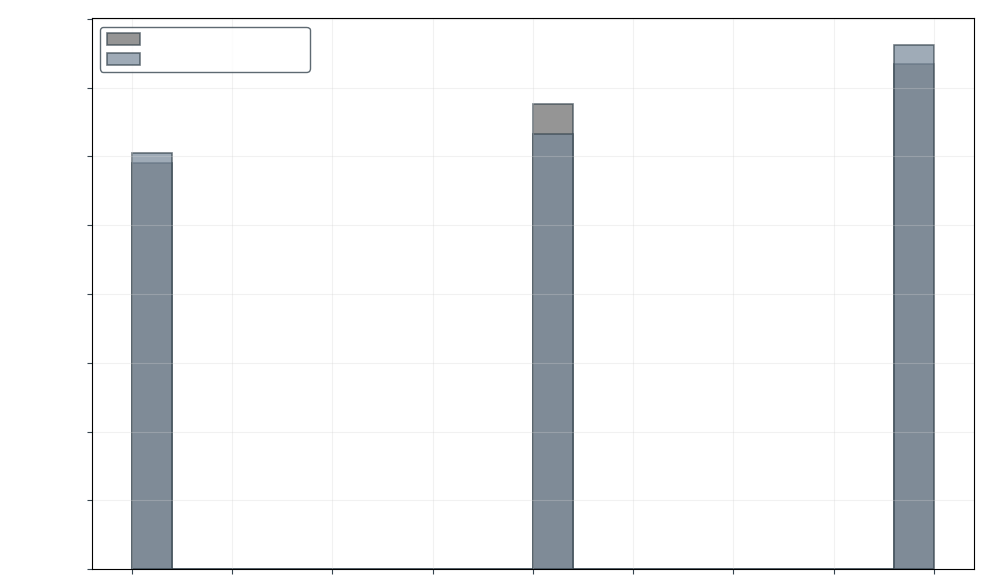

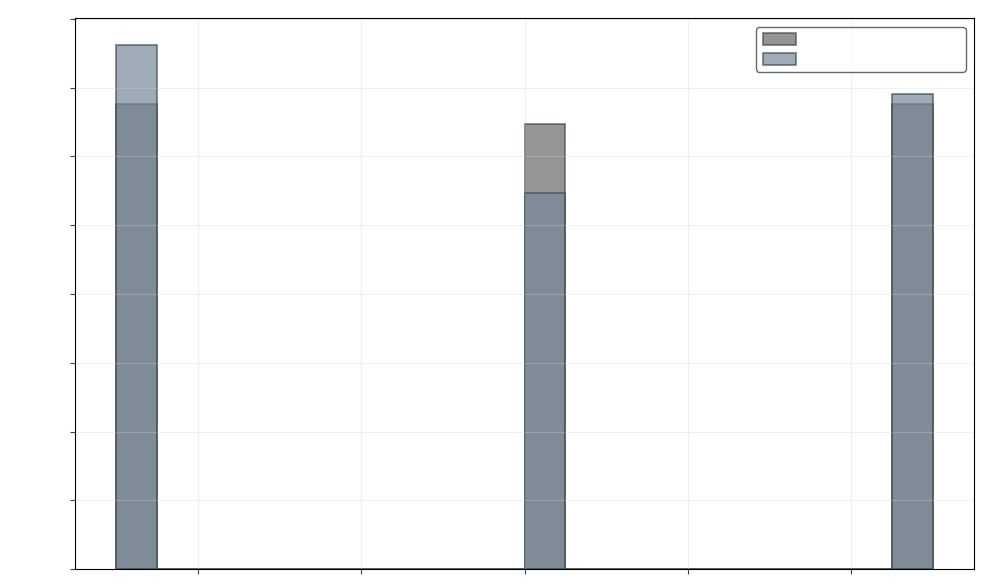

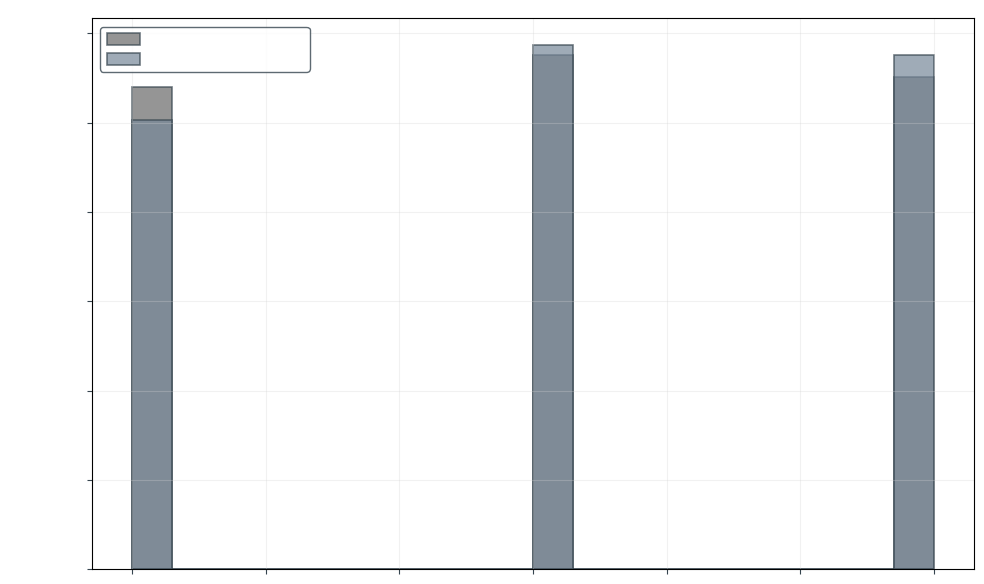

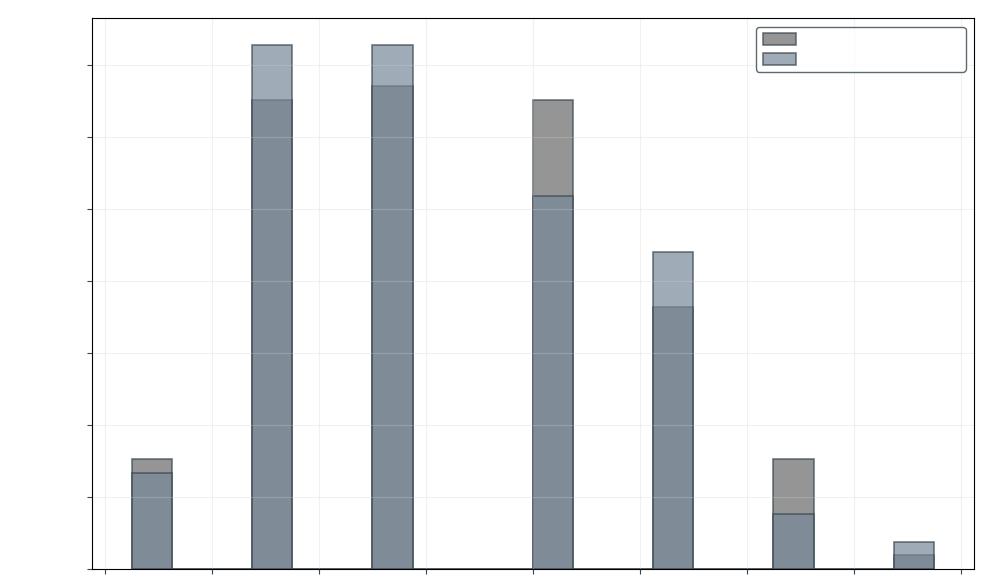

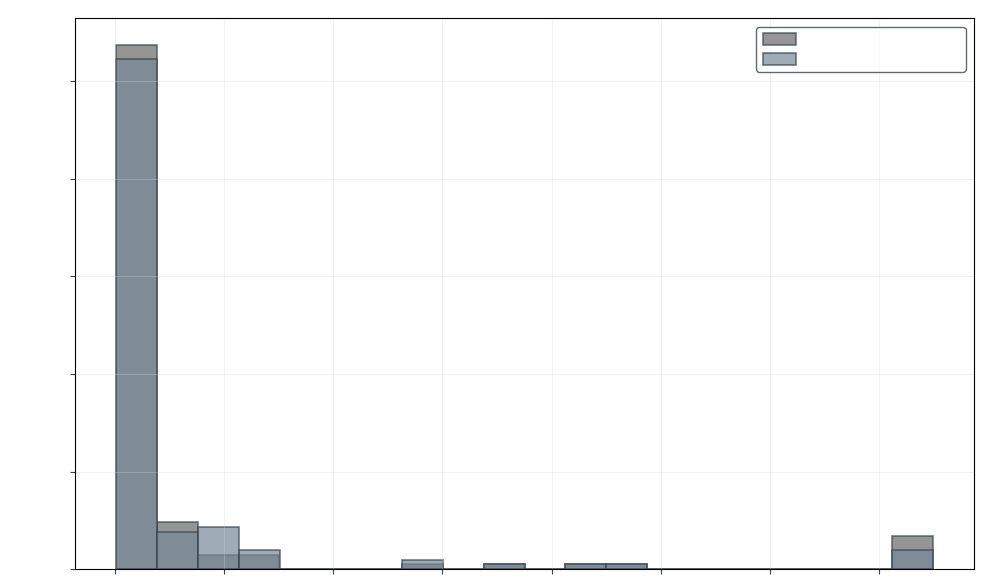


STATISTICAL TESTS FOR DISTRIBUTION SIMILARITY 

Nozzle Diameter:
  KS Test - Statistic: 0.0144, p-value: 1.0000
  T-test - Statistic: -0.0732, p-value: 0.9417
  Mann-Whitney U - Statistic: 9606.5000, p-value: 0.9324
  Original Mean: 0.41 ± 0.16
  Synthetic Mean: 0.42 ± 0.17

Print Speed:
  KS Test - Statistic: 0.0432, p-value: 0.9995
  T-test - Statistic: 0.3569, p-value: 0.7214
  Mann-Whitney U - Statistic: 9890.5000, p-value: 0.7162
  Original Mean: 10.00 ± 4.13
  Synthetic Mean: 9.82 ± 4.27

Nozzle Temperature:
  KS Test - Statistic: 0.0216, p-value: 1.0000
  T-test - Statistic: -0.3706, p-value: 0.7112
  Mann-Whitney U - Statistic: 9427.0000, p-value: 0.7122
  Original Mean: 210.22 ± 24.36
  Synthetic Mean: 211.29 ± 24.19

Stress Level:
  KS Test - Statistic: 0.0432, p-value: 0.9995
  T-test - Statistic: 0.4064, p-value: 0.6848
  Mann-Whitney U - Statistic: 9959.5000, p-value: 0.6478
  Original Mean: 8.40 ± 3.34
  Synthetic Mean: 8.24 ± 3.30

Fatigue Lifetime:
  KS Test - Statisti

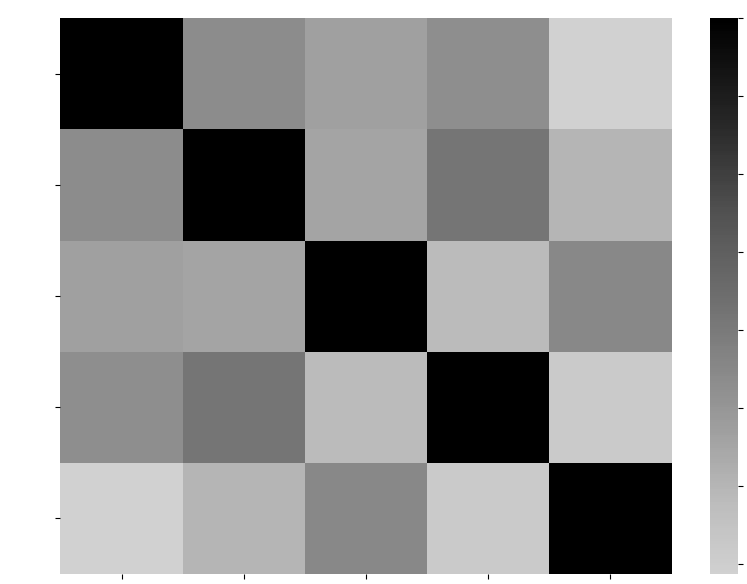

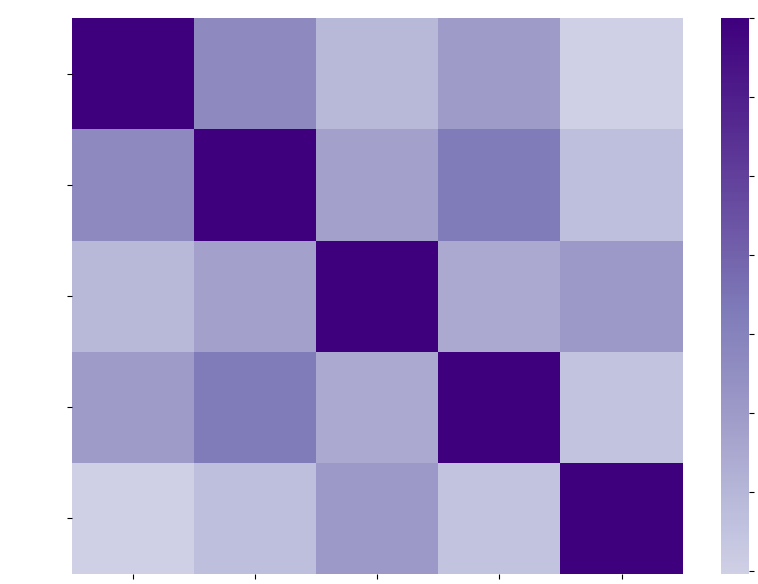

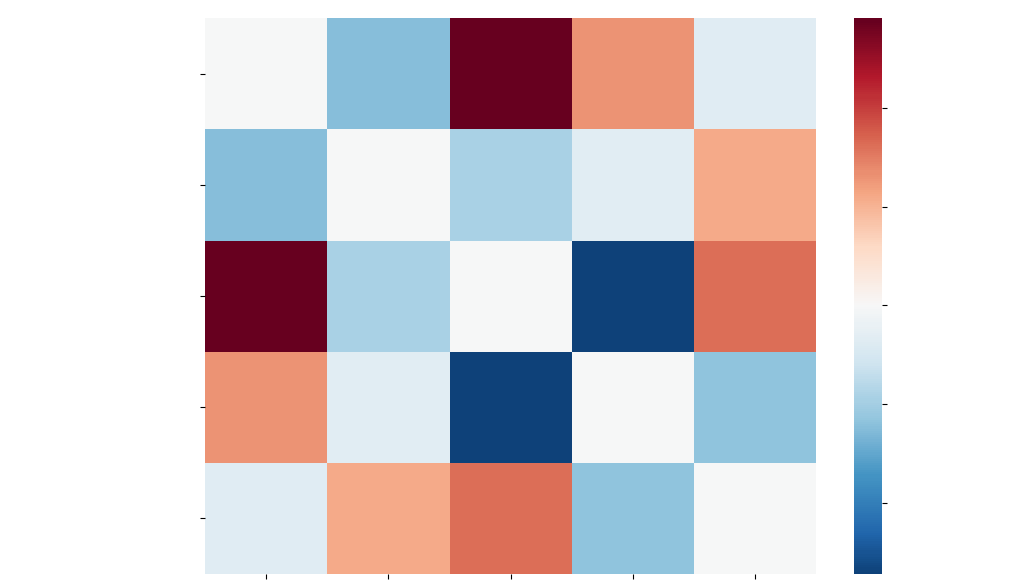

Correlation Matrix Difference (Original - Synthetic):
                    Nozzle Diameter  Print Speed  Nozzle Temperature  \
Nozzle Diameter              0.0000      -0.0619              0.1453   
Print Speed                 -0.0619       0.0000             -0.0467   
Nozzle Temperature           0.1453      -0.0467              0.0000   
Stress Level                 0.0644      -0.0166             -0.1359   
Fatigue Lifetime            -0.0180       0.0543              0.0807   

                    Stress Level  Fatigue Lifetime  
Nozzle Diameter           0.0644           -0.0180  
Print Speed              -0.0166            0.0543  
Nozzle Temperature       -0.1359            0.0807  
Stress Level              0.0000           -0.0587  
Fatigue Lifetime         -0.0587            0.0000  

FATIGUE LIFETIME ANALYSIS - INDIVIDUAL PLOTS 


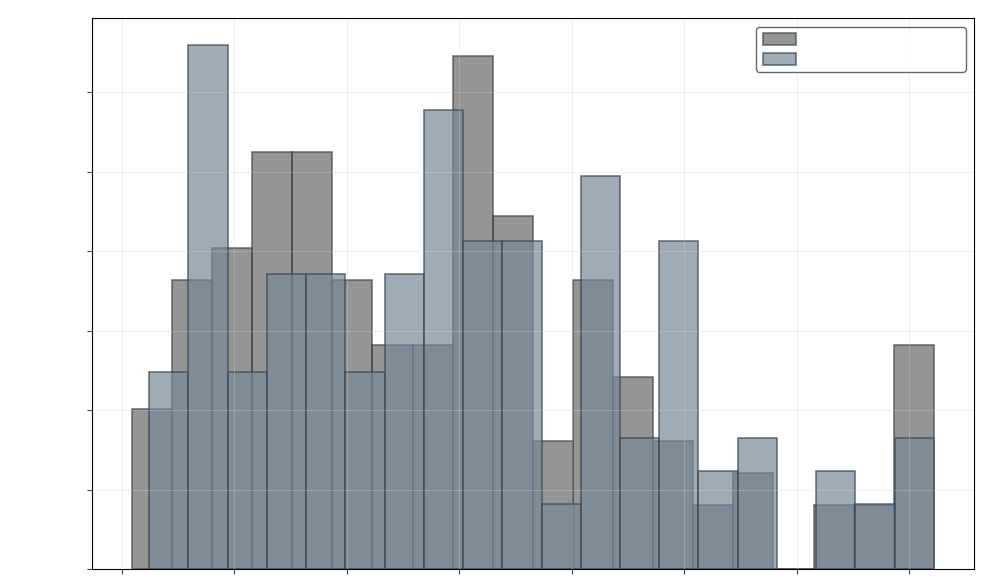

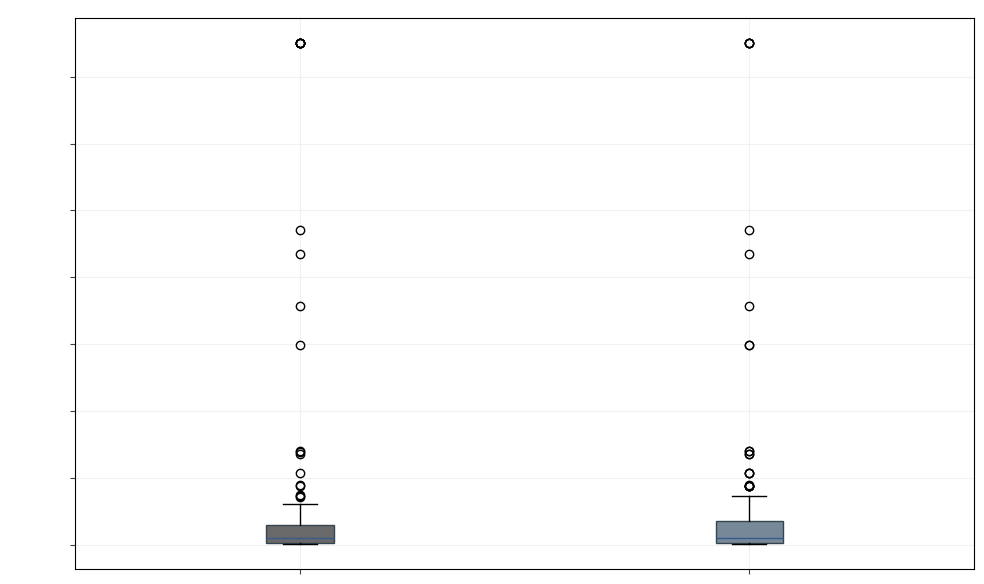

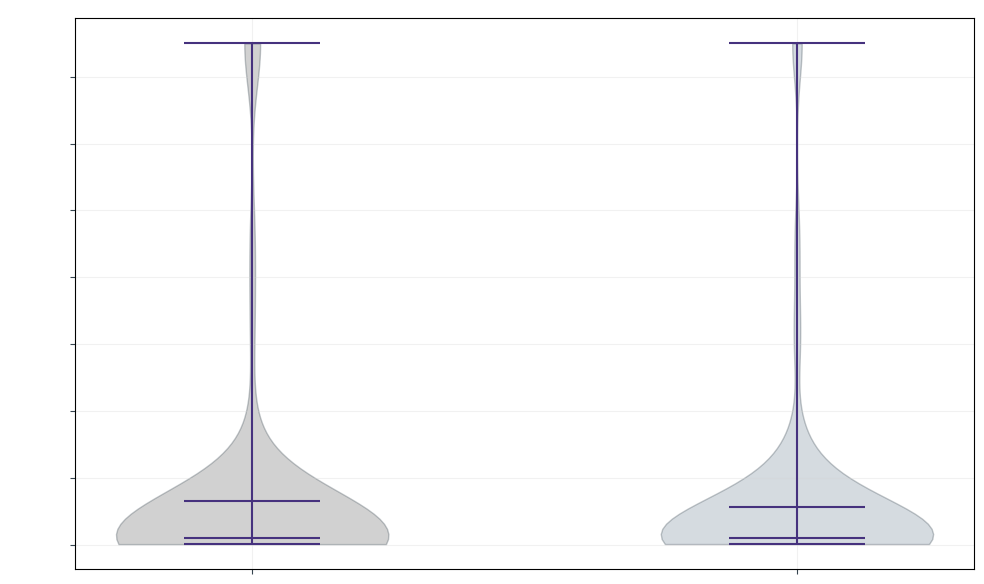

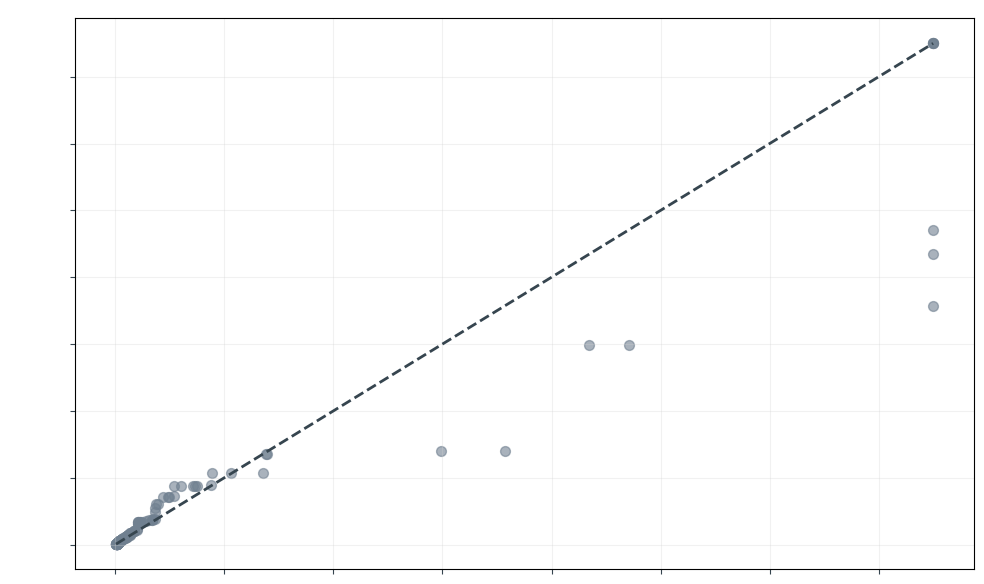

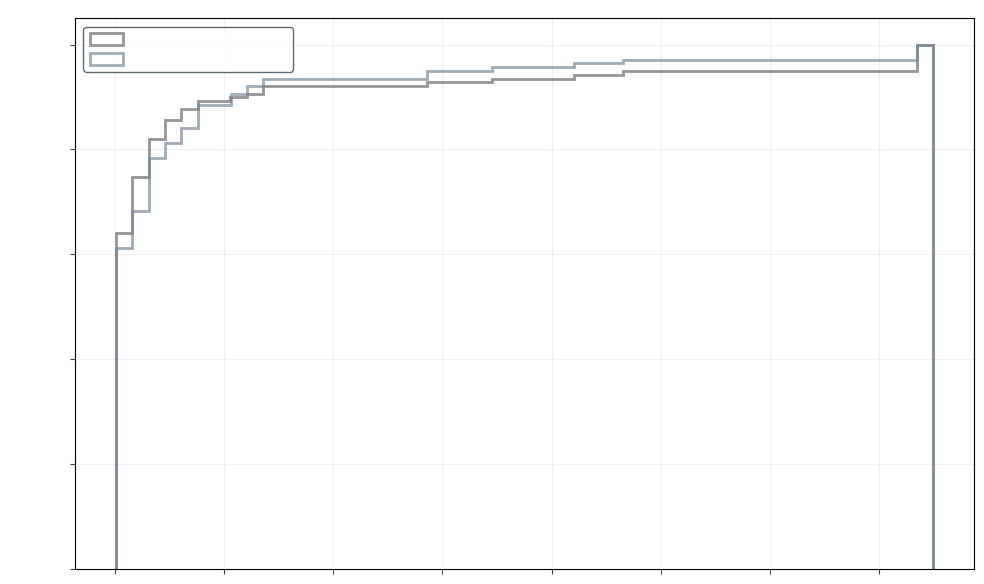

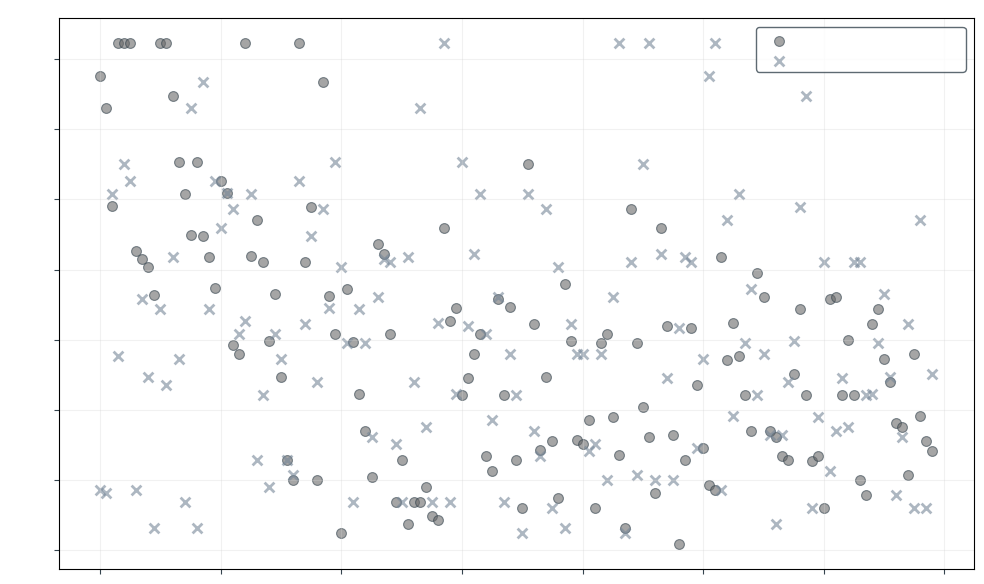


 MULTIVARIATE ANALYSIS - INDIVIDUAL PLOTS 


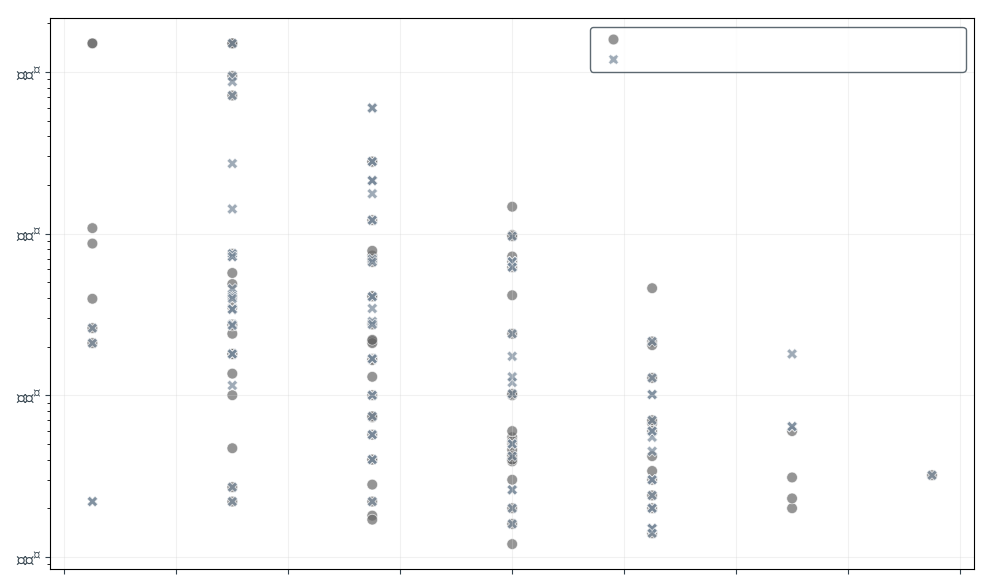

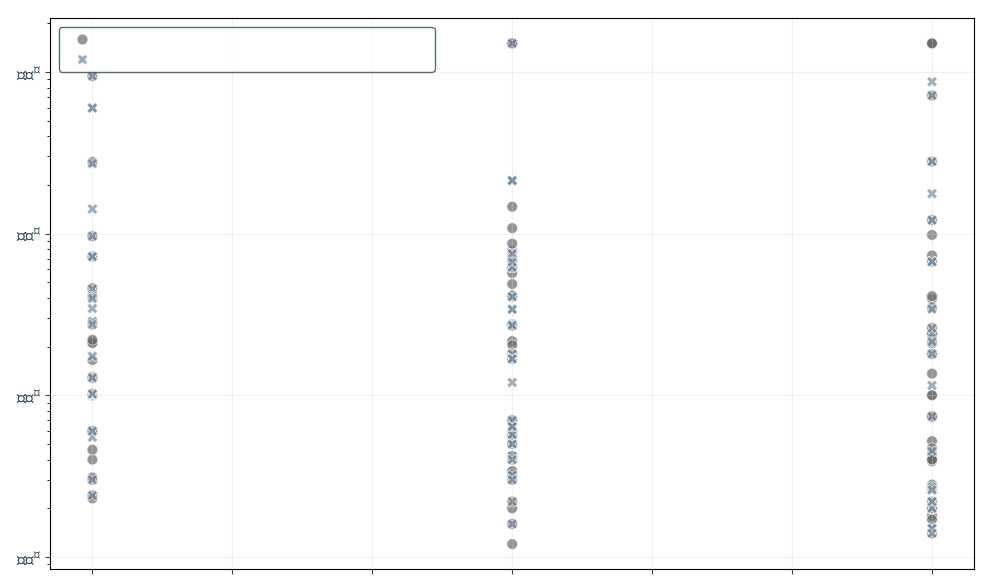

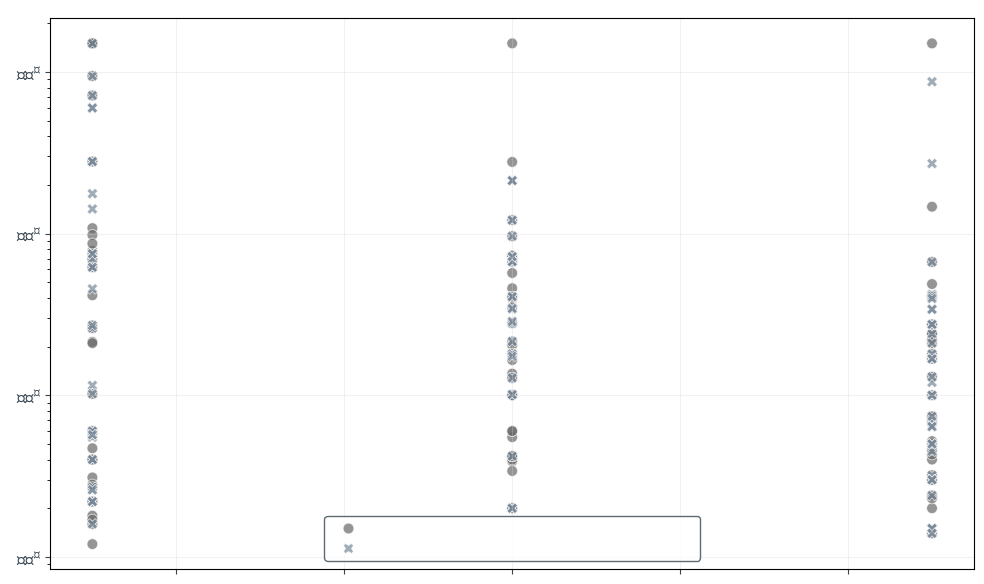

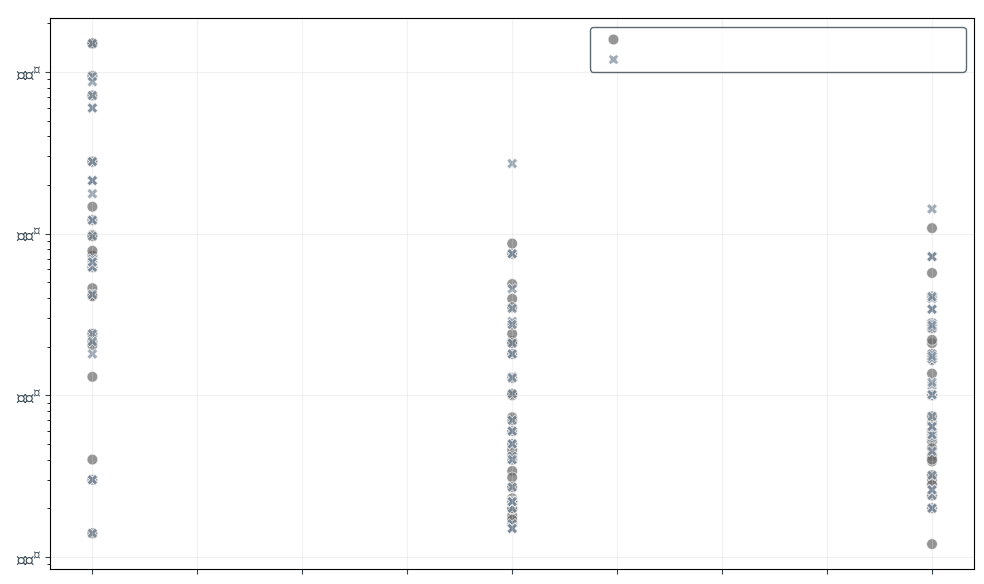

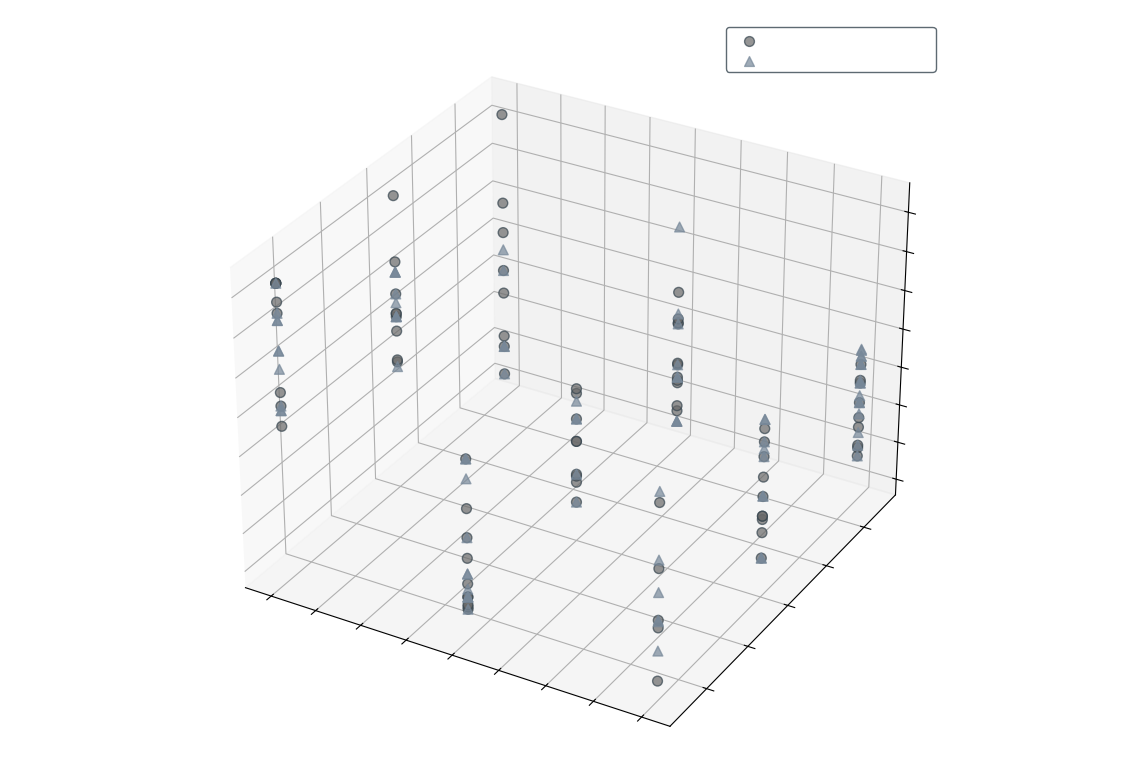

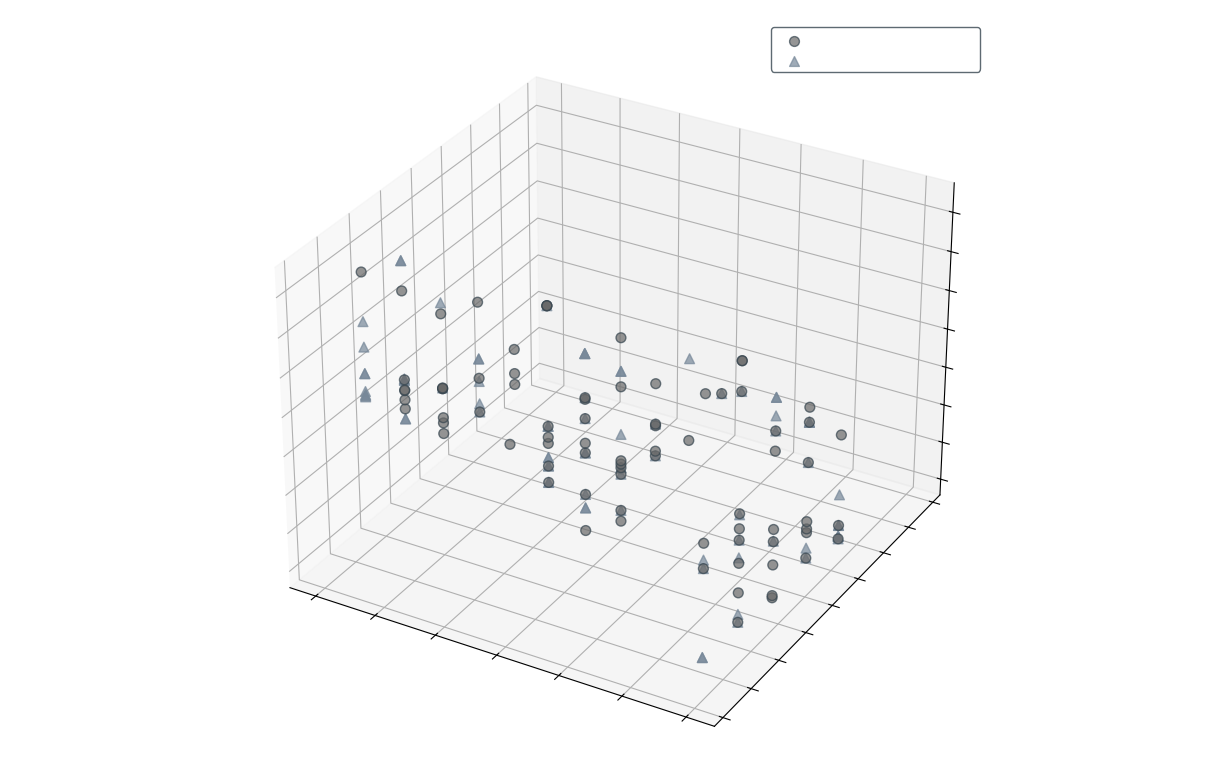


 SYNTHETIC DATA QUALITY METRICS
Synthetic Data Quality Metrics:
                    Mean_Preservation_Rate  Std_Preservation_Rate  \
Nozzle Diameter                     0.9965                 0.9845   
Print Speed                         0.9820                 0.9644   
Nozzle Temperature                  0.9949                 0.9931   
Stress Level                        0.9807                 0.9896   
Fatigue Lifetime                    0.8654                 0.8159   

                    Median_Preservation_Rate  KS_Statistic  Effect_Size  \
Nozzle Diameter                          1.0        0.0144       0.0088   
Print Speed                              1.0        0.0432      -0.0436   
Nozzle Temperature                       1.0        0.0216       0.0443   
Stress Level                             1.0        0.0432      -0.0485   
Fatigue Lifetime                         1.0        0.0719      -0.0511   

                    Coverage_Rate  
Nozzle Diameter            1.0000

In [ ]:
!pip install seaborn scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ks_2samp, ttest_ind
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')

df = pd.read_csv('combined_bootstrap_fatigue.csv')

available_fonts = [f.name for f in fm.fontManager.ttflist]
if 'Times New Roman' in available_fonts:
    plt.rcParams['font.family'] = 'Times New Roman'
    print("Using Times New Roman font for all plots")
else:
    serif_fonts = [f for f in available_fonts if any(term in f.lower() for term in ['serif', 'times', 'roman'])]
    if serif_fonts:
        plt.rcParams['font.family'] = serif_fonts[0]
        print(f"Times New Roman not found. Using {serif_fonts[0]} instead.")
    else:
        plt.rcParams['font.family'] = 'serif'
        print("Times New Roman not found. Using default serif font.")

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 12

light_grey = '#D3D3D3'
medium_grey = '#A9A9A9'
dark_grey = '#696969'
ash_grey = '#778899'
slate_grey = '#708090'
charcoal = '#36454F'

print("DATASET OVERVIEW ")
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData Source distribution:")
print(df['Data_Source'].value_counts())


print("\nBASIC DATA EXPLORATION ")
print("Basic Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

original_data = df[df['Data_Source'] == 'Original']
synthetic_data = df[df['Data_Source'] == 'Bootstrap_Synthetic']

print(f"\nOriginal data points: {len(original_data)}")
print(f"Synthetic data points: {len(synthetic_data)}")

print("\n DISTRIBUTION COMPARISON - INDIVIDUAL PLOTS ")
numerical_cols = ['Nozzle Diameter', 'Print Speed', 'Nozzle Temperature', 'Stress Level', 'Fatigue Lifetime']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(original_data[col], alpha=0.7, label='Original', bins=20, color=dark_grey, density=True, edgecolor=charcoal, linewidth=1.2)
    plt.hist(synthetic_data[col], alpha=0.7, label='Synthetic', bins=20, color=ash_grey, density=True, edgecolor=charcoal, linewidth=1.2)
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold', color=charcoal)
    plt.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
    plt.xlabel(col, fontsize=14, color=charcoal)
    plt.ylabel('Density', fontsize=14, color=charcoal)
    plt.grid(True, alpha=0.3, color=light_grey)
    plt.tick_params(colors=charcoal)
    plt.tight_layout()
    plt.show()

print("\nSTATISTICAL TESTS FOR DISTRIBUTION SIMILARITY ")


statistical_results = []
for col in numerical_cols:
    ks_stat, ks_pvalue = ks_2samp(original_data[col], synthetic_data[col])
    t_stat, t_pvalue = ttest_ind(original_data[col], synthetic_data[col])
    u_stat, u_pvalue = stats.mannwhitneyu(original_data[col], synthetic_data[col])

    print(f"\n{col}:")
    print(f"  KS Test - Statistic: {ks_stat:.4f}, p-value: {ks_pvalue:.4f}")
    print(f"  T-test - Statistic: {t_stat:.4f}, p-value: {t_pvalue:.4f}")
    print(f"  Mann-Whitney U - Statistic: {u_stat:.4f}, p-value: {u_pvalue:.4f}")
    print(f"  Original Mean: {original_data[col].mean():.2f} ± {original_data[col].std():.2f}")
    print(f"  Synthetic Mean: {synthetic_data[col].mean():.2f} ± {synthetic_data[col].std():.2f}")

    statistical_results.append({
        'Variable': col,
        'KS_Statistic': ks_stat,
        'KS_pvalue': ks_pvalue,
        'T_Statistic': t_stat,
        'T_pvalue': t_pvalue,
        'U_Statistic': u_stat,
        'U_pvalue': u_pvalue
    })

print("\n RANGE COMPARISON: ORIGINAL vs SYNTHETIC")


range_comparison = []
for col in numerical_cols:
    orig_min = original_data[col].min()
    orig_max = original_data[col].max()
    orig_range = orig_max - orig_min
    orig_iqr = original_data[col].quantile(0.75) - original_data[col].quantile(0.25)

    synth_min = synthetic_data[col].min()
    synth_max = synthetic_data[col].max()
    synth_range = synth_max - synth_min
    synth_iqr = synthetic_data[col].quantile(0.75) - synthetic_data[col].quantile(0.25)

    range_diff = synth_range - orig_range
    range_ratio = synth_range / orig_range if orig_range != 0 else np.nan
    iqr_ratio = synth_iqr / orig_iqr if orig_iqr != 0 else np.nan

    range_comparison.append({
        'Variable': col,
        'Original_Min': orig_min,
        'Original_Max': orig_max,
        'Original_Range': orig_range,
        'Synthetic_Min': synth_min,
        'Synthetic_Max': synth_max,
        'Synthetic_Range': synth_range,
        'Range_Difference': range_diff,
        'Range_Ratio': range_ratio,
        'IQR_Ratio': iqr_ratio
    })

range_df = pd.DataFrame(range_comparison)
print(range_df.round(4))

print("\n CORRELATION ANALYSIS - INDIVIDUAL PLOTS ")

plt.figure(figsize=(8, 6))
orig_corr = original_data[numerical_cols].corr()
sns.heatmap(orig_corr, annot=True, cmap='Greys', center=0, fmt='.3f',
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Original Data Correlation Matrix', fontweight='bold', fontsize=16, color=charcoal)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
synth_corr = synthetic_data[numerical_cols].corr()
sns.heatmap(synth_corr, annot=True, cmap='Purples', center=0, fmt='.3f',
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Synthetic Data Correlation Matrix', fontweight='bold', fontsize=16, color=charcoal)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
corr_diff = orig_corr - synth_corr
sns.heatmap(corr_diff, annot=True, cmap='RdBu_r', center=0, fmt='.3f',
            cbar_kws={'label': 'Correlation Difference'})
plt.title('Correlation Difference (Original - Synthetic)', fontweight='bold', fontsize=16, color=charcoal)
plt.tight_layout()
plt.show()

print("Correlation Matrix Difference (Original - Synthetic):")
print(corr_diff.round(4))

print("\nFATIGUE LIFETIME ANALYSIS - INDIVIDUAL PLOTS ")

plt.figure(figsize=(10, 6))
plt.hist(np.log1p(original_data['Fatigue Lifetime']), alpha=0.7, label='Original', bins=20, color=dark_grey, density=True, edgecolor=charcoal, linewidth=1.2)
plt.hist(np.log1p(synthetic_data['Fatigue Lifetime']), alpha=0.7, label='Synthetic', bins=20, color=ash_grey, density=True, edgecolor=charcoal, linewidth=1.2)
plt.title('Fatigue Lifetime Distribution (log scale)', fontweight='bold', fontsize=16, color=charcoal)
plt.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.xlabel('Log(Fatigue Lifetime + 1)', fontsize=14, color=charcoal)
plt.ylabel('Density', fontsize=14, color=charcoal)
plt.grid(True, alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
box_data = [original_data['Fatigue Lifetime'], synthetic_data['Fatigue Lifetime']]
box_plot = plt.boxplot(box_data, labels=['Original', 'Synthetic'], patch_artist=True)
box_plot['boxes'][0].set_facecolor(dark_grey)
box_plot['boxes'][1].set_facecolor(ash_grey)
box_plot['boxes'][0].set_edgecolor(charcoal)
box_plot['boxes'][1].set_edgecolor(charcoal)
plt.title('Fatigue Lifetime Box Plot', fontweight='bold', fontsize=16, color=charcoal)
plt.ylabel('Fatigue Lifetime', fontsize=14, color=charcoal)
plt.grid(True, alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
violin_parts = plt.violinplot([original_data['Fatigue Lifetime'], synthetic_data['Fatigue Lifetime']],
                             showmeans=True, showmedians=True)
violin_parts['bodies'][0].set_facecolor(dark_grey)
violin_parts['bodies'][1].set_facecolor(ash_grey)
violin_parts['bodies'][0].set_edgecolor(charcoal)
violin_parts['bodies'][1].set_edgecolor(charcoal)
plt.xticks([1, 2], ['Original', 'Synthetic'])
plt.title('Fatigue Lifetime Violin Plot', fontweight='bold', fontsize=16, color=charcoal)
plt.ylabel('Fatigue Lifetime', fontsize=14, color=charcoal)
plt.grid(True, alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sorted_orig = np.sort(original_data['Fatigue Lifetime'])
sorted_synth = np.sort(synthetic_data['Fatigue Lifetime'])

min_len = min(len(sorted_orig), len(sorted_synth))
plt.scatter(sorted_orig[:min_len], sorted_synth[:min_len], alpha=0.6, color=slate_grey, s=50)
plt.plot([sorted_orig.min(), sorted_orig.max()], [sorted_orig.min(), sorted_orig.max()], '--', linewidth=2, color=charcoal)
plt.xlabel('Original Fatigue Lifetime', fontsize=14, color=charcoal)
plt.ylabel('Synthetic Fatigue Lifetime', fontsize=14, color=charcoal)
plt.title('QQ Plot: Original vs Synthetic', fontweight='bold', fontsize=16, color=charcoal)
plt.grid(True, alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(original_data['Fatigue Lifetime'], cumulative=True, density=True,
           alpha=0.7, label='Original', bins=50, histtype='step', linewidth=2, color=dark_grey)
plt.hist(synthetic_data['Fatigue Lifetime'], cumulative=True, density=True,
           alpha=0.7, label='Synthetic', bins=50, histtype='step', linewidth=2, color=ash_grey)
plt.title('Cumulative Distribution Function', fontweight='bold', fontsize=16, color=charcoal)
plt.xlabel('Fatigue Lifetime', fontsize=14, color=charcoal)
plt.ylabel('Cumulative Probability', fontsize=14, color=charcoal)
plt.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.grid(True, alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(range(len(original_data)), np.log1p(original_data['Fatigue Lifetime']),
             alpha=0.6, label='Original', color=dark_grey, s=50, edgecolors=charcoal, linewidth=0.8)
plt.scatter(range(len(synthetic_data)), np.log1p(synthetic_data['Fatigue Lifetime']),
             alpha=0.6, label='Synthetic', color=ash_grey, s=50, marker='x', linewidth=2)
plt.title('Fatigue Lifetime (Log Scale) by Index', fontweight='bold', fontsize=16, color=charcoal)
plt.xlabel('Data Index', fontsize=14, color=charcoal)
plt.ylabel('Log(Fatigue Lifetime + 1)', fontsize=14, color=charcoal)
plt.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.grid(True, alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)
plt.tight_layout()
plt.show()

print("\n MULTIVARIATE ANALYSIS - INDIVIDUAL PLOTS ")

sample_orig = original_data.sample(min(100, len(original_data)), random_state=42)
sample_synth = synthetic_data.sample(min(100, len(synthetic_data)), random_state=42)
comparison_sample = pd.concat([sample_orig, sample_synth])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparison_sample, x='Stress Level', y='Fatigue Lifetime',
                hue='Data_Source', style='Data_Source', alpha=0.7, s=60,
                palette=[dark_grey, ash_grey])
plt.title('Stress Level vs Fatigue Lifetime', fontweight='bold', fontsize=16, color=charcoal)
plt.yscale('log')
plt.xlabel('Stress Level', fontsize=14, color=charcoal)
plt.ylabel('Fatigue Lifetime', fontsize=14, color=charcoal)
plt.grid(True, alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)
plt.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparison_sample, x='Nozzle Temperature', y='Fatigue Lifetime',
                hue='Data_Source', style='Data_Source', alpha=0.7, s=60,
                palette=[dark_grey, ash_grey])
plt.title('Nozzle Temperature vs Fatigue Lifetime', fontweight='bold', fontsize=16, color=charcoal)
plt.yscale('log')
plt.xlabel('Nozzle Temperature', fontsize=14, color=charcoal)
plt.ylabel('Fatigue Lifetime', fontsize=14, color=charcoal)
plt.grid(True, alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)
plt.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparison_sample, x='Print Speed', y='Fatigue Lifetime',
                hue='Data_Source', style='Data_Source', alpha=0.7, s=60,
                palette=[dark_grey, ash_grey])
plt.title('Print Speed vs Fatigue Lifetime', fontweight='bold', fontsize=16, color=charcoal)
plt.yscale('log')
plt.xlabel('Print Speed', fontsize=14, color=charcoal)
plt.ylabel('Fatigue Lifetime', fontsize=14, color=charcoal)
plt.grid(True, alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)
plt.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=comparison_sample, x='Nozzle Diameter', y='Fatigue Lifetime',
                hue='Data_Source', style='Data_Source', alpha=0.7, s=60,
                palette=[dark_grey, ash_grey])
plt.title('Nozzle Diameter vs Fatigue Lifetime', fontweight='bold', fontsize=16, color=charcoal)
plt.yscale('log')
plt.xlabel('Nozzle Diameter', fontsize=14, color=charcoal)
plt.ylabel('Fatigue Lifetime', fontsize=14, color=charcoal)
plt.grid(True, alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)
plt.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.tight_layout()
plt.show()

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111, projection='3d')
sample_size = min(80, len(original_data), len(synthetic_data))
orig_sample = original_data.sample(sample_size, random_state=42)
synth_sample = synthetic_data.sample(sample_size, random_state=42)

sc1 = ax1.scatter(orig_sample['Nozzle Diameter'], orig_sample['Print Speed'],
           np.log1p(orig_sample['Fatigue Lifetime']),
           c=dark_grey, label='Original', alpha=0.7, s=50, edgecolors=charcoal)
sc2 = ax1.scatter(synth_sample['Nozzle Diameter'], synth_sample['Print Speed'],
           np.log1p(synth_sample['Fatigue Lifetime']),
           c=ash_grey, label='Synthetic', alpha=0.7, s=50, marker='^')

ax1.set_xlabel('Nozzle Diameter', fontsize=12, color=charcoal)
ax1.set_ylabel('Print Speed', fontsize=12, color=charcoal)
ax1.set_zlabel('Log(Fatigue Lifetime)', fontsize=12, color=charcoal)
ax1.set_title('Nozzle Diameter vs Print Speed vs Fatigue Lifetime', fontweight='bold', fontsize=16, color=charcoal)
ax1.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 8))
ax2 = fig.add_subplot(111, projection='3d')
sc3 = ax2.scatter(orig_sample['Nozzle Temperature'], orig_sample['Stress Level'],
           np.log1p(orig_sample['Fatigue Lifetime']),
           c=dark_grey, label='Original', alpha=0.7, s=50, edgecolors=charcoal)
sc4 = ax2.scatter(synth_sample['Nozzle Temperature'], synth_sample['Stress Level'],
           np.log1p(synth_sample['Fatigue Lifetime']),
           c=ash_grey, label='Synthetic', alpha=0.7, s=50, marker='^')

ax2.set_xlabel('Nozzle Temperature', fontsize=12, color=charcoal)
ax2.set_ylabel('Stress Level', fontsize=12, color=charcoal)
ax2.set_zlabel('Log(Fatigue Lifetime)', fontsize=12, color=charcoal)
ax2.set_title('Nozzle Temperature vs Stress Level vs Fatigue Lifetime', fontweight='bold', fontsize=16, color=charcoal)
ax2.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.tight_layout()
plt.show()

print("\n SYNTHETIC DATA QUALITY METRICS")

def calculate_synthetic_quality_metrics(original, synthetic, numerical_cols):
    metrics = {}

    for col in numerical_cols:
        orig_mean = original[col].mean()
        synth_mean = synthetic[col].mean()
        mean_preservation = abs(synth_mean - orig_mean) / orig_mean if orig_mean != 0 else abs(synth_mean - orig_mean)

        orig_std = original[col].std()
        synth_std = synthetic[col].std()
        std_preservation = abs(synth_std - orig_std) / orig_std if orig_std != 0 else abs(synth_std - orig_std)

        orig_median = original[col].median()
        synth_median = synthetic[col].median()
        median_preservation = abs(synth_median - orig_median) / orig_median if orig_median != 0 else abs(synth_median - orig_median)

        metrics[col] = {
            'Mean_Preservation_Rate': 1 - mean_preservation,
            'Std_Preservation_Rate': 1 - std_preservation,
            'Median_Preservation_Rate': 1 - median_preservation,
            'KS_Statistic': stats.ks_2samp(original[col], synthetic[col])[0],
            'Effect_Size': (synth_mean - orig_mean) / orig_std if orig_std != 0 else 0,
            'Coverage_Rate': len(set(synthetic[col]) & set(original[col])) / len(set(original[col])) if len(set(original[col])) > 0 else 0
        }

    return pd.DataFrame(metrics).T

quality_metrics = calculate_synthetic_quality_metrics(original_data, synthetic_data, numerical_cols)
print("Synthetic Data Quality Metrics:")
print(quality_metrics.round(4))


print("COMPREHENSIVE COMPARISON REPORT: ORIGINAL vs SYNTHETIC DATA:")


print(f"\n1. DATA VOLUME:")
print(f"   • Original samples: {len(original_data):,}")
print(f"   • Synthetic samples: {len(synthetic_data):,}")
print(f"   • Total samples: {len(df):,}")
print(f"   • Synthetic/Original ratio: {len(synthetic_data)/len(original_data):.2f}")

print(f"\n2. KEY STATISTICAL DIFFERENCES:")
fatigue_stats = range_df[range_df['Variable'] == 'Fatigue Lifetime'].iloc[0]
print(f"   • Fatigue Lifetime Range - Original: {fatigue_stats['Original_Range']:,.0f}")
print(f"   • Fatigue Lifetime Range - Synthetic: {fatigue_stats['Synthetic_Range']:,.0f}")
print(f"   • Range Preservation: {fatigue_stats['Range_Ratio']:.3f}")

print(f"\n3. DATA QUALITY ASSESSMENT:")
print(f"   • Average mean preservation rate: {quality_metrics['Mean_Preservation_Rate'].mean():.3f}")
print(f"   • Average std preservation rate: {quality_metrics['Std_Preservation_Rate'].mean():.3f}")
print(f"   • Average median preservation rate: {quality_metrics['Median_Preservation_Rate'].mean():.3f}")
print(f"   • Average KS statistic: {quality_metrics['KS_Statistic'].mean():.3f}")

print(f"\n4. CORRELATION PRESERVATION:")
corr_preservation = 1 - (corr_diff.abs().mean().mean())
print(f"   • Correlation preservation rate: {corr_preservation:.3f}")









summary_results = pd.DataFrame({
    'Metric': [
        'Original_Samples', 'Synthetic_Samples', 'Total_Samples',
        'Synthetic_Original_Ratio', 'Overall_Quality_Score',
        'Mean_Preservation_Rate', 'Std_Preservation_Rate',
        'Correlation_Preservation', 'Average_KS_Statistic'
    ],
    'Value': [
        len(original_data), len(synthetic_data), len(df),
        len(synthetic_data)/len(original_data), overall_score,
        quality_metrics['Mean_Preservation_Rate'].mean(),
        quality_metrics['Std_Preservation_Rate'].mean(),
        corr_preservation,
        quality_metrics['KS_Statistic'].mean()
    ]
})

print("\nSummary Results:")
print(summary_results.round(4))

#plots

#Plot (prediction bar)


DNN PREDICTION PLOTS - LOG10 SCALE

R² Scores in Log10 Scale:
Training R²: 0.9921
Testing R²:  0.9357
All Data R²: 0.9815


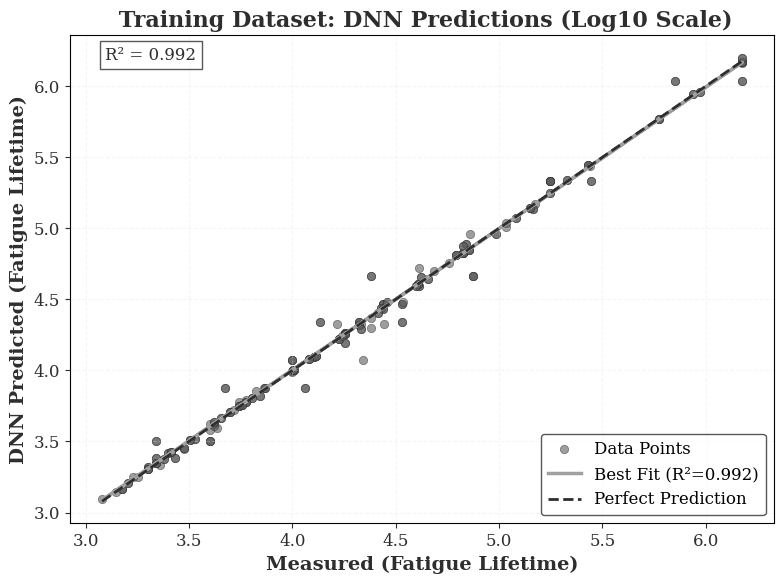

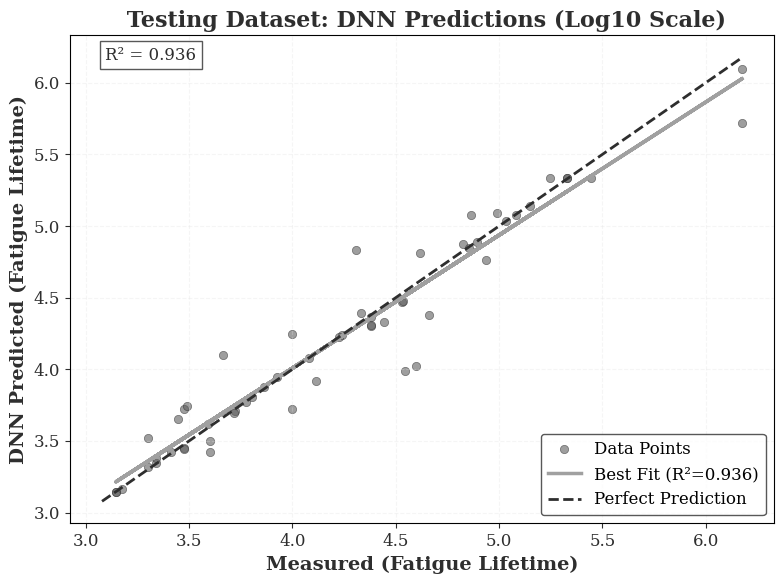

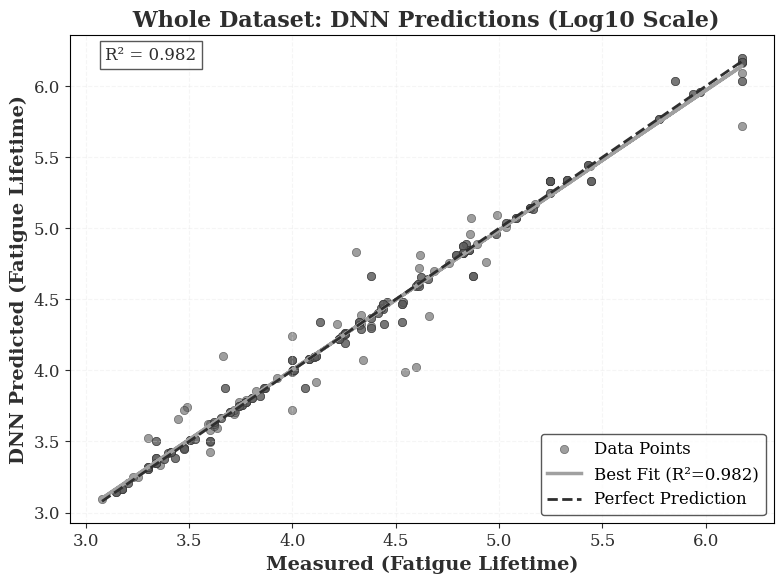

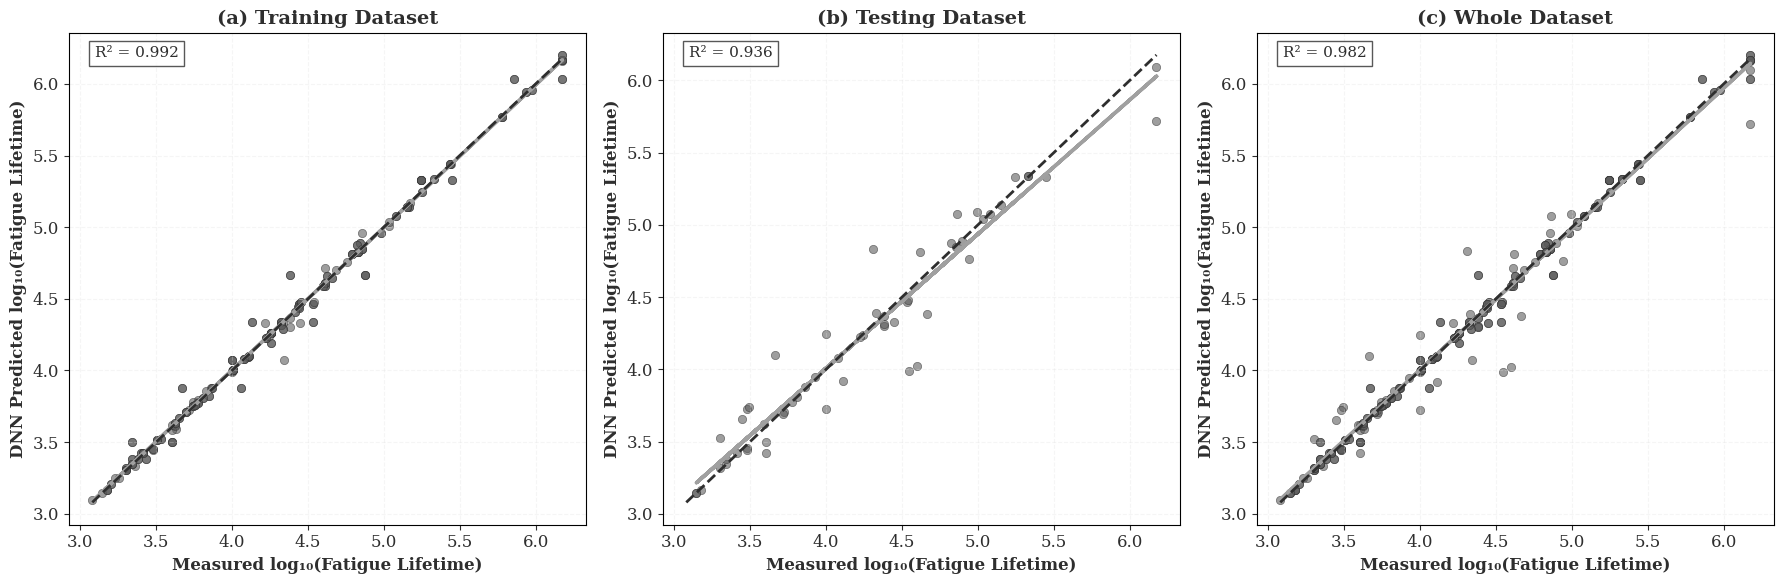

DETAILED PREDICTION STATISTICS - LOG10 SCALE

Training Dataset (Log10):
   Samples: 222
   R² Score: 0.9921
   Best Fit: y = 0.9948x + 0.0237
   RMSE: 0.0695 log10(cycles)
   MAE: 0.0376 log10(cycles)
   MSE: 0.004829

Testing Dataset (Log10):
   Samples: 56
   R² Score: 0.9357
   Best Fit: y = 0.9286x + 0.2935
   RMSE: 0.1896 log10(cycles)
   MAE: 0.1169 log10(cycles)
   MSE: 0.035962

Whole Dataset (Log10):
   Samples: 278
   R² Score: 0.9815
   Best Fit: y = 0.9827x + 0.0739
   RMSE: 0.1054 log10(cycles)
   MAE: 0.0536 log10(cycles)
   MSE: 0.011100
RESIDUAL ANALYSIS - LOG10 SCALE

Residual Statistics (Log10):
Training - Mean: -0.001348, Std: 0.069475
Testing  - Mean: 0.009306, Std: 0.189408
All Data - Mean: 0.000798, Std: 0.105354


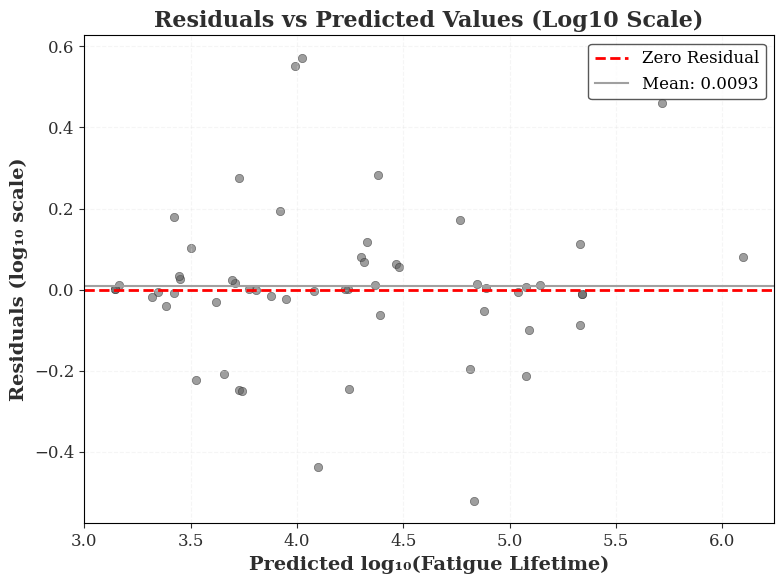

In [ ]:
charcoal = '#2E2E2E'
dark_grey = '#5D5D5D'
ash_grey = '#A0A0A0'
light_grey = '#E0E0E0'

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Liberation Serif', 'Times New Roman']

print("DNN PREDICTION PLOTS - LOG10 SCALE")

y_train_pred_scaled = dnn_model.predict(X_train_scaled, verbose=0).flatten()
y_train_pred_log = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()

y_test_pred_scaled = dnn_model.predict(X_test_scaled, verbose=0).flatten()
y_test_pred_log = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

X_all_scaled = scaler_X.transform(X)
y_all_pred_scaled = dnn_model.predict(X_all_scaled, verbose=0).flatten()
y_all_pred_log = scaler_y.inverse_transform(y_all_pred_scaled.reshape(-1, 1)).flatten()

y_train_log = y_train
y_test_log = y_test
y_all_log = y

r2_train_log = r2_score(y_train_log, y_train_pred_log)
r2_test_log = r2_score(y_test_log, y_test_pred_log)
r2_all_log = r2_score(y_all_log, y_all_pred_log)

print(f"\nR² Scores in Log10 Scale:")
print(f"Training R²: {r2_train_log:.4f}")
print(f"Testing R²:  {r2_test_log:.4f}")
print(f"All Data R²: {r2_all_log:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_train_log, y_train_pred_log, alpha=0.6, color=dark_grey,
           label='Data Points', edgecolors=charcoal, linewidth=0.5)

m_train, b_train = np.polyfit(y_train_log, y_train_pred_log, 1)
plt.plot(y_train_log, m_train*y_train_log + b_train, color=ash_grey,
         linewidth=2.5, label=f'Best Fit (R²={r2_train_log:.3f})')

plt.plot([y_all_log.min(), y_all_log.max()],
         [y_all_log.min(), y_all_log.max()], '--', color=charcoal,
         linewidth=2, label='Perfect Prediction')

plt.xlabel('Measured (Fatigue Lifetime)', fontsize=14, fontweight='bold', color=charcoal)
plt.ylabel('DNN Predicted (Fatigue Lifetime)', fontsize=14, fontweight='bold', color=charcoal)
plt.title(' Training Dataset: DNN Predictions (Log10 Scale)', fontsize=16, fontweight='bold', color=charcoal)
plt.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.grid(linestyle='--', alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)

plt.text(0.05, 0.95, f'R² = {r2_train_log:.3f}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor=charcoal),
         fontfamily=plt.rcParams['font.family'], color=charcoal)

plt.tight_layout()
plt.savefig('dnn_training_predictions_log10.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_log, y_test_pred_log, alpha=0.6, color=dark_grey,
           label='Data Points', edgecolors=charcoal, linewidth=0.5)

m_test, b_test = np.polyfit(y_test_log, y_test_pred_log, 1)
plt.plot(y_test_log, m_test*y_test_log + b_test, color=ash_grey,
         linewidth=2.5, label=f'Best Fit (R²={r2_test_log:.3f})')

plt.plot([y_all_log.min(), y_all_log.max()],
         [y_all_log.min(), y_all_log.max()], '--', color=charcoal,
         linewidth=2, label='Perfect Prediction')

plt.xlabel('Measured (Fatigue Lifetime)', fontsize=14, fontweight='bold', color=charcoal)
plt.ylabel('DNN Predicted (Fatigue Lifetime)', fontsize=14, fontweight='bold', color=charcoal)
plt.title(' Testing Dataset: DNN Predictions (Log10 Scale)', fontsize=16, fontweight='bold', color=charcoal)
plt.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.grid(linestyle='--', alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)

plt.text(0.05, 0.95, f'R² = {r2_test_log:.3f}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor=charcoal),
         fontfamily=plt.rcParams['font.family'], color=charcoal)

plt.tight_layout()
plt.savefig('dnn_testing_predictions_log10.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_all_log, y_all_pred_log, alpha=0.6, color=dark_grey,
           label='Data Points', edgecolors=charcoal, linewidth=0.5)

m_all, b_all = np.polyfit(y_all_log, y_all_pred_log, 1)
plt.plot(y_all_log, m_all*y_all_log + b_all, color=ash_grey,
         linewidth=2.5, label=f'Best Fit (R²={r2_all_log:.3f})')

plt.plot([y_all_log.min(), y_all_log.max()],
         [y_all_log.min(), y_all_log.max()], '--', color=charcoal,
         linewidth=2, label='Perfect Prediction')

plt.xlabel('Measured (Fatigue Lifetime)', fontsize=14, fontweight='bold', color=charcoal)
plt.ylabel('DNN Predicted (Fatigue Lifetime)', fontsize=14, fontweight='bold', color=charcoal)
plt.title(' Whole Dataset: DNN Predictions (Log10 Scale)', fontsize=16, fontweight='bold', color=charcoal)
plt.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.grid(linestyle='--', alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)

plt.text(0.05, 0.95, f'R² = {r2_all_log:.3f}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor=charcoal),
         fontfamily=plt.rcParams['font.family'], color=charcoal)

plt.tight_layout()
plt.savefig('dnn_all_predictions_log10.png', dpi=300, bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(y_train_log, y_train_pred_log, alpha=0.6, color=dark_grey,
               edgecolors=charcoal, linewidth=0.5)
axes[0].plot(y_train_log, m_train*y_train_log + b_train, color=ash_grey, linewidth=2.5)
axes[0].plot([y_all_log.min(), y_all_log.max()],
            [y_all_log.min(), y_all_log.max()], '--', color=charcoal, linewidth=2)
axes[0].set_xlabel('Measured log₁₀(Fatigue Lifetime)', fontsize=12, fontweight='bold', color=charcoal)
axes[0].set_ylabel('DNN Predicted log₁₀(Fatigue Lifetime)', fontsize=12, fontweight='bold', color=charcoal)
axes[0].set_title('(a) Training Dataset', fontsize=14, fontweight='bold', color=charcoal)
axes[0].grid(linestyle='--', alpha=0.3, color=light_grey)
axes[0].tick_params(colors=charcoal)
axes[0].text(0.05, 0.95, f'R² = {r2_train_log:.3f}', transform=axes[0].transAxes,
            fontsize=11, bbox=dict(facecolor='white', alpha=0.8, edgecolor=charcoal),
            fontfamily=plt.rcParams['font.family'], color=charcoal)

axes[1].scatter(y_test_log, y_test_pred_log, alpha=0.6, color=dark_grey,
               edgecolors=charcoal, linewidth=0.5)
axes[1].plot(y_test_log, m_test*y_test_log + b_test, color=ash_grey, linewidth=2.5)
axes[1].plot([y_all_log.min(), y_all_log.max()],
            [y_all_log.min(), y_all_log.max()], '--', color=charcoal, linewidth=2)
axes[1].set_xlabel('Measured log₁₀(Fatigue Lifetime)', fontsize=12, fontweight='bold', color=charcoal)
axes[1].set_ylabel('DNN Predicted log₁₀(Fatigue Lifetime)', fontsize=12, fontweight='bold', color=charcoal)
axes[1].set_title('(b) Testing Dataset', fontsize=14, fontweight='bold', color=charcoal)
axes[1].grid(linestyle='--', alpha=0.3, color=light_grey)
axes[1].tick_params(colors=charcoal)
axes[1].text(0.05, 0.95, f'R² = {r2_test_log:.3f}', transform=axes[1].transAxes,
            fontsize=11, bbox=dict(facecolor='white', alpha=0.8, edgecolor=charcoal),
            fontfamily=plt.rcParams['font.family'], color=charcoal)

axes[2].scatter(y_all_log, y_all_pred_log, alpha=0.6, color=dark_grey,
               edgecolors=charcoal, linewidth=0.5)
axes[2].plot(y_all_log, m_all*y_all_log + b_all, color=ash_grey, linewidth=2.5)
axes[2].plot([y_all_log.min(), y_all_log.max()],
            [y_all_log.min(), y_all_log.max()], '--', color=charcoal, linewidth=2)
axes[2].set_xlabel('Measured log₁₀(Fatigue Lifetime)', fontsize=12, fontweight='bold', color=charcoal)
axes[2].set_ylabel('DNN Predicted log₁₀(Fatigue Lifetime)', fontsize=12, fontweight='bold', color=charcoal)
axes[2].set_title('(c) Whole Dataset', fontsize=14, fontweight='bold', color=charcoal)
axes[2].grid(linestyle='--', alpha=0.3, color=light_grey)
axes[2].tick_params(colors=charcoal)
axes[2].text(0.05, 0.95, f'R² = {r2_all_log:.3f}', transform=axes[2].transAxes,
            fontsize=11, bbox=dict(facecolor='white', alpha=0.8, edgecolor=charcoal),
            fontfamily=plt.rcParams['font.family'], color=charcoal)

plt.tight_layout()
plt.savefig('dnn_combined_predictions_log10.png', dpi=300, bbox_inches='tight')
plt.show()


print("DETAILED PREDICTION STATISTICS - LOG10 SCALE")


print(f"\nTraining Dataset (Log10):")
print(f"   Samples: {len(y_train_log)}")
print(f"   R² Score: {r2_train_log:.4f}")
print(f"   Best Fit: y = {m_train:.4f}x + {b_train:.4f}")
print(f"   RMSE: {np.sqrt(mean_squared_error(y_train_log, y_train_pred_log)):.4f} log10(cycles)")
print(f"   MAE: {mean_absolute_error(y_train_log, y_train_pred_log):.4f} log10(cycles)")
print(f"   MSE: {mean_squared_error(y_train_log, y_train_pred_log):.6f}")

print(f"\nTesting Dataset (Log10):")
print(f"   Samples: {len(y_test_log)}")
print(f"   R² Score: {r2_test_log:.4f}")
print(f"   Best Fit: y = {m_test:.4f}x + {b_test:.4f}")
print(f"   RMSE: {np.sqrt(mean_squared_error(y_test_log, y_test_pred_log)):.4f} log10(cycles)")
print(f"   MAE: {mean_absolute_error(y_test_log, y_test_pred_log):.4f} log10(cycles)")
print(f"   MSE: {mean_squared_error(y_test_log, y_test_pred_log):.6f}")

print(f"\nWhole Dataset (Log10):")
print(f"   Samples: {len(y_all_log)}")
print(f"   R² Score: {r2_all_log:.4f}")
print(f"   Best Fit: y = {m_all:.4f}x + {b_all:.4f}")
print(f"   RMSE: {np.sqrt(mean_squared_error(y_all_log, y_all_pred_log)):.4f} log10(cycles)")
print(f"   MAE: {mean_absolute_error(y_all_log, y_all_pred_log):.4f} log10(cycles)")
print(f"   MSE: {mean_squared_error(y_all_log, y_all_pred_log):.6f}")


print("RESIDUAL ANALYSIS - LOG10 SCALE")


residuals_train_log = y_train_log - y_train_pred_log
residuals_test_log = y_test_log - y_test_pred_log
residuals_all_log = y_all_log - y_all_pred_log

print(f"\nResidual Statistics (Log10):")
print(f"Training - Mean: {np.mean(residuals_train_log):.6f}, Std: {np.std(residuals_train_log):.6f}")
print(f"Testing  - Mean: {np.mean(residuals_test_log):.6f}, Std: {np.std(residuals_test_log):.6f}")
print(f"All Data - Mean: {np.mean(residuals_all_log):.6f}, Std: {np.std(residuals_all_log):.6f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred_log, residuals_test_log, alpha=0.6, color=dark_grey,
           edgecolors=charcoal, linewidth=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')
plt.axhline(y=np.mean(residuals_test_log), color=ash_grey, linestyle='-',
           linewidth=1.5, label=f'Mean: {np.mean(residuals_test_log):.4f}')
plt.xlabel('Predicted log₁₀(Fatigue Lifetime)', fontsize=14, fontweight='bold', color=charcoal)
plt.ylabel('Residuals (log₁₀ scale)', fontsize=14, fontweight='bold', color=charcoal)
plt.title('Residuals vs Predicted Values (Log10 Scale)', fontsize=16, fontweight='bold', color=charcoal)
plt.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.grid(linestyle='--', alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)
plt.tight_layout()
plt.savefig('dnn_residuals_log10.png', dpi=300, bbox_inches='tight')
plt.show()



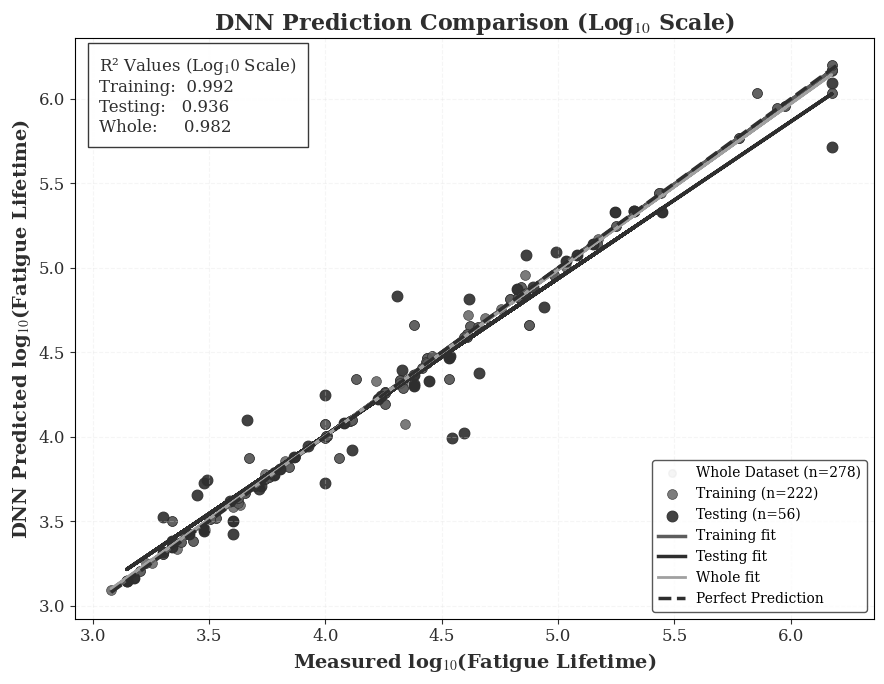

In [ ]:

fig = plt.figure(figsize=(9, 7))

plt.scatter(y_all_log, y_all_pred_log, alpha=0.3, color=light_grey, s=30,
            label=f'Whole Dataset (n={len(y_all_log)})')

plt.scatter(y_train_log, y_train_pred_log, alpha=0.8, color=dark_grey, s=50,
            edgecolors=charcoal, linewidth=0.5, label=f'Training (n={len(y_train_log)})')

plt.scatter(y_test_log, y_test_pred_log, alpha=0.9, color=charcoal, s=60,
            edgecolors=charcoal, linewidth=0.8, label=f'Testing (n={len(y_test_log)})')

plt.plot(y_train_log, m_train*y_train_log + b_train, color=dark_grey, linewidth=2.5,
         label='Training fit')
plt.plot(y_test_log, m_test*y_test_log + b_test, color=charcoal, linewidth=2.5,
         label='Testing fit')
plt.plot(y_all_log, m_all*y_all_log + b_all, color=ash_grey, linewidth=2,
         linestyle='-', label='Whole fit')

min_val = min(y_all_log.min(), y_all_pred_log.min())
max_val = max(y_all_log.max(), y_all_pred_log.max())
plt.plot([min_val, max_val], [min_val, max_val], '--', color=charcoal, linewidth=2.5,
         label='Perfect Prediction')

plt.xlabel('Measured log$_{10}$(Fatigue Lifetime)', fontsize=14, fontweight='bold', color=charcoal)
plt.ylabel('DNN Predicted log$_{10}$(Fatigue Lifetime)', fontsize=14, fontweight='bold', color=charcoal)
plt.title('DNN Prediction Comparison (Log$_{10}$ Scale)', fontsize=16, fontweight='bold', color=charcoal)

plt.grid(linestyle='--', alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)

plt.legend(loc='lower right', facecolor='white', edgecolor=charcoal,
           prop={'family': plt.rcParams['font.family'], 'size': 10})

r2_text = (f'R² Values (Log$_{10}$ Scale)\n'
           f"Training:  {r2_train_log:.3f}\n"
           f"Testing:   {r2_test_log:.3f}\n"
           f"Whole:     {r2_all_log:.3f}")
plt.text(0.03, 0.97, r2_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.95, edgecolor=charcoal, pad=8),
         fontfamily=plt.rcParams['font.family'], color=charcoal)

plt.tight_layout()
plt.savefig('dnn_predictions_comparison_log10_dark.png', dpi=300, bbox_inches='tight')
plt.show()


cumulative error plot:


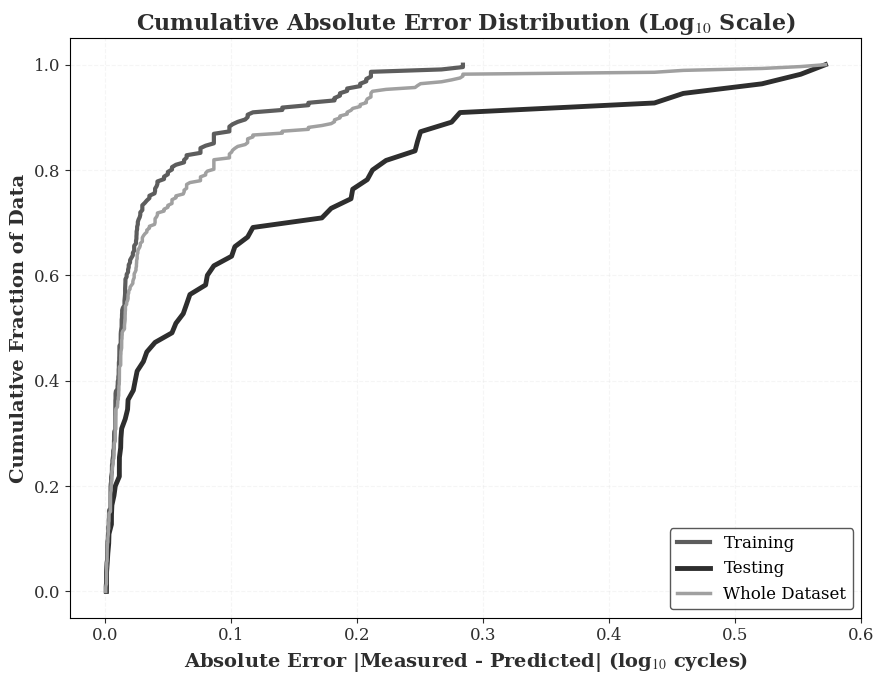

In [ ]:

print("\ncumulative error plot:")

abs_err_train = np.abs(residuals_train_log)
abs_err_test = np.abs(residuals_test_log)
abs_err_all = np.abs(residuals_all_log)

# Sort errors
sorted_train = np.sort(abs_err_train)
sorted_test = np.sort(abs_err_test)
sorted_all = np.sort(abs_err_all)

# Cumulative fractions
cum_train = np.linspace(0, 1, len(sorted_train))
cum_test = np.linspace(0, 1, len(sorted_test))
cum_all = np.linspace(0, 1, len(sorted_all))

fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(sorted_train, cum_train, color=dark_grey, linewidth=3, label='Training')
ax.plot(sorted_test, cum_test, color=charcoal, linewidth=3.5, label='Testing')
ax.plot(sorted_all, cum_all, color=ash_grey, linewidth=2.5, label='Whole Dataset')

ax.set_xlabel('Absolute Error |Measured - Predicted| (log$_{10}$ cycles)', fontsize=14, fontweight='bold', color=charcoal)
ax.set_ylabel('Cumulative Fraction of Data', fontsize=14, fontweight='bold', color=charcoal)
ax.set_title('Cumulative Absolute Error Distribution (Log$_{10}$ Scale)', fontsize=16, fontweight='bold', color=charcoal)
ax.legend(facecolor='white', edgecolor=charcoal)
ax.grid(linestyle='--', alpha=0.3, color=light_grey)
ax.tick_params(colors=charcoal)

plt.tight_layout()
plt.savefig('dnn_cumulative_error_log10_dark.png', dpi=300, bbox_inches='tight')
plt.show()




DNN PREDICTION PLOTS - LOG10 SCALE
Generating predictions for training, testing, and all data...

R² Scores and RMSE in Log10 Scale:
Training R²: 0.9921, RMSE: 0.0695
Testing R²:  0.9357, RMSE: 0.1896
All Data R²: 0.9815, RMSE: 0.1054


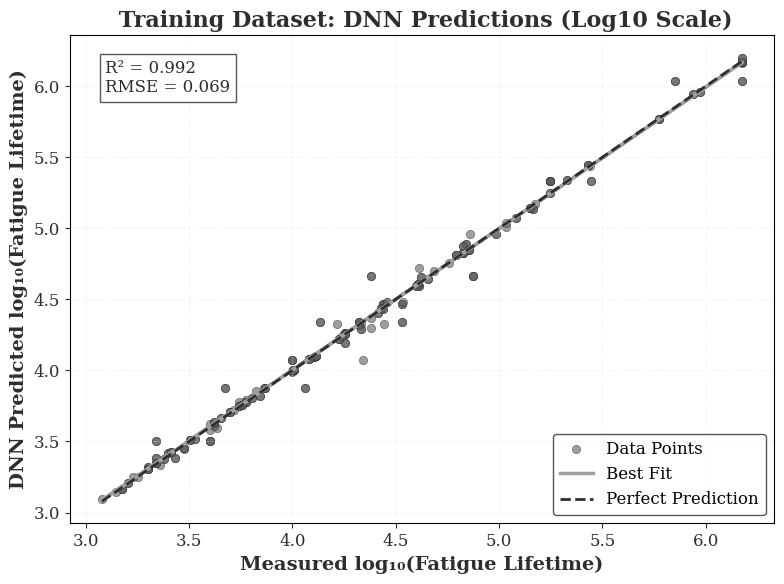

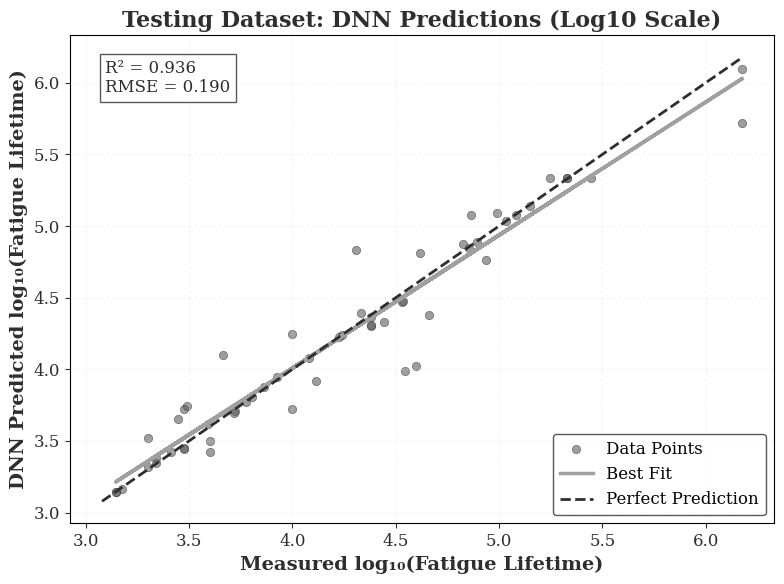

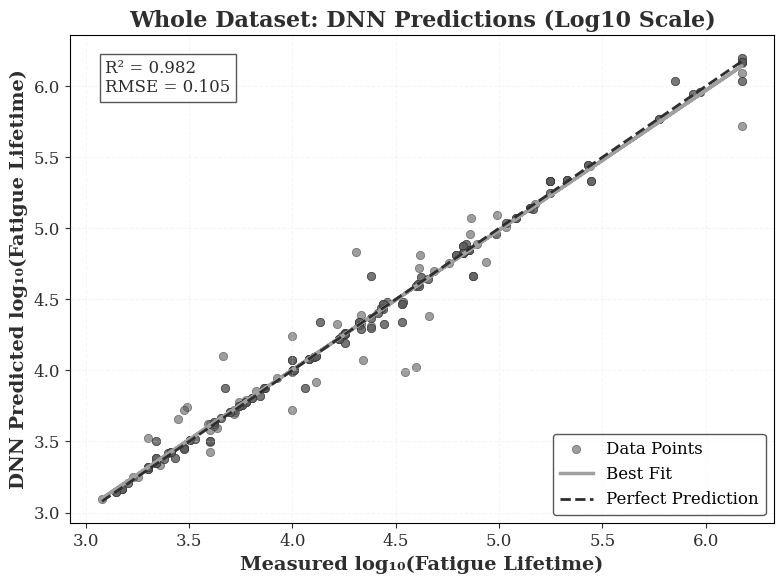


Generating combined subplot...


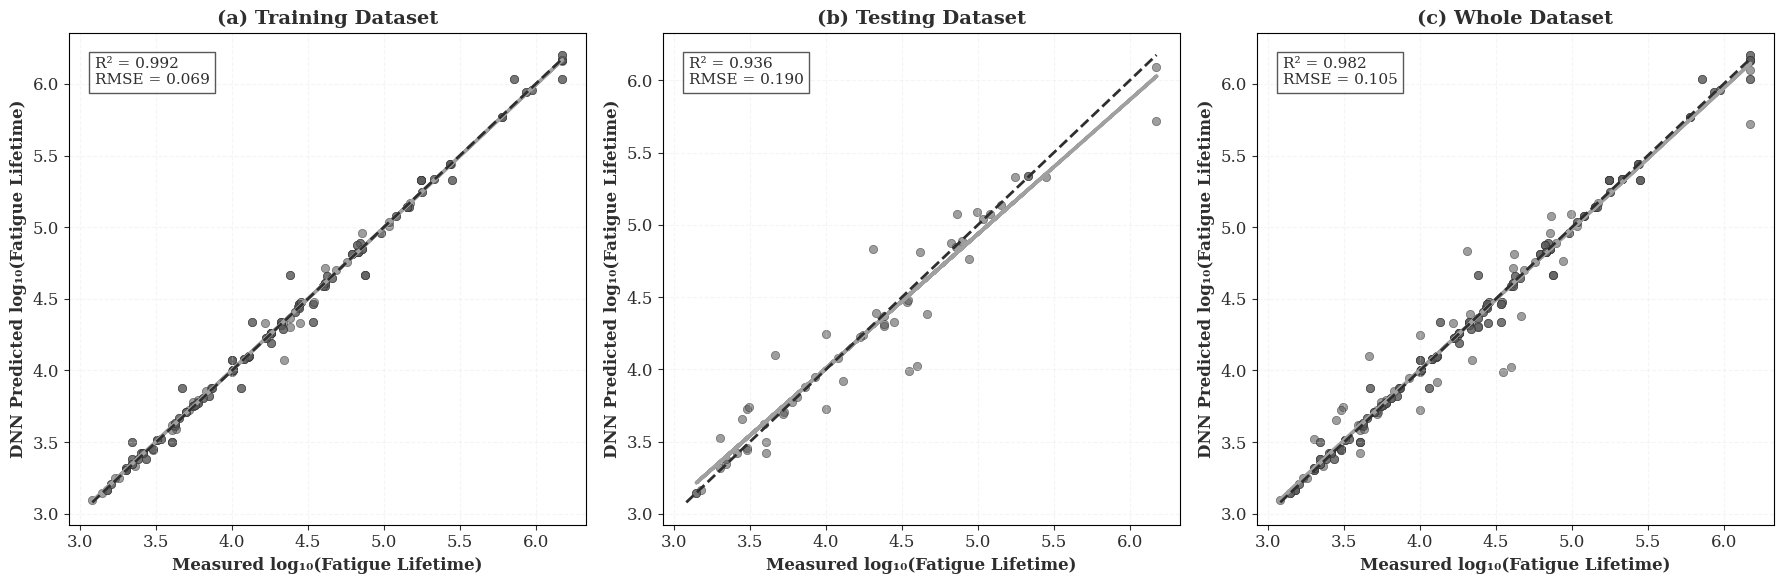


DETAILED PREDICTION STATISTICS - LOG10 SCALE

Training Dataset (Log10):
   Samples: 222
   R² Score: 0.9921
   RMSE: 0.0695 log10(cycles)
   Best Fit: y = 0.9948x + 0.0237
   MAE: 0.0376 log10(cycles)
   MSE: 0.004829

Testing Dataset (Log10):
   Samples: 56
   R² Score: 0.9357
   RMSE: 0.1896 log10(cycles)
   Best Fit: y = 0.9286x + 0.2935
   MAE: 0.1169 log10(cycles)
   MSE: 0.035962

Whole Dataset (Log10):
   Samples: 278
   R² Score: 0.9815
   RMSE: 0.1054 log10(cycles)
   Best Fit: y = 0.9827x + 0.0739
   MAE: 0.0536 log10(cycles)
   MSE: 0.011100

RESIDUAL ANALYSIS - LOG10 SCALE

Residual Statistics (Log10):
Training - Mean: -0.001348, Std: 0.069475
Testing  - Mean: 0.009306, Std: 0.189408
All Data - Mean: 0.000798, Std: 0.105354


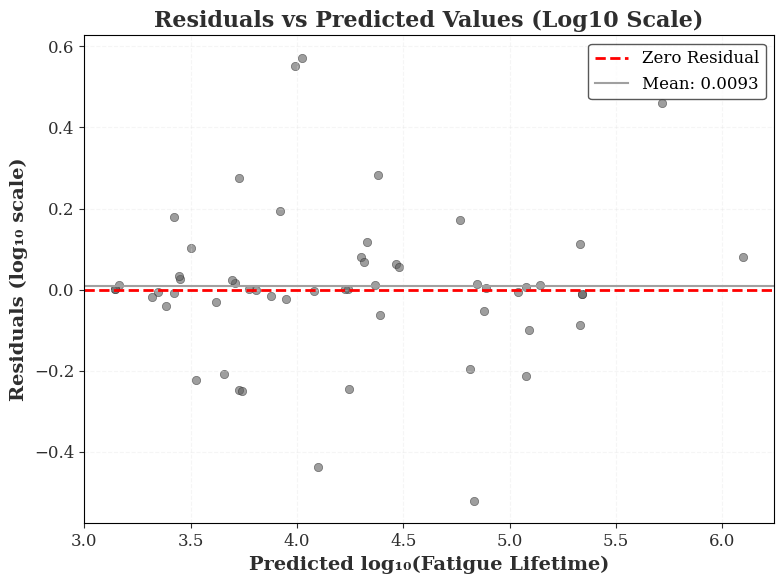

In [ ]:
charcoal = '#2E2E2E'
dark_grey = '#5D5D5D'
ash_grey = '#A0A0A0'
light_grey = '#E0E0E0'

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Liberation Serif', 'Times New Roman']

print("\nDNN PREDICTION PLOTS - LOG10 SCALE")

print("Generating predictions for training, testing, and all data...")
y_train_pred_scaled = dnn_model.predict(X_train_scaled, verbose=0).flatten()
y_train_pred_log = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()

y_test_pred_scaled = dnn_model.predict(X_test_scaled, verbose=0).flatten()
y_test_pred_log = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

X_all_scaled = scaler_X.transform(X)
y_all_pred_scaled = dnn_model.predict(X_all_scaled, verbose=0).flatten()
y_all_pred_log = scaler_y.inverse_transform(y_all_pred_scaled.reshape(-1, 1)).flatten()

y_train_log = y_train
y_test_log = y_test
y_all_log = y

r2_train_log = r2_score(y_train_log, y_train_pred_log)
r2_test_log = r2_score(y_test_log, y_test_pred_log)
r2_all_log = r2_score(y_all_log, y_all_pred_log)

rmse_train_log = np.sqrt(mean_squared_error(y_train_log, y_train_pred_log))
rmse_test_log = np.sqrt(mean_squared_error(y_test_log, y_test_pred_log))
rmse_all_log = np.sqrt(mean_squared_error(y_all_log, y_all_pred_log))

print(f"\nR² Scores and RMSE in Log10 Scale:")
print(f"Training R²: {r2_train_log:.4f}, RMSE: {rmse_train_log:.4f}")
print(f"Testing R²:  {r2_test_log:.4f}, RMSE: {rmse_test_log:.4f}")
print(f"All Data R²: {r2_all_log:.4f}, RMSE: {rmse_all_log:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_train_log, y_train_pred_log, alpha=0.6, color=dark_grey,
           label='Data Points', edgecolors=charcoal, linewidth=0.5)

m_train, b_train = np.polyfit(y_train_log, y_train_pred_log, 1)
plt.plot(y_train_log, m_train*y_train_log + b_train, color=ash_grey,
         linewidth=2.5, label=f'Best Fit')

plt.plot([y_all_log.min(), y_all_log.max()],
         [y_all_log.min(), y_all_log.max()], '--', color=charcoal,
         linewidth=2, label='Perfect Prediction')

plt.xlabel('Measured log₁₀(Fatigue Lifetime)', fontsize=14, fontweight='bold', color=charcoal)
plt.ylabel('DNN Predicted log₁₀(Fatigue Lifetime)', fontsize=14, fontweight='bold', color=charcoal)
plt.title(' Training Dataset: DNN Predictions (Log10 Scale)', fontsize=16, fontweight='bold', color=charcoal)
plt.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.grid(linestyle='--', alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)

textstr = f'R² = {r2_train_log:.3f}\nRMSE = {rmse_train_log:.3f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor=charcoal),
         fontfamily=plt.rcParams['font.family'], color=charcoal, verticalalignment='top')

plt.tight_layout()
plt.savefig('dnn_training_predictions_log10.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_log, y_test_pred_log, alpha=0.6, color=dark_grey,
           label='Data Points', edgecolors=charcoal, linewidth=0.5)

m_test, b_test = np.polyfit(y_test_log, y_test_pred_log, 1)
plt.plot(y_test_log, m_test*y_test_log + b_test, color=ash_grey,
         linewidth=2.5, label=f'Best Fit')

plt.plot([y_all_log.min(), y_all_log.max()],
         [y_all_log.min(), y_all_log.max()], '--', color=charcoal,
         linewidth=2, label='Perfect Prediction')

plt.xlabel('Measured log₁₀(Fatigue Lifetime)', fontsize=14, fontweight='bold', color=charcoal)
plt.ylabel('DNN Predicted log₁₀(Fatigue Lifetime)', fontsize=14, fontweight='bold', color=charcoal)
plt.title('Testing Dataset: DNN Predictions (Log10 Scale)', fontsize=16, fontweight='bold', color=charcoal)
plt.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.grid(linestyle='--', alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)

textstr = f'R² = {r2_test_log:.3f}\nRMSE = {rmse_test_log:.3f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor=charcoal),
         fontfamily=plt.rcParams['font.family'], color=charcoal, verticalalignment='top')

plt.tight_layout()
plt.savefig('dnn_testing_predictions_log10.png', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_all_log, y_all_pred_log, alpha=0.6, color=dark_grey,
           label='Data Points', edgecolors=charcoal, linewidth=0.5)

m_all, b_all = np.polyfit(y_all_log, y_all_pred_log, 1)
plt.plot(y_all_log, m_all*y_all_log + b_all, color=ash_grey,
         linewidth=2.5, label=f'Best Fit')

plt.plot([y_all_log.min(), y_all_log.max()],
         [y_all_log.min(), y_all_log.max()], '--', color=charcoal,
         linewidth=2, label='Perfect Prediction')

plt.xlabel('Measured log₁₀(Fatigue Lifetime)', fontsize=14, fontweight='bold', color=charcoal)
plt.ylabel('DNN Predicted log₁₀(Fatigue Lifetime)', fontsize=14, fontweight='bold', color=charcoal)
plt.title('Whole Dataset: DNN Predictions (Log10 Scale)', fontsize=16, fontweight='bold', color=charcoal)
plt.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.grid(linestyle='--', alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)

textstr = f'R² = {r2_all_log:.3f}\nRMSE = {rmse_all_log:.3f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor=charcoal),
         fontfamily=plt.rcParams['font.family'], color=charcoal, verticalalignment='top')

plt.tight_layout()
plt.savefig('dnn_all_predictions_log10.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nGenerating combined subplot...")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(y_train_log, y_train_pred_log, alpha=0.6, color=dark_grey,
               edgecolors=charcoal, linewidth=0.5)
axes[0].plot(y_train_log, m_train*y_train_log + b_train, color=ash_grey, linewidth=2.5)
axes[0].plot([y_all_log.min(), y_all_log.max()],
            [y_all_log.min(), y_all_log.max()], '--', color=charcoal, linewidth=2)
axes[0].set_xlabel('Measured log₁₀(Fatigue Lifetime)', fontsize=12, fontweight='bold', color=charcoal)
axes[0].set_ylabel('DNN Predicted log₁₀(Fatigue Lifetime)', fontsize=12, fontweight='bold', color=charcoal)
axes[0].set_title('(a) Training Dataset', fontsize=14, fontweight='bold', color=charcoal)
axes[0].grid(linestyle='--', alpha=0.3, color=light_grey)
axes[0].tick_params(colors=charcoal)
textstr_train = f'R² = {r2_train_log:.3f}\nRMSE = {rmse_train_log:.3f}'
axes[0].text(0.05, 0.95, textstr_train, transform=axes[0].transAxes,
            fontsize=11, bbox=dict(facecolor='white', alpha=0.8, edgecolor=charcoal),
            fontfamily=plt.rcParams['font.family'], color=charcoal, verticalalignment='top')

axes[1].scatter(y_test_log, y_test_pred_log, alpha=0.6, color=dark_grey,
               edgecolors=charcoal, linewidth=0.5)
axes[1].plot(y_test_log, m_test*y_test_log + b_test, color=ash_grey, linewidth=2.5)
axes[1].plot([y_all_log.min(), y_all_log.max()],
            [y_all_log.min(), y_all_log.max()], '--', color=charcoal, linewidth=2)
axes[1].set_xlabel('Measured log₁₀(Fatigue Lifetime)', fontsize=12, fontweight='bold', color=charcoal)
axes[1].set_ylabel('DNN Predicted log₁₀(Fatigue Lifetime)', fontsize=12, fontweight='bold', color=charcoal)
axes[1].set_title('(b) Testing Dataset', fontsize=14, fontweight='bold', color=charcoal)
axes[1].grid(linestyle='--', alpha=0.3, color=light_grey)
axes[1].tick_params(colors=charcoal)
textstr_test = f'R² = {r2_test_log:.3f}\nRMSE = {rmse_test_log:.3f}'
axes[1].text(0.05, 0.95, textstr_test, transform=axes[1].transAxes,
            fontsize=11, bbox=dict(facecolor='white', alpha=0.8, edgecolor=charcoal),
            fontfamily=plt.rcParams['font.family'], color=charcoal, verticalalignment='top')

axes[2].scatter(y_all_log, y_all_pred_log, alpha=0.6, color=dark_grey,
               edgecolors=charcoal, linewidth=0.5)
axes[2].plot(y_all_log, m_all*y_all_log + b_all, color=ash_grey, linewidth=2.5)
axes[2].plot([y_all_log.min(), y_all_log.max()],
            [y_all_log.min(), y_all_log.max()], '--', color=charcoal, linewidth=2)
axes[2].set_xlabel('Measured log₁₀(Fatigue Lifetime)', fontsize=12, fontweight='bold', color=charcoal)
axes[2].set_ylabel('DNN Predicted log₁₀(Fatigue Lifetime)', fontsize=12, fontweight='bold', color=charcoal)
axes[2].set_title('(c) Whole Dataset', fontsize=14, fontweight='bold', color=charcoal)
axes[2].grid(linestyle='--', alpha=0.3, color=light_grey)
axes[2].tick_params(colors=charcoal)
textstr_all = f'R² = {r2_all_log:.3f}\nRMSE = {rmse_all_log:.3f}'
axes[2].text(0.05, 0.95, textstr_all, transform=axes[2].transAxes,
            fontsize=11, bbox=dict(facecolor='white', alpha=0.8, edgecolor=charcoal),
            fontfamily=plt.rcParams['font.family'], color=charcoal, verticalalignment='top')

plt.tight_layout()
plt.savefig('dnn_combined_predictions_log10.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nDETAILED PREDICTION STATISTICS - LOG10 SCALE")

print(f"\nTraining Dataset (Log10):")
print(f"   Samples: {len(y_train_log)}")
print(f"   R² Score: {r2_train_log:.4f}")
print(f"   RMSE: {rmse_train_log:.4f} log10(cycles)")
print(f"   Best Fit: y = {m_train:.4f}x + {b_train:.4f}")
print(f"   MAE: {mean_absolute_error(y_train_log, y_train_pred_log):.4f} log10(cycles)")
print(f"   MSE: {mean_squared_error(y_train_log, y_train_pred_log):.6f}")

print(f"\nTesting Dataset (Log10):")
print(f"   Samples: {len(y_test_log)}")
print(f"   R² Score: {r2_test_log:.4f}")
print(f"   RMSE: {rmse_test_log:.4f} log10(cycles)")
print(f"   Best Fit: y = {m_test:.4f}x + {b_test:.4f}")
print(f"   MAE: {mean_absolute_error(y_test_log, y_test_pred_log):.4f} log10(cycles)")
print(f"   MSE: {mean_squared_error(y_test_log, y_test_pred_log):.6f}")

print(f"\nWhole Dataset (Log10):")
print(f"   Samples: {len(y_all_log)}")
print(f"   R² Score: {r2_all_log:.4f}")
print(f"   RMSE: {rmse_all_log:.4f} log10(cycles)")
print(f"   Best Fit: y = {m_all:.4f}x + {b_all:.4f}")
print(f"   MAE: {mean_absolute_error(y_all_log, y_all_pred_log):.4f} log10(cycles)")
print(f"   MSE: {mean_squared_error(y_all_log, y_all_pred_log):.6f}")

print("\nRESIDUAL ANALYSIS - LOG10 SCALE")

residuals_train_log = y_train_log - y_train_pred_log
residuals_test_log = y_test_log - y_test_pred_log
residuals_all_log = y_all_log - y_all_pred_log

print(f"\nResidual Statistics (Log10):")
print(f"Training - Mean: {np.mean(residuals_train_log):.6f}, Std: {np.std(residuals_train_log):.6f}")
print(f"Testing  - Mean: {np.mean(residuals_test_log):.6f}, Std: {np.std(residuals_test_log):.6f}")
print(f"All Data - Mean: {np.mean(residuals_all_log):.6f}, Std: {np.std(residuals_all_log):.6f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred_log, residuals_test_log, alpha=0.6, color=dark_grey,
           edgecolors=charcoal, linewidth=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residual')
plt.axhline(y=np.mean(residuals_test_log), color=ash_grey, linestyle='-',
           linewidth=1.5, label=f'Mean: {np.mean(residuals_test_log):.4f}')
plt.xlabel('Predicted log₁₀(Fatigue Lifetime)', fontsize=14, fontweight='bold', color=charcoal)
plt.ylabel('Residuals (log₁₀ scale)', fontsize=14, fontweight='bold', color=charcoal)
plt.title('Residuals vs Predicted Values (Log10 Scale)', fontsize=16, fontweight='bold', color=charcoal)
plt.legend(facecolor='white', edgecolor=charcoal, prop={'family': plt.rcParams['font.family']})
plt.grid(linestyle='--', alpha=0.3, color=light_grey)
plt.tick_params(colors=charcoal)
plt.tight_layout()
plt.savefig('dnn_residuals_log10.png', dpi=300, bbox_inches='tight')
plt.show()

##Doc


In [ ]:
!pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 9.7 MB/s eta 0:00:00


In [ ]:
from docx import Document
import tensorflow as tf


optimizer = dnn_model.optimizer
optimizer_name = optimizer.__class__.__name__
optimizer_config = optimizer.get_config()

loss_function = dnn_model.loss

total_epochs = len(history.history['loss'])
batch_size = 32

early_stopping = None
reduce_lr = None

for cb in dnn_model.callbacks if hasattr(dnn_model, "callbacks") else []:
    if isinstance(cb, tf.keras.callbacks.EarlyStopping):
        early_stopping = cb
    if isinstance(cb, tf.keras.callbacks.ReduceLROnPlateau):
        reduce_lr = cb

doc = Document()
doc.add_heading('Methodology: Deterministic Deep Neural Network Training', level=1)

doc.add_paragraph(
    "Model Architecture:\n"
    "A deterministic fully connected Deep Neural Network (DNN) was implemented using TensorFlow/Keras. "
    "The architecture consists of an input layer with four features, followed by hidden layers with "
    "64, 32, and 16 neurons using ReLU activation. A single linear output neuron predicts the log10-"
    "transformed fatigue lifetime."
)

doc.add_paragraph(
    f"Optimizer Configuration:\n"
    f"The model was trained using the {optimizer_name} optimizer with the following parameters:\n"
    f"- Learning rate: {optimizer_config.get('learning_rate')}\n"
    f"- β1: {optimizer_config.get('beta_1', 'default')}\n"
    f"- β2: {optimizer_config.get('beta_2', 'default')}\n"
    f"- Epsilon: {optimizer_config.get('epsilon', 'default')}"
)

doc.add_paragraph(
    f"Loss Function:\n"
    f"The training objective was Mean Squared Error (MSE), suitable for continuous regression "
    f"tasks in log-transformed space."
)

doc.add_paragraph(
    f"Training Configuration:\n"
    f"- Batch size: {batch_size}\n"
    f"- Maximum epochs: 500\n"
    f"- Actual epochs until convergence: {total_epochs}"
)

doc.add_paragraph(
    "Loss Convergence Criteria:\n"
    "Training convergence was controlled using EarlyStopping and ReduceLROnPlateau callbacks. "
    "EarlyStopping monitored validation loss with a patience of 50 epochs and restored the best "
    "model weights. ReduceLROnPlateau reduced the learning rate by a factor of 0.5 after 20 epochs "
    "without validation loss improvement, with a minimum learning rate of 1e-7."
)

doc.add_paragraph(
    "Reproducibility:\n"
    "To ensure deterministic behavior, all random seeds (Python, NumPy, TensorFlow) were fixed, "
    "data shuffling was disabled during training, and TensorFlow deterministic operations were enforced."
)



file_name = "Methodology_AutoGenerated_From_Model.docx"
doc.save(file_name)

print("Methodology document created:", file_name)


Methodology document created: Methodology_AutoGenerated_From_Model.docx


##other model

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR



Training Deterministic DNN...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step 

Training Classical ML Models...
Training Random Forest...
Training Gradient Boosting...
Training SVR (RBF)...
MODEL PERFORMANCE COMPARISON (LOG10 SPACE)
                         R²      RMSE       MAE
DNN                0.935743  0.189637  0.116859
Random Forest      0.923563  0.206831  0.133155
Gradient Boosting  0.902640  0.233428  0.181750
SVR (RBF)          0.862795  0.277107  0.174158


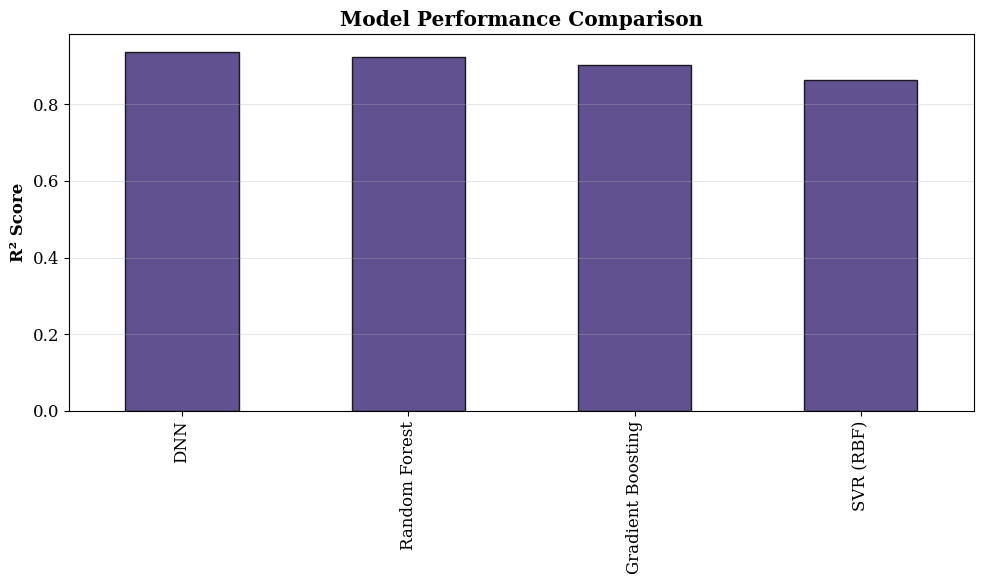

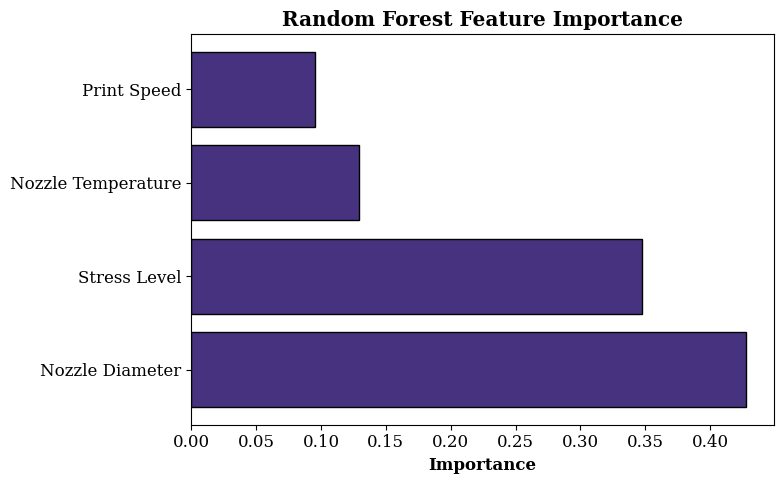


Best Model (by R²):
DNN


In [ ]:


import tensorflow as tf
import numpy as np
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    mean_absolute_percentage_error, explained_variance_score,
    median_absolute_error, max_error
)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.keras.utils.set_random_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    tf.config.experimental.enable_op_determinism()

set_seeds(42)





df = pd.read_csv("combined_bootstrap_fatigue.csv")

X = df[['Nozzle Diameter', 'Print Speed',
        'Nozzle Temperature', 'Stress Level']].values

y = np.log10(df['Fatigue Lifetime'].values)

feature_names = ['Nozzle Diameter', 'Print Speed',
                 'Nozzle Temperature', 'Stress Level']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)



scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1)).flatten()



def create_dnn():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(4,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    return model

dnn = create_dnn()
dnn.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mse',
    metrics=['mae']
)

print("\nTraining Deterministic DNN...")
history = dnn.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=500,
    batch_size=32,
    shuffle=False,
    verbose=0,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=50, restore_best_weights=True
        )
    ]
)


y_pred_dnn_scaled = dnn.predict(X_test_scaled).flatten()
y_pred_dnn = scaler_y.inverse_transform(
    y_pred_dnn_scaled.reshape(-1,1)
).flatten()

metrics_dnn = {
    "R²": r2_score(y_test, y_pred_dnn),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_dnn)),
    "MAE": mean_absolute_error(y_test, y_pred_dnn)
}



print("\nTraining Classical ML Models...")

models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300, random_state=42, n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42
    ),
    "SVR (RBF)": SVR(C=10, epsilon=0.01)
}

ml_results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    ml_results[name] = {
        "R²": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }



comparison_df = pd.DataFrame(ml_results).T
comparison_df.loc["DNN"] = metrics_dnn
comparison_df = comparison_df.sort_values("R²", ascending=False)

print("MODEL PERFORMANCE COMPARISON (LOG10 SPACE)")
print(comparison_df)



plt.figure(figsize=(10,6))
comparison_df["R²"].plot(
    kind='bar', edgecolor='black', alpha=0.85
)
plt.ylabel("R² Score", fontweight='bold')
plt.title("Model Performance Comparison", fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig("model_comparison_r2.png", dpi=300)
plt.show()



rf = models["Random Forest"]

rf_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(8,5))
plt.barh(
    rf_importance["Feature"],
    rf_importance["Importance"],
    edgecolor='black'
)
plt.xlabel("Importance", fontweight='bold')
plt.title("Random Forest Feature Importance", fontweight='bold')
plt.tight_layout()
plt.savefig("rf_feature_importance.png", dpi=300)
plt.show()




print("\nBest Model (by R²):")
print(comparison_df.index[0])



Training Deterministic DNN

Training Classical ML Models...
Training Random Forest...
Training Gradient Boosting...
Training SVR (RBF)...

MODEL PERFORMANCE COMPARISON (LOG10 SPACE)
                         R²      RMSE       MAE
DNN                0.935743  0.189637  0.116859
Random Forest      0.923563  0.206831  0.133155
Gradient Boosting  0.902640  0.233428  0.181750
SVR (RBF)          0.862795  0.277107  0.174158


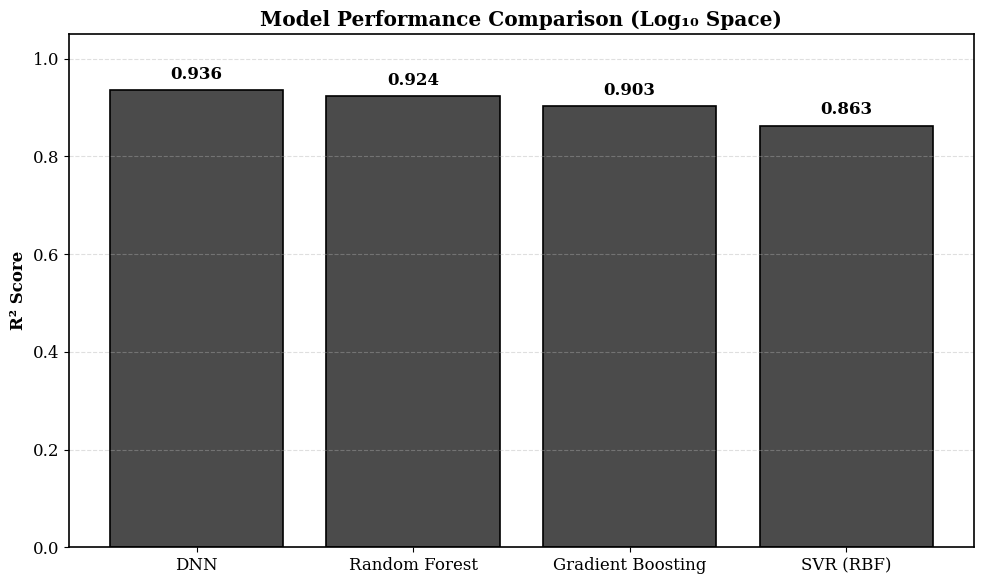

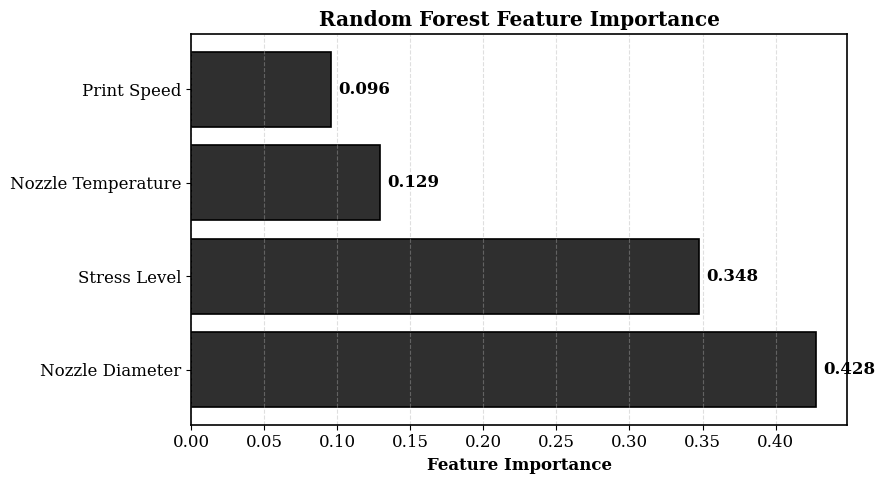

Best Model (by R²): DNN


In [ ]:
import tensorflow as tf
import numpy as np
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
import warnings
warnings.filterwarnings("ignore")



plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = [
    'Times New Roman',
    'DejaVu Serif',
    'Liberation Serif'
]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['text.color'] = 'black'



def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.keras.utils.set_random_seed(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    tf.config.experimental.enable_op_determinism()

set_seeds(42)




df = pd.read_csv("combined_bootstrap_fatigue.csv")

X = df[['Nozzle Diameter', 'Print Speed',
        'Nozzle Temperature', 'Stress Level']].values

y = np.log10(df['Fatigue Lifetime'].values)

feature_names = ['Nozzle Diameter', 'Print Speed',
                 'Nozzle Temperature', 'Stress Level']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)



scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1)).flatten()



def create_dnn():
    return tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(4,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

dnn = create_dnn()
dnn.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mse',
    metrics=['mae']
)

print("\nTraining Deterministic DNN")
dnn.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=500,
    batch_size=32,
    shuffle=False,
    verbose=0,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=50,
            restore_best_weights=True
        )
    ]
)



y_pred_dnn_scaled = dnn.predict(X_test_scaled, verbose=0).flatten()
y_pred_dnn = scaler_y.inverse_transform(
    y_pred_dnn_scaled.reshape(-1,1)
).flatten()

metrics_dnn = {
    "R²": r2_score(y_test, y_pred_dnn),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_dnn)),
    "MAE": mean_absolute_error(y_test, y_pred_dnn)
}



print("\nTraining Classical ML Models...")

models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300, random_state=42, n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42
    ),
    "SVR (RBF)": SVR(C=10, epsilon=0.01)
}

ml_results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    ml_results[name] = {
        "R²": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }



comparison_df = pd.DataFrame(ml_results).T
comparison_df.loc["DNN"] = metrics_dnn
comparison_df = comparison_df.sort_values("R²", ascending=False)

print("\n" + "="*70)
print("MODEL PERFORMANCE COMPARISON (LOG10 SPACE)")
print("="*70)
print(comparison_df)



plt.figure(figsize=(10,6))

bars = plt.bar(
    comparison_df.index,
    comparison_df["R²"],
    color='#4B4B4B',
    edgecolor='black',
    linewidth=1.2
)

plt.ylabel("R² Score")
plt.title("Model Performance Comparison (Log₁₀ Space)")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.015,
        f"{height:.3f}",
        ha='center',
        va='bottom',
        fontweight='bold'
    )

plt.tight_layout()
plt.savefig("model_comparison_r2.png", dpi=300, bbox_inches='tight')
plt.show()



rf = models["Random Forest"]

rf_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(9,5))

bars = plt.barh(
    rf_importance["Feature"],
    rf_importance["Importance"],
    color='#2F2F2F',
    edgecolor='black',
    linewidth=1.2
)

plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.grid(axis='x', linestyle='--', alpha=0.4)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.005,
        bar.get_y() + bar.get_height()/2,
        f"{width:.3f}",
        va='center',
        fontweight='bold'
    )

plt.tight_layout()
plt.savefig("rf_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()




print(f"Best Model (by R²): {comparison_df.index[0]}")


In [ ]:
from docx import Document
from docx.shared import Inches
from datetime import datetime

doc = Document()
doc.add_heading('ML & DNN Model Benchmarking Report', level=1)



doc.add_heading('Experiment Information', level=2)

meta_table = doc.add_table(rows=6, cols=2)
meta_table.style = 'Table Grid'

meta_info = [
    ("Dataset", "combined_bootstrap_fatigue.csv"),
    ("Target Variable", "Fatigue Lifetime (log₁₀ transformed)"),
    ("Train-Test Split", "80% / 20%"),
    ("Feature Scaling", "StandardScaler"),
    ("Random Seed", "42 (Fully Deterministic)"),
    ("Date", datetime.now().strftime("%Y-%m-%d %H:%M"))
]

for i, (k, v) in enumerate(meta_info):
    meta_table.rows[i].cells[0].text = k
    meta_table.rows[i].cells[1].text = v



doc.add_heading('Input Features', level=2)

feat_table = doc.add_table(rows=len(feature_names)+1, cols=2)
feat_table.style = 'Table Grid'
feat_table.rows[0].cells[0].text = "Feature"
feat_table.rows[0].cells[1].text = "Description"

for i, f in enumerate(feature_names, start=1):
    feat_table.rows[i].cells[0].text = f
    feat_table.rows[i].cells[1].text = "Input parameter"



doc.add_heading('Model Configurations', level=2)

config_table = doc.add_table(rows=5, cols=2)
config_table.style = 'Table Grid'

configs = {
    "DNN": "Dense[64,32,16], ReLU, Adam(0.001), EarlyStopping",
    "Random Forest": f"n_estimators=300, random_state=42",
    "Gradient Boosting": "n_estimators=300, learning_rate=0.05, max_depth=3",
    "SVR (RBF)": "kernel=RBF, C=10, epsilon=0.01"
}

config_table.rows[0].cells[0].text = "Model"
config_table.rows[0].cells[1].text = "Configuration"

for i, (k, v) in enumerate(configs.items(), start=1):
    config_table.rows[i].cells[0].text = k
    config_table.rows[i].cells[1].text = v



doc.add_heading('Model Performance (Log₁₀ Space)', level=2)

perf_table = doc.add_table(rows=len(comparison_df)+1, cols=4)
perf_table.style = 'Table Grid'

headers = ["Model", "R²", "RMSE", "MAE"]
for j, h in enumerate(headers):
    perf_table.rows[0].cells[j].text = h

for i, (idx, row) in enumerate(comparison_df.iterrows(), start=1):
    perf_table.rows[i].cells[0].text = idx
    perf_table.rows[i].cells[1].text = f"{row['R²']:.4f}"
    perf_table.rows[i].cells[2].text = f"{row['RMSE']:.4f}"
    perf_table.rows[i].cells[3].text = f"{row['MAE']:.4f}"



best_model = comparison_df.index[0]

doc.add_heading('Best Model Summary', level=2)
doc.add_paragraph(f"The best performing model based on R² score is: {best_model}")



doc_path = "ML_DNN_Model_Report.docx"
doc.save(doc_path)

print(f"\n DOCX report generated successfully: {doc_path}")



📄 DOCX report generated successfully: ML_DNN_Model_Report.docx


In [ ]:
from docx import Document
from datetime import datetime

doc = Document()
doc.add_heading('ML & DNN Model Benchmarking Report', level=1)

doc.add_heading('Experiment Information', level=2)

meta_table = doc.add_table(rows=7, cols=2)
meta_table.style = 'Table Grid'

meta_data = [
    ("Dataset", "combined_bootstrap_fatigue.csv"),
    ("Target Variable", "Fatigue Lifetime (log₁₀ transformed)"),
    ("Train-Test Split", "80% / 20%"),
    ("Feature Scaling", "StandardScaler (X and y)"),
    ("Batch Size", "32"),
    ("Random Seed", "42 (Full Determinism)"),
    ("Date", datetime.now().strftime("%Y-%m-%d %H:%M"))
]

for i, (k, v) in enumerate(meta_data):
    meta_table.rows[i].cells[0].text = k
    meta_table.rows[i].cells[1].text = v

doc.add_heading('Input Features', level=2)

feat_table = doc.add_table(rows=len(feature_names)+1, cols=2)
feat_table.style = 'Table Grid'

feat_table.rows[0].cells[0].text = "Feature"
feat_table.rows[0].cells[1].text = "Description"

for i, f in enumerate(feature_names, start=1):
    feat_table.rows[i].cells[0].text = f
    feat_table.rows[i].cells[1].text = "Process parameter"

doc.add_heading('Deep Neural Network Architecture', level=2)

arch_table = doc.add_table(rows=1, cols=4)
arch_table.style = 'Table Grid'

arch_table.rows[0].cells[0].text = "Layer"
arch_table.rows[0].cells[1].text = "Units"
arch_table.rows[0].cells[2].text = "Activation"
arch_table.rows[0].cells[3].text = "Trainable"

for i, layer in enumerate(dnn.layers, start=1):
    row = arch_table.add_row().cells
    row[0].text = layer.__class__.__name__
    row[1].text = str(getattr(layer, "units", "-"))
    row[2].text = str(getattr(layer, "activation", "-")).split(" ")[1].replace(">", "")
    row[3].text = str(layer.trainable)

doc.add_heading('Training Configuration (Reproducible)', level=2)

opt_cfg = dnn.optimizer.get_config()

train_table = doc.add_table(rows=8, cols=2)
train_table.style = 'Table Grid'

train_info = [
    ("Optimizer", dnn.optimizer.__class__.__name__),
    ("Learning Rate", f"{float(opt_cfg['learning_rate']):.6f}"),
    ("Loss Function", dnn.loss),
    ("Batch Size", "32"),
    ("Maximum Epochs", "500"),
    ("Early Stopping", "Enabled"),
    ("Early Stopping Monitor", "val_loss"),
    ("Early Stopping Patience", "50")
]

for i, (k, v) in enumerate(train_info):
    train_table.rows[i].cells[0].text = k
    train_table.rows[i].cells[1].text = v

doc.add_heading('Classical ML Model Configurations', level=2)

ml_cfg_table = doc.add_table(rows=5, cols=2)
ml_cfg_table.style = 'Table Grid'

ml_cfg_table.rows[0].cells[0].text = "Model"
ml_cfg_table.rows[0].cells[1].text = "Configuration"

ml_cfg = {
    "Random Forest": "n_estimators=300, random_state=42",
    "Gradient Boosting": "n_estimators=300, learning_rate=0.05, max_depth=3",
    "SVR (RBF)": "kernel=RBF, C=10, epsilon=0.01"
}

for k, v in ml_cfg.items():
    row = ml_cfg_table.add_row().cells
    row[0].text = k
    row[1].text = v

doc.add_heading('Model Performance (Log₁₀ Space)', level=2)

perf_table = doc.add_table(rows=len(comparison_df)+1, cols=4)
perf_table.style = 'Table Grid'

headers = ["Model", "R²", "RMSE", "MAE"]
for j, h in enumerate(headers):
    perf_table.rows[0].cells[j].text = h

for i, (idx, row) in enumerate(comparison_df.iterrows(), start=1):
    perf_table.rows[i].cells[0].text = idx
    perf_table.rows[i].cells[1].text = f"{row['R²']:.4f}"
    perf_table.rows[i].cells[2].text = f"{row['RMSE']:.4f}"
    perf_table.rows[i].cells[3].text = f"{row['MAE']:.4f}"

doc_path = "ML_DNN_Model_Report_REPRODUCIBLE.docx"
doc.save(doc_path)

print(f"\n DOCX generated successfully: {doc_path}")


📄 DOCX generated successfully: ML_DNN_Model_Report_REPRODUCIBLE.docx


##DNN and other models


Training Deterministic DNN...
Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.9895 - mae: 0.8323 - val_loss: 0.7639 - val_mae: 0.7186
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8370 - mae: 0.7536 - val_loss: 0.6391 - val_mae: 0.6496
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7036 - mae: 0.6774 - val_loss: 0.5281 - val_mae: 0.5828
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5786 - mae: 0.6040 - val_loss: 0.4346 - val_mae: 0.5186
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4659 - mae: 0.5333 - val_loss: 0.3617 - val_mae: 0.4630
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3719 - mae: 0.4707 - val_loss: 0.3003 - val_mae: 0.4088
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2987 - mae: 0.4194 - val_loss: 0.2598 - val_mae: 0.3746
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2467 - mae: 0.3823 - val_loss: 0.2352 - val_mae: 0.3526
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2

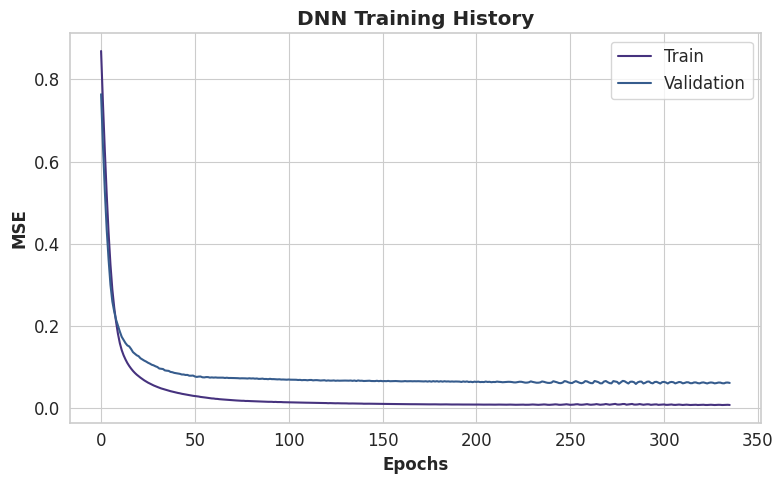

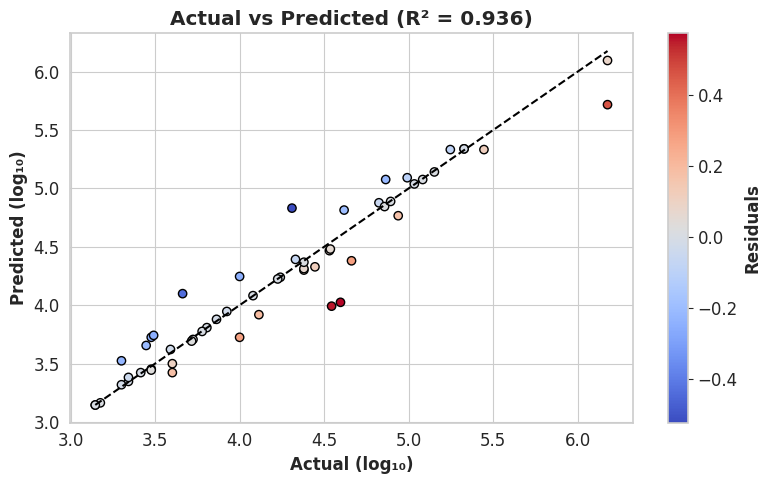

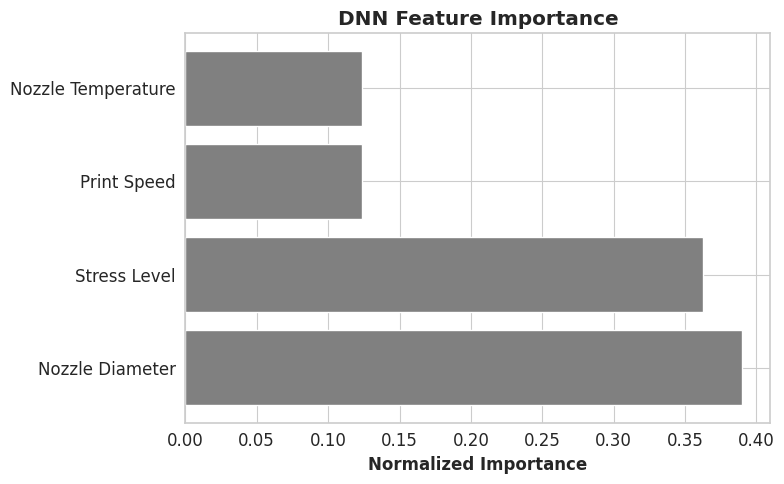


Training Classical ML Models...
• Random Forest
• Gradient Boosting
• SVR (RBF)

MODEL COMPARISON (LOG10 SPACE)
------------------------------------------------------------
                         R²      RMSE       MAE
DNN                0.935743  0.189637  0.116859
Random Forest      0.923563  0.206831  0.133155
Gradient Boosting  0.902640  0.233428  0.181750
SVR (RBF)          0.862795  0.277107  0.174158


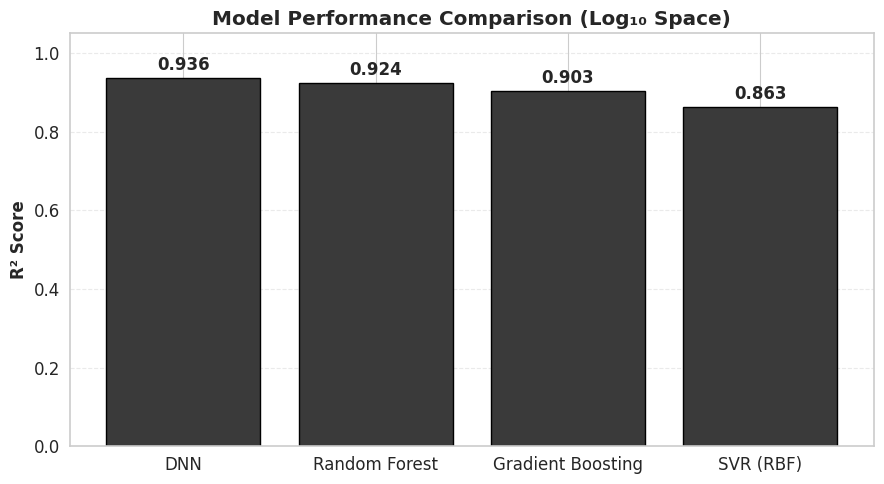

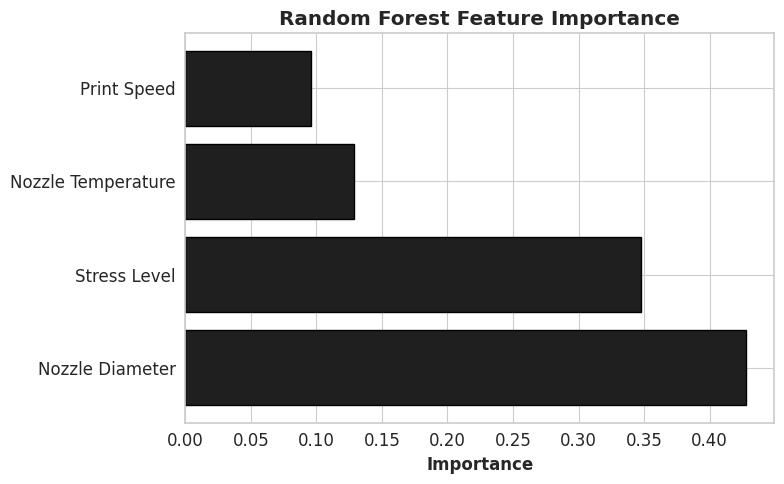

FINAL SUMMARY:
Best Model (R²): DNN

Saved Figures:
• training_history.png
• actual_vs_predicted.png
• feature_importance.png
• model_comparison_r2.png
• rf_feature_importance.png


In [ ]:


import tensorflow as tf
import numpy as np
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    mean_absolute_percentage_error, explained_variance_score,
    median_absolute_error, max_error
)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from scipy import stats
import warnings
warnings.filterwarnings("ignore")



def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.keras.utils.set_random_seed(seed)
    tf.config.experimental.enable_op_determinism()

set_seeds(42)




df = pd.read_csv("combined_bootstrap_fatigue.csv")

X = df[['Nozzle Diameter', 'Print Speed',
        'Nozzle Temperature', 'Stress Level']].values

y = np.log10(df['Fatigue Lifetime'].values)

feature_names = ['Nozzle Diameter', 'Print Speed',
                 'Nozzle Temperature', 'Stress Level']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)



scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()



def create_deterministic_dnn():
    return tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(4,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

dnn_model = create_deterministic_dnn()
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mse',
    metrics=['mae']
)

print("\nTraining Deterministic DNN...")
history = dnn_model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=500,
    batch_size=32,
    shuffle=False,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=50,
            restore_best_weights=True
        )
    ]
)



y_pred_log_scaled = dnn_model.predict(X_test_scaled, verbose=0).flatten()
y_pred_log = scaler_y.inverse_transform(
    y_pred_log_scaled.reshape(-1, 1)
).flatten()

residuals_log = y_test - y_pred_log

metrics_log = {
    'R² Score': r2_score(y_test, y_pred_log),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_log)),
    'MAE': mean_absolute_error(y_test, y_pred_log),
    'MAPE (%)': mean_absolute_percentage_error(y_test, y_pred_log) * 100
}

print("\nDNN PERFORMANCE (LOG10 SPACE)")
print("-" * 50)
for k, v in metrics_log.items():
    print(f"{k:20}: {v:.6f}")



perm = permutation_importance(
    dnn_model,
    X_test_scaled,
    y_test_scaled,
    n_repeats=50,
    random_state=42,
    scoring='r2',
    n_jobs=-1
)

raw_importance = np.maximum(perm.importances_mean, 0)
importance = raw_importance / raw_importance.sum()

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values("Importance", ascending=False)



sns.set_style("whitegrid")

# Training history
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("DNN Training History")
plt.legend()
plt.tight_layout()
plt.savefig("training_history.png", dpi=300)
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_log, c=residuals_log, cmap='coolwarm', edgecolor='k')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual (log₁₀)")
plt.ylabel("Predicted (log₁₀)")
plt.title(f"Actual vs Predicted (R² = {metrics_log['R² Score']:.3f})")
plt.colorbar(label="Residuals")
plt.tight_layout()
plt.savefig("actual_vs_predicted.png", dpi=300)
plt.show()

# Feature importance
plt.figure(figsize=(8,5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='gray')
plt.xlabel("Normalized Importance")
plt.title("DNN Feature Importance")
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=300)
plt.show()



models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300, random_state=42, n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42
    ),
    "SVR (RBF)": SVR(C=10, epsilon=0.01)
}

results = {}

print("\nTraining Classical ML Models...")
for name, model in models.items():
    print(f"• {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "R²": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

results["DNN"] = {
    "R²": metrics_log['R² Score'],
    "RMSE": metrics_log['RMSE'],
    "MAE": metrics_log['MAE']
}

comparison_df = pd.DataFrame(results).T.sort_values("R²", ascending=False)

print("\nMODEL COMPARISON (LOG10 SPACE)")
print("-" * 60)
print(comparison_df)


plt.figure(figsize=(9,5))
bars = plt.bar(
    comparison_df.index,
    comparison_df["R²"],
    color='#3A3A3A',
    edgecolor='black'
)

plt.ylabel("R² Score")
plt.title("Model Performance Comparison (Log₁₀ Space)")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.4)

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 0.02,
             f"{h:.3f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig("model_comparison_r2.png", dpi=300)
plt.show()


rf = models["Random Forest"]

rf_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(8,5))
plt.barh(rf_imp["Feature"], rf_imp["Importance"],
         color='#1F1F1F', edgecolor='black')
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.savefig("rf_feature_importance.png", dpi=300)
plt.show()




print("FINAL SUMMARY:")

print(f"Best Model (R²): {comparison_df.index[0]}")
print("\nSaved Figures:")
print("• training_history.png")
print("• actual_vs_predicted.png")
print("• feature_importance.png")
print("• model_comparison_r2.png")
print("• rf_feature_importance.png")




###without log10

COMPLETE DETERMINISTIC DNN + ML BENCHMARKS

Training Deterministic DNN...
Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.9895 - mae: 0.8323 - val_loss: 0.7639 - val_mae: 0.7186
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.8370 - mae: 0.7536 - val_loss: 0.6391 - val_mae: 0.6496
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.7036 - mae: 0.6774 - val_loss: 0.5281 - val_mae: 0.5828
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5786 - mae: 0.6040 - val_loss: 0.4346 - val_mae: 0.5186
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4659 - mae: 0.5333 - val_loss: 0.3617 - val_mae: 0.4630
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3719 - mae: 0.4707 - val_loss: 0.3003 - val_mae: 0.4088
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2987 - mae: 0.4194 - val_loss: 0.2598 - val_mae: 0.3746
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2467 - mae: 0.3823 - val_loss: 0.2352 - val_mae: 0.352

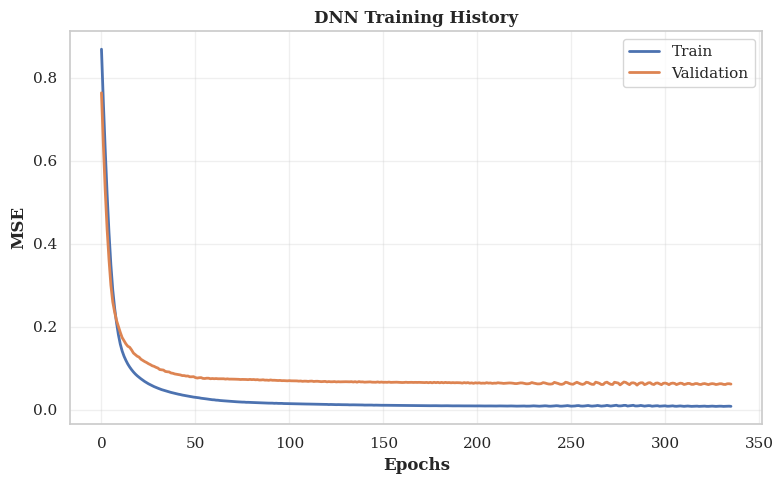

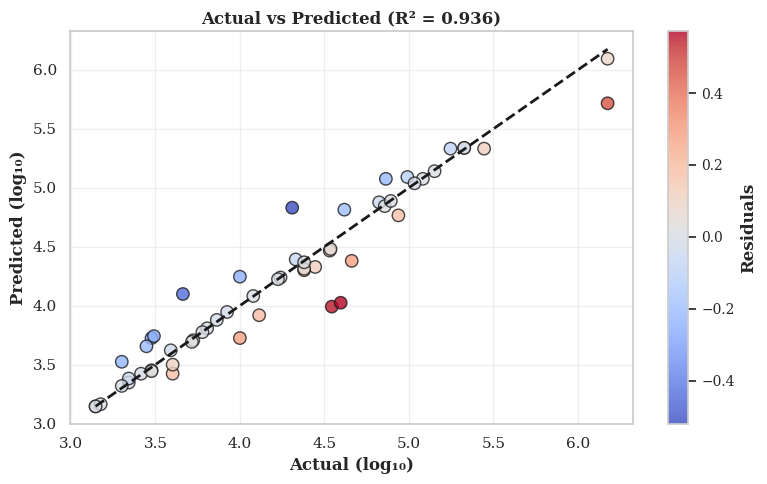

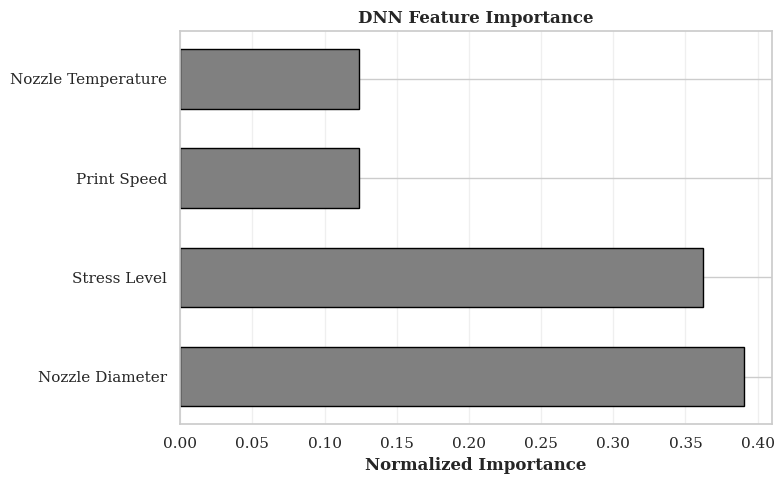


Training Classical ML Models...
• Random Forest
• Gradient Boosting
• SVR (RBF)

MODEL COMPARISON (LOG10 SPACE)
------------------------------------------------------------
                         R²      RMSE       MAE
DNN                0.935743  0.189637  0.116859
Random Forest      0.923563  0.206831  0.133155
Gradient Boosting  0.902640  0.233428  0.181750
SVR (RBF)          0.862795  0.277107  0.174158


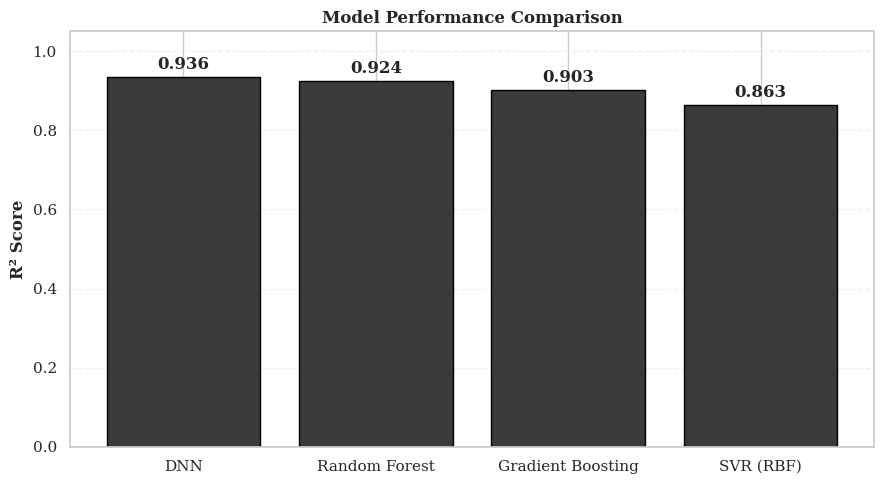

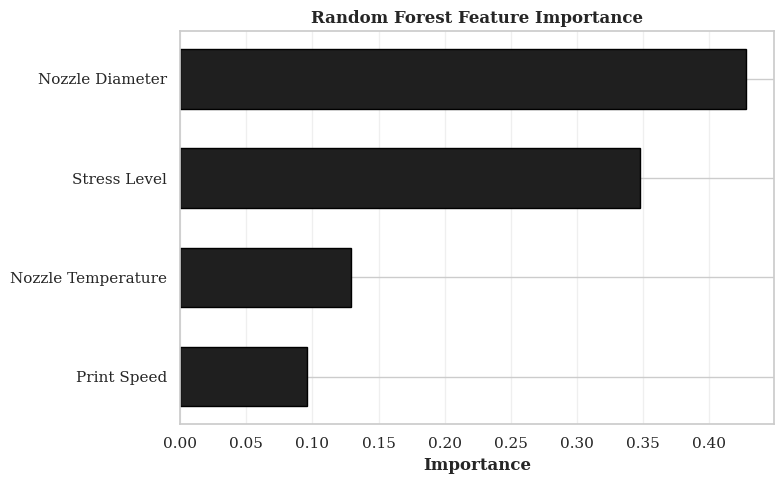

In [ ]:
import tensorflow as tf
import numpy as np
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    mean_absolute_percentage_error
)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Times New Roman', 'Liberation Serif']
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

sns.set_theme(style="whitegrid", font='serif')
sns.set_context("notebook", font_scale=1.0, rc={"font.family": "serif"})



def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.keras.utils.set_random_seed(seed)
    tf.config.experimental.enable_op_determinism()

set_seeds(42)

print("=" * 70)
print("COMPLETE DETERMINISTIC DNN + ML BENCHMARKS")
print("=" * 70)



df = pd.read_csv("combined_bootstrap_fatigue.csv")

X = df[['Nozzle Diameter', 'Print Speed',
        'Nozzle Temperature', 'Stress Level']].values

y = np.log10(df['Fatigue Lifetime'].values)

feature_names = ['Nozzle Diameter', 'Print Speed',
                 'Nozzle Temperature', 'Stress Level']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)


scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()


def create_deterministic_dnn():
    return tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(4,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

dnn_model = create_deterministic_dnn()
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mse',
    metrics=['mae']
)

print("\nTraining Deterministic DNN...")
history = dnn_model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=500,
    batch_size=32,
    shuffle=False,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=50,
            restore_best_weights=True
        )
    ]
)



y_pred_log_scaled = dnn_model.predict(X_test_scaled, verbose=0).flatten()
y_pred_log = scaler_y.inverse_transform(
    y_pred_log_scaled.reshape(-1, 1)
).flatten()

residuals_log = y_test - y_pred_log

metrics_log = {
    'R² Score': r2_score(y_test, y_pred_log),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_log)),
    'MAE': mean_absolute_error(y_test, y_pred_log),
    'MAPE (%)': mean_absolute_percentage_error(y_test, y_pred_log) * 100
}

print("\nDNN PERFORMANCE (LOG10 SPACE)")
print("-" * 50)
for k, v in metrics_log.items():
    print(f"{k:20}: {v:.6f}")


perm = permutation_importance(
    dnn_model,
    X_test_scaled,
    y_test_scaled,
    n_repeats=50,
    random_state=42,
    scoring='r2',
    n_jobs=-1
)

raw_importance = np.maximum(perm.importances_mean, 0)
importance = raw_importance / raw_importance.sum()

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values("Importance", ascending=False)



# Training history
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation', linewidth=2)
plt.xlabel("Epochs", fontname='serif')
plt.ylabel("MSE", fontname='serif')
plt.title("DNN Training History", fontname='serif', fontweight='bold')
plt.legend(prop={'family': 'serif'})
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("training_history.png", dpi=300, bbox_inches='tight')
plt.show()

# Actual vs Predicted
plt.figure(figsize=(8,5))
scatter = plt.scatter(y_test, y_pred_log, c=residuals_log,
                     cmap='coolwarm', edgecolor='k', s=80, alpha=0.8)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'k--', linewidth=2)
plt.xlabel("Actual (log₁₀)", fontname='serif')
plt.ylabel("Predicted (log₁₀)", fontname='serif')
plt.title(f"Actual vs Predicted (R² = {metrics_log['R² Score']:.3f})",
          fontname='serif', fontweight='bold')
cbar = plt.colorbar(scatter)
cbar.set_label('Residuals', fontname='serif')
cbar.ax.tick_params(labelsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("actual_vs_predicted.png", dpi=300, bbox_inches='tight')
plt.show()

# Feature importance
plt.figure(figsize=(8,5))
bars = plt.barh(importance_df["Feature"], importance_df["Importance"],
                color='gray', edgecolor='black', height=0.6)
plt.xlabel("Normalized Importance", fontname='serif')
plt.title("DNN Feature Importance", fontname='serif', fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()



models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300, random_state=42, n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42
    ),
    "SVR (RBF)": SVR(C=10, epsilon=0.01)
}

results = {}

print("\nTraining Classical ML Models...")
for name, model in models.items():
    print(f"• {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "R²": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

results["DNN"] = {
    "R²": metrics_log['R² Score'],
    "RMSE": metrics_log['RMSE'],
    "MAE": metrics_log['MAE']
}

comparison_df = pd.DataFrame(results).T.sort_values("R²", ascending=False)

print("\nMODEL COMPARISON (LOG10 SPACE)")
print("-" * 60)
print(comparison_df)



plt.figure(figsize=(9,5))
bars = plt.bar(
    comparison_df.index,
    comparison_df["R²"],
    color='#3A3A3A',
    edgecolor='black'
)

plt.ylabel("R² Score", fontname='serif')
plt.title("Model Performance Comparison",
          fontname='serif', fontweight='bold')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.3)


for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 0.02,
             f"{h:.3f}", ha='center', fontweight='bold', fontname='serif')


plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.tight_layout()
plt.savefig("model_comparison_r2.png", dpi=300, bbox_inches='tight')
plt.show()


rf = models["Random Forest"]

rf_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=True)

plt.figure(figsize=(8,5))
bars = plt.barh(rf_imp["Feature"], rf_imp["Importance"],
         color='#1F1F1F', edgecolor='black', height=0.6)
plt.xlabel("Importance", fontname='serif')
plt.title("Random Forest Feature Importance", fontname='serif', fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.xticks(fontname='serif')
plt.yticks(fontname='serif')
plt.tight_layout()
plt.savefig("rf_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()






In [ ]:
import datetime

extracted = {}

extracted['model'] = {
    'optimizer': dnn_model.optimizer.__class__.__name__,
    'learning_rate': float(dnn_model.optimizer.learning_rate.numpy()),
    'loss': dnn_model.loss,
}

try:
    if hasattr(dnn_model, '_compile_metrics'):
        metrics_list = []
        if isinstance(dnn_model._compile_metrics, (list, tuple)):
            for m in dnn_model._compile_metrics:
                if hasattr(m, 'name'):
                    metrics_list.append(m.name)
        else:
            if hasattr(dnn_model._compile_metrics, 'name'):
                metrics_list.append(dnn_model._compile_metrics.name)
        extracted['model']['metrics'] = metrics_list
    else:
        extracted['model']['metrics'] = []
except Exception as e:
    print(f"  Note: Could not extract metrics: {e}")
    extracted['model']['metrics'] = ['mae']

extracted['training'] = {
    'epochs_run': len(history.history['loss']),
    'best_epoch': np.argmin(history.history['val_loss']) + 1,
    'best_val_loss': np.min(history.history['val_loss']),
    'final_val_loss': history.history['val_loss'][-1],
    'final_train_loss': history.history['loss'][-1]
}

if 'mae' in history.history:
    extracted['training']['final_train_mae'] = history.history['mae'][-1]
if 'val_mae' in history.history:
    extracted['training']['final_val_mae'] = history.history['val_mae'][-1]

extracted['callbacks'] = {}
if hasattr(dnn_model, 'callbacks') and dnn_model.callbacks:
    for callback in dnn_model.callbacks:
        cb_name = callback.__class__.__name__
        if cb_name == 'EarlyStopping':
            extracted['callbacks']['EarlyStopping'] = {
                'monitor': callback.monitor,
                'patience': callback.patience,
                'restore_best_weights': callback.restore_best_weights
            }

extracted['data'] = {
    'total_samples': len(X),
    'train_samples': len(X_train),
    'test_samples': len(X_test),
    'features': X.shape[1],
    'feature_names': list(feature_names) if hasattr(feature_names, '__iter__') else str(feature_names)
}

extracted['scalers'] = {
    'X': scaler_X.__class__.__name__,
    'y': scaler_y.__class__.__name__
}



extracted['performance'] = {
    'r2_score': metrics_log['R² Score'],
    'rmse': metrics_log['RMSE'],
    'mae': metrics_log['MAE'],
    'best_model': comparison_df.index[0]
}




timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
txt_filename = f"dnn_params_{timestamp}.txt"

with open(txt_filename, 'w') as f:
    f.write("DNN TRAINING PARAMETERS EXTRACTED FROM ACTUAL RUN\n")


    f.write("MODEL CONFIGURATION:\n")

    f.write(f"Optimizer: {extracted['model']['optimizer']}\n")
    f.write(f"Learning Rate: {extracted['model']['learning_rate']}\n")
    f.write(f"Loss Function: {extracted['model']['loss']}\n")
    f.write(f"Metrics: {', '.join(extracted['model']['metrics'])}\n\n")

    f.write("TRAINING RESULTS:\n")

    f.write(f"Epochs Run: {extracted['training']['epochs_run']}\n")
    f.write(f"Best Epoch: {extracted['training']['best_epoch']}\n")
    f.write(f"Best Validation Loss: {extracted['training']['best_val_loss']:.6f}\n")
    f.write(f"Final Validation Loss: {extracted['training']['final_val_loss']:.6f}\n")
    f.write(f"Final Training Loss: {extracted['training']['final_train_loss']:.6f}\n")

    if 'final_val_mae' in extracted['training']:
        f.write(f"Final Validation MAE: {extracted['training']['final_val_mae']:.6f}\n")

    f.write("\n")

    if extracted['callbacks']:
        f.write("CALLBACKS:\n")

        for cb_name, cb_params in extracted['callbacks'].items():
            f.write(f"{cb_name}:\n")
            for k, v in cb_params.items():
                f.write(f"  {k}: {v}\n")
        f.write("\n")

    f.write("DATA INFORMATION:\n")

    f.write(f"Total Samples: {extracted['data']['total_samples']}\n")
    f.write(f"Training Samples: {extracted['data']['train_samples']}\n")
    f.write(f"Test Samples: {extracted['data']['test_samples']}\n")
    f.write(f"Number of Features: {extracted['data']['features']}\n")
    f.write(f"Feature Names: {extracted['data']['feature_names']}\n\n")

    f.write("SCALERS:\n")

    f.write(f"Features Scaler: {extracted['scalers']['X']}\n")
    f.write(f"Target Scaler: {extracted['scalers']['y']}\n\n")

    f.write("PERFORMANCE METRICS:\n")

    f.write(f"R² Score: {extracted['performance']['r2_score']:.6f}\n")
    f.write(f"RMSE: {extracted['performance']['rmse']:.6f}\n")
    f.write(f"MAE: {extracted['performance']['mae']:.6f}\n")
    f.write(f"Best Model: {extracted['performance']['best_model']}\n\n")


    f.write("EXTRACTION NOTES:\n")

    f.write("These parameters were directly extracted from variables in memory.\n")
    f.write("The following are NOT stored in objects and need manual recording:\n")
    f.write("1. Batch size (from fit() method call)\n")
    f.write("2. Max epochs configured (from fit() method call)\n")
    f.write("3. Random seed value (from set_seeds() call)\n")
    f.write("4. Model architecture (layer sizes and activations)\n")


print(f"Text file created: {txt_filename}")

try:
    from docx import Document
    from docx.shared import Pt, Inches
    from docx.enum.text import WD_ALIGN_PARAGRAPH

    doc = Document()

    # Title
    title = doc.add_heading('DNN Training Parameters', 0)
    title.alignment = WD_ALIGN_PARAGRAPH.CENTER

    # Subtitle
    subtitle = doc.add_paragraph('Extracted from Actual Execution')
    subtitle.alignment = WD_ALIGN_PARAGRAPH.CENTER
    subtitle.runs[0].italic = True

    time_para = doc.add_paragraph()
    time_para.alignment = WD_ALIGN_PARAGRAPH.CENTER
    time_para.add_run(f'Generated: {datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}')

    doc.add_paragraph()

    doc.add_heading('1. Model Configuration', level=1)

    model_config = [
        ("Optimizer", extracted['model']['optimizer']),
        ("Learning Rate", f"{extracted['model']['learning_rate']:.6f}"),
        ("Loss Function", extracted['model']['loss']),
        ("Metrics", ", ".join(extracted['model']['metrics']) if extracted['model']['metrics'] else "None")
    ]

    table = doc.add_table(rows=len(model_config), cols=2)
    table.style = 'Light Grid'

    for i, (key, value) in enumerate(model_config):
        table.cell(i, 0).text = key
        table.cell(i, 1).text = str(value)

    doc.add_paragraph()

    doc.add_heading('2. Training Results', level=1)

    train_data = [
        ("Total Epochs Run", extracted['training']['epochs_run']),
        ("Best Epoch", extracted['training']['best_epoch']),
        ("Best Validation Loss", f"{extracted['training']['best_val_loss']:.6f}"),
        ("Final Validation Loss", f"{extracted['training']['final_val_loss']:.6f}"),
        ("Final Training Loss", f"{extracted['training']['final_train_loss']:.6f}")
    ]

    if 'final_val_mae' in extracted['training']:
        train_data.append(("Final Validation MAE", f"{extracted['training']['final_val_mae']:.6f}"))

    train_table = doc.add_table(rows=len(train_data), cols=2)
    train_table.style = 'Light Grid'

    for i, (key, value) in enumerate(train_data):
        train_table.cell(i, 0).text = key
        train_table.cell(i, 1).text = str(value)

    doc.add_paragraph()

    if extracted['callbacks']:
        doc.add_heading('3. Callbacks', level=1)

        for cb_name, cb_params in extracted['callbacks'].items():
            doc.add_paragraph(f"{cb_name}:", style='Heading 3')

            cb_table = doc.add_table(rows=len(cb_params), cols=2)
            cb_table.style = 'Light Grid'

            for i, (key, value) in enumerate(cb_params.items()):
                cb_table.cell(i, 0).text = str(key)
                cb_table.cell(i, 1).text = str(value)

            doc.add_paragraph()

    doc.add_heading('4. Performance Metrics', level=1)

    perf_data = [
        ("R² Score", f"{extracted['performance']['r2_score']:.6f}"),
        ("RMSE", f"{extracted['performance']['rmse']:.6f}"),
        ("MAE", f"{extracted['performance']['mae']:.6f}"),
        ("Best Model", extracted['performance']['best_model'])
    ]

    perf_table = doc.add_table(rows=len(perf_data), cols=2)
    perf_table.style = 'Light Grid'

    for i, (key, value) in enumerate(perf_data):
        perf_table.cell(i, 0).text = key
        perf_table.cell(i, 1).text = str(value)

    doc.add_paragraph()

    doc.add_heading('5. Reproduction Notes', level=1)

    notes = doc.add_paragraph()
    notes.add_run("Important: ").bold = True
    notes.add_run("The following parameters are NOT stored in model objects and must be recorded separately:\n\n")

    bullet_points = [
        "Batch size (parameter in fit() method)",
        "Maximum epochs configured (parameter in fit() method)",
        "Random seed value (argument to set_seeds())",
        "Model architecture (layer sizes and activation functions)",
        "train_test_split parameters (test_size, random_state, shuffle)"
    ]

    for point in bullet_points:
        notes.add_run(f"• {point}\n")

    doc_filename = f"dnn_training_report_{timestamp}.docx"
    doc.save(doc_filename)

    print(f" Word document created: {doc_filename}")

except ImportError:

    import subprocess
    import sys

    subprocess.check_call([sys.executable, "-m", "pip", "install", "python-docx"])

    from docx import Document
    from docx.shared import Pt, Inches
    from docx.enum.text import WD_ALIGN_PARAGRAPH

    doc = Document()
    doc.add_heading('DNN Training Parameters', 0)
    doc.add_paragraph(f'Extracted: {datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}')

    doc.add_heading('Model', level=1)
    doc.add_paragraph(f'Optimizer: {extracted["model"]["optimizer"]}')
    doc.add_paragraph(f'Learning Rate: {extracted["model"]["learning_rate"]:.6f}')
    doc.add_paragraph(f'Loss: {extracted["model"]["loss"]}')

    doc.add_heading('Training', level=1)
    doc.add_paragraph(f'Epochs: {extracted["training"]["epochs_run"]}')
    doc.add_paragraph(f'Best Epoch: {extracted["training"]["best_epoch"]}')
    doc.add_paragraph(f'Best Loss: {extracted["training"]["best_val_loss"]:.6f}')

    doc.add_heading('Performance', level=1)
    doc.add_paragraph(f'R²: {extracted["performance"]["r2_score"]:.6f}')

    doc_filename = f"dnn_training_report_{timestamp}.docx"
    doc.save(doc_filename)

    print(f" Word document created: {doc_filename}")



Text file created: dnn_params_20260214_153945.txt
 Word document created: dnn_training_report_20260214_153945.docx


In [ ]:


print("FULL DATASET FEATURE IMPORTANCE:")

X_full_scaled = np.vstack([X_train_scaled, X_test_scaled])
y_full_scaled = np.hstack([y_train_scaled, y_test_scaled])

print(f"Full dataset size: {X_full_scaled.shape[0]} samples")

importance_full_df, perm_full_result = normalized_permutation_importance(
    dnn_model,
    X_full_scaled,
    y_full_scaled,
    feature_names,
    n_repeats=50,
    random_state=42
)

print("\n FEATURE IMPORTANCE (FULL DATASET):")

print(f"{'Feature':20} {'Importance':>10} {'Rank':>6}")

for _, row in importance_full_df.iterrows():
    print(f"{row['Feature']:20} {row['Importance']:10.3f} {row['Rank']:6.0f}")

print(f"{'TOTAL':20} {importance_full_df['Importance'].sum():10.3f}")


FULL DATASET FEATURE IMPORTANCE:
Full dataset size: 278 samples
Calculating permutation importance with 50 repetitions...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

 FEATURE IMPORTANCE (FULL DATASET):
Feature              Importance   Rank
Nozzle Diameter           0.418      1
Stress Level              0.322      2
Nozzle Temperature        0.145      3
Print Speed               0.115      4
TOTAL                     1.000
